In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from math import sqrt
import pandas as pd
import os

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\LUAD FIREHOSE LEGACY DATABASE')

In [3]:
# Importing the dataset
dt1 = pd.read_excel('FLUX.xlsx')
dt2 = pd.read_excel('GENES.xlsx')

In [4]:
dt1.head(2)

,HUG0_SYMBOL,3DSPHR,3HBCOAHLm,ABTArm,ABTD,ACACT1r,ACACT1rm,ACACT1x,ACOAD9m,ACOAO7p,...,1513TACRitr,1531TACRitr,DEOXFVSitx,FVSitx,TACRitr,13DMTitr,15DMTitr,31DMTitr,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,...,14.770344,14.770344,-431.370763,431.370763,26.309675,-6.000452,-6.000452,-6.000452,1,0.00
1,TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,...,34.017476,34.017476,-219.803538,219.803538,60.593629,-13.819600,-13.819600,-13.819600,1,50.03


In [5]:
dt2.head(2)

,Hugo_Symbol,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,...,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,...,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,1,0.00
1,TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,...,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,1,50.03


In [6]:
del dt1['Overall Survival (Months)']
del dt1['Patient\'s Vital Status']
del dt2['Hugo_Symbol']

In [7]:
dt = dt1.merge(dt2,left_index=True,right_index=True)

In [8]:
dt.head(2)

,HUG0_SYMBOL,3DSPHR,3HBCOAHLm,ABTArm,ABTD,ACACT1r,ACACT1rm,ACACT1x,ACOAD9m,ACOAO7p,...,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,...,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,1,0.00
1,TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,...,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,1,50.03


In [9]:
dc = "Overall Survival (Months)"; 
ec = "Patient\'s Vital Status"

dt_ = dt.drop('HUG0_SYMBOL', axis=1)

y = dt_.pop(dc).values
z1 = dt_.pop(ec).values
X = dt_

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z1_train, z1_test = train_test_split(X, y, z1, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, z1_train, z1_val = train_test_split(X_train, y_train, z1_train, test_size=0.2, random_state=0)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [12]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [13]:
explained_variance[:250]

array([0.06630907, 0.05272993, 0.04489655, 0.03971667, 0.03379048,
       0.02693764, 0.0229222 , 0.01997504, 0.01723999, 0.01436369,
       0.01282248, 0.01246524, 0.01143812, 0.01069049, 0.01021498,
       0.00920542, 0.00893699, 0.00849988, 0.00829283, 0.00796346,
       0.00774598, 0.00749262, 0.00737174, 0.00706576, 0.00688523,
       0.00665425, 0.00639886, 0.00616285, 0.00609213, 0.00600666,
       0.00574206, 0.00557145, 0.00541297, 0.00537506, 0.00533552,
       0.00522109, 0.0050386 , 0.00497752, 0.0049108 , 0.00484207,
       0.00473031, 0.00459776, 0.0045238 , 0.0044921 , 0.00437305,
       0.0043211 , 0.00429492, 0.0042183 , 0.00417047, 0.0040798 ,
       0.00404094, 0.00395488, 0.00389439, 0.00384738, 0.00379159,
       0.00370307, 0.00363417, 0.00357897, 0.00356815, 0.00344906,
       0.00343339, 0.00339239, 0.00333104, 0.00327233, 0.00322444,
       0.0031878 , 0.00315925, 0.0031398 , 0.0031013 , 0.00304362,
       0.00301528, 0.00300144, 0.00298118, 0.00295059, 0.00292

In [14]:
a = explained_variance[:250]> 0.01

In [15]:
a

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [16]:
# Applying Selecting Features
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [17]:
explained_variance

array([0.06630907, 0.05272993, 0.04489655, 0.03971667, 0.03379048,
       0.02693764, 0.0229222 , 0.01997504, 0.01723999, 0.01436369,
       0.01282248, 0.01246524, 0.01143812, 0.01069049, 0.01021498])

In [18]:
conc1 = np.vstack(X_train)
conc2 = np.vstack(X_test)
conc3 = np.vstack(X_val)

X_train = pd.DataFrame(conc1, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])
X_test = pd.DataFrame(conc2, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])
X_val = pd.DataFrame(conc3, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

conc4 = np.vstack(z1_train)
conc5 = np.vstack(z1_test)
conc6 = np.vstack(z1_val)

z1_train = pd.DataFrame(conc4, columns=['Patient\'s Vital Status'])
z1_test = pd.DataFrame(conc5, columns=['Patient\'s Vital Status'])
z1_val = pd.DataFrame(conc6, columns=['Patient\'s Vital Status'])

In [19]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA','ACONT','ACONTm','ADK1','ADK1m','ADK3','ADK3m','ADKd','AICART','AKGDm','AKR1C41','AKR1C42','ALAR','ALATA_L','ALCD1','ALDD21','ALOX52','AMACR2p','AMPDA','APAT2rm','ARTPLM3','ASNNm','ASPTA','ASPTAm','BAAT1x','BAAT2x','BAAT4x','BDHm','BTNDe','BUP2','C14STRr','C181CPT1','C181CPT2','C3STDH1Pr','C4STMO1r','CATm','CATp','CDIPTr','CHAT','CHATn','CK','CKc','CLS_hs','CSNAT2x','CSNATer','CSNATm','CSNATp','CSNATr','CYSGLTH','CYSTA','CYTK1','CYTK10','CYTK10n','CYTK11','CYTK11n','CYTK12','CYTK12n','CYTK13','CYTK13n','CYTK14','CYTK14n','CYTK1n','CYTK2','CYTK2n','CYTK3','CYTK3n','CYTK4','CYTK4n','CYTK5','CYTK5n','CYTK6','CYTK6n','CYTK7','CYTK7n','CYTK8','CYTK8n','CYTK9','CYTK9n','D3AIBTm','DAGK_hs','DCK1n','DCK2n','DCMPDA','DESAT18_4','DESAT18_5','DESAT18_6','DHCR241r','DHCR242r','DHCR243r','DHCR71r','DHCR72r','DHCRD1','DHFR','DHORTS','DHPM2','DMATT','DMATTx','DMNONCOACRNCPT1','DPMVDx','DRPA','DSAT','DURAD2','DURIPP','EBP1r','EBP2r','ECOAH12m','ENO','ETF','ETFQO','FA120ACPH','FA140ACPH','FA160ACPH','FA161ACPH','FACOAL161','FACOAL1812','FACOAL1813','FACOAL1821','FACOAL1831','FACOAL205','FACOAL226','FAOXC180x','FAOXC200180x','FAS100COA','FAS120COA','FAS140COA','FAS160COA','FAS80COA_L','FOLR2','FUM','FUMm','G3PD1','G6PDH1rer','G6PDH2rer','GACMTRc','GALT','GALU','GAPD','GCC2cm','GGNG','GGT6','GHMT2r','GLBRAN','GLDBRAN','GLGNS1','GLPASE1','GLPASE2','GLUDxm','GLUDym','GLUNm','GLYAMDTRc','GNMT','GRTT','GRTTx','GULNDer','H2CO3D','H2CO3Dm','HIBDm','HMGCOASi','HMGCOASim','HPYRRy','HSD11B1r','HSD11B2r','HSD17B42x','HSD17B4x','HSD3A1r','HSD3A2r','HSD3B7P','ICDHyrm','ILETA','ILETAm','IMPC','IPDDIx','ITCOAL1m','ITCOALm','LDH_D','LDH_L','LDH_Lm','LEUTA','LEUTAm','LNELDCCPT1','LNSTLSr','LPS2e','LSTO1r','LSTO2r','LTC4CP','LTD4DP','MCCCrm','MCD','MCOATA','MDH','MDHm','MECOALm','MECOAS1m','MEVK1x','MGCHrm','MMEm','MMMm','MMTSADm','MTHFC','MTHFCm','MTHFD','MTHFD2','MTHFD2m','MTHFDm','NDPK1','NDPK10','NDPK10n','NDPK1m','NDPK1n','NDPK2','NDPK2n','NDPK3','NDPK3n','NDPK4','NDPK4n','NDPK5','NDPK5n','NDPK6','NDPK7','NDPK7n','NDPK8','NDPK8m','NDPK8n','NDPK9','NDPK9n','OIVD2m','ORNTArm','P45027A12m','PCHOLP_hs','PCHOLPg_hs','PCHOLPr_hs','PEPCKm','PETOHMr_hs','PGDI','PGI','PGK','PGM','PGMT','PMEVKx','PPCDC','PPM','PRPNCOAHYDm','PSSA1_hs','PUNP1','PUNP2','PUNP3','PUNP4','PUNP5','PUNP6','PUNP7','PYK','PYNP2r','RDH1','RDH1a','RDH2','RDH2a','RDH3','RDH3a','RNDR1','RNDR4','RPE','RPI','SACCD4m','SARDHm','SBTD_D2','SBTR','SCP2x','SERPT','SMS','SQLEr','SQLSr','SUCD1m','SUCOAS1m','SUCOASm','TALA','TKT1','TKT2','TMDK1m','TMDPP','TPI','TYRTA','UGLT','UMPK','UMPK2','UMPK2n','UMPK3','UMPK3n','UMPK4','UMPK4n','UMPK5','UMPK5n','UMPK6','UMPK6n','UMPK7','UMPK7n','UMPKn','VACCCPT1','VACCCPT2','VALTA','VALTAm','XYLUR','r0010','r0021','r0027','r0051','r0055','r0074','r0081','r0086','r0129','r0130','r0139','r0149','r0153','r0157','r0160','r0163','r0165','r0170','r0173','r0178','r0181','r0193','r0224','r0226','r0242','r0245','r0249','r0267','r0268','r0280','r0295','r0317','r0321','r0330','r0331','r0345','r0365','r0380','r0384','r0390','r0392','r0394','r0407','r0408','r0409','r0410','r0413','r0423','r0425','r0426','r0431','r0438','r0444','r0445','r0446','r0463','r0464','r0472','r0474','r0475','r0483','r0494','r0497','r0510','r0511','r0512','r0514','r0525','r0531','r0549','r0552','r0553','r0556','r0560','r0570','r0571','r0575','r0578','r0579','r0580','r0587','r0595','r0596','r0610','r0611','r0614','r0615','r0616','r0617','r0618','r0620','r0627','r0629','r0630','r0637','r0641','r0643','r0648','r0649','r0669','r0678','r0679','r0680','r0681','r0682','r0683','r0688','r0691','r0692','r0693','r0694','r0695','r0696','r0697','r0698','r0707','r0712','r0737','r0747','r0750','r0752','r0753','r0754','r0755','r0756','r0757','r0760','r0761','r0762','r0763','r0764','r0765','r0766','r0767','r0768','r0769','r0770','r0772','r0773','r0774','r0779','r0781','r0783','r0784','r0792','r0795','r0797','r1109','r1135','r1146','r1156','r1380','r1384','r1391','r1392','r1411','r1418','r1472','r1474','r1477','r1481','r1487','r1488','RE0452M','RE0453C','RE0453M','RE0453N','RE0579C','RE0702E','RE0915E','RE0926E','RE0935E','RE0944E','RE0958E','RE1050E','RE1530C','RE1691M','RE1796R','RE1807C','RE1845C','BAAT5x','RE1860E','RE2069C','RE2273E','RE2513E','RE2514E','RE2625M','RE2626C','RE2626M','RE2637C','RE2638C','RE2649C','RE2799C','RE2888E','RE2954C','RE3076X','RE3245C','RE3248X','RE3250X','RE3273C','RE3301C','RE3346C','RE3346M','RE3347C','RE3556C','RE3565C','RE3566C','RE3567C','RE3568C','C80CPT1','FAOXC22C20x','FAOXC24C22x','FAOXC5C5OHm','FAOXC5OHc','OCD11COACPT1','OCD11CRNCPT2','OCTDECCPT1','OCTDECCPT2','DPMVDc','DTMPKm','FADH2ETC','HMGCOARc','IPDDI','MEVK1c','MTHFR3','PMEVKc','PTPATe','SFCYSc','10FTHFtm','2HBt2','2HCO3_NAt','3MOBt2im','3MOPt2im','4ABUTtm','4MOPt2im','5MTHFt2','ABTti','ABUTt2r','ABUTt4_2_r','ACACt2','ACACt2m','ACALDt','ACCOAtn','ACCOAtr','ACHtn','ACRNtm','ACt2m','ACt2r','ADEt','ADNt','ADNt4','ADPtx','ADRNt','AHCYStr','AKGMALtm','AKGt4_3','ALACYSNaEx','ALADGLNexR','ALADGLYexR','ALAGLNexR','ALAGLYexR','ALAt2r','ALAt4','ALAtN1','AMETr','AMPtp','ARACHDt2','ARACHDtr','ARGt4','ARGtiDF','ARGtm','ARTFR12','ASCBt','ASNALANaEx','ASNCYSNaEx','ASNt4','ASNtm','ASNtN1','ATP2ter','ATPS4m','ATPtm','ATPtx','BALAtmr','BHBt','BHBtm','BILDGLCURt','BILGLCURt','BILIRUBt2','BILIRUBtr','BTNt2','BTNt4i','BUTt2r','C226COAtx','CAt7r','CGLYt3_2_','CHOLATEt','CHOLt4','CHOLtg','CHOLtn','CHOLtr','CHOLtu','CHSTEROLt2','CHSTEROLt3','CITRtm','CITt4_2','CITtam','CITtbm','CO2t','CO2ter','CO2tm','CO2tp','COAtm','COAtn','COAtp','COAtr','CREATt4_2_r','CREATtmdiffir','CRNCARtp','CRNt','CRNtim','CRNtuNa','CRNtx','CRVNCtr','CYANt','CYANtm','CYOR_u10m','CYSGLUexR','CYSGLYexR','CYStec','CYTDt','DADNt4','DAGt','DALAt2r','DATPtn','DCTPtn','DGCHOLte','DGCHOLtx','DGSNt','DGTPtn','DHEASt','DHFtm','DHORD9','DIDPtn','DINt','DITPtn','D_LACt2','DMNONCRNt','DNDPt9m','DOPAt4_2_r','DOPAtu','DTDPtn','DTTPtn','DURIt','ELAIDCRNt','ELAIDt','ESTRONESt','FADH2tru','FADtru','FATP1t','FATP2t','FATP5t','FATP6t','FATP7t','FATP8t','FATP9t','FOLt2','FORtr','FRDPtc','FRDPtr','FRUt1r','FRUt4','FUMSO3tm','FUMSO4tm','FUMtm','FUMTSULtm','GALt1r','GALt2_2','GALt4','GCHOLAt','GCHOLAte','GCHOLAtx','GGLUCT','GLCMter','GLCt2_2','GLCt4','GLCter','GLNALANaEx','GLNASNNaEx','GLNCYSNaEx','GLNSERNaEx','GLNt4','GLNTHRNaEx','GLNtm','GLNtN1','GLUt2m','GLUt6','GLYBt4_2_r','GLYt2r','GLYt4','GLYt7_211_r','GLYtm','GLYtp','GSNt','GUAt','H2O2t','H2O2tp','H2Ot','H2Oter','H2Otg','H2Otm','H2Otp','HCO3_CLt','HDCAter','HDCEAtr','HDD2COAtx','HISt4','HISTAtu','HIStiDF','HIStN1','HMGCOAtm','HMGCOAtx','HOMt4','Htg','Htr','Htx','HYXNt','IDPtn','ILEt5m','ILEtec','INSt','INSTt2r','INSTt4','IPDPtx','It','ITPtn','KCC2t','KCCt','LEUKTRA4t','LEUKTRB4t','LEUKTRC4t','LEUKTRD4t','LEUKTRE4t','LEUKTRF4t','LEUt5m','LEUtec','LGNCCOAtx','L_LACt2r','L_LACt4r','L_LACtm','LNLCt','LNLNCGt','LYSt4','LYStiDF','LYStm','MALSO3tm','MALSO4tm','MALtm','MALTSULtm','MANt1r','MANt4','MEOHt2','METtec','MTHGXLt','NADHtru','NADPHtru','NADPtru','NADtru','NAHCO3_HCLt','NAIt','NAt','NAt3_1','NAt5','NAtx','NCKt','NCNt','NH4t3r','NKCC2t','NKCCt','NRPPHRt4_2_r','NRPPHRtu','NRVNCt','O2t','O2ter','O2tm','O2tp','OCCOAtx','OCDCEAtr','ORNt3m','ORNt4m','ORNtiDF','OXAHCOtex','PA_HSter','PA_HStg','PCHOL_HSter','PCHOL_HStg','PCREATtmdiffir','PE_HSter','PEt','PGLYCt','PHEt4','PHEtec','PIt2m','PIt7','PIter','PItx','PPAt','PPItr','PPItx','PRISTANALtx','PRISTtx','PRODt2r','PROSTGD2t','PROSTGE1t','PROSTGE2t','PROSTGE2t2','PROSTGF2t','PROSTGH2t','PROSTGI2t','PROt2r','PROtm','PSt3','PYRt2m','PYRt2p','PYRt2r','RETNt','SARCStm','SCP22x','SERCYSNaEx','SERDGLNexR','SERDGLYexR','SERGLNexR','SERGLYexR','SERt4','SERtN1','SO4CLtex2','SO4HCOtex','SO4OXAtex2','SO4t4_2','SRTNt6_2_r','SRTNtu','SUCCt2m','SUCCt4_2','TAURt4_2_r','TAURtcx','TCHOLAt','TCHOLAte','TCHOLAtx','TCYNTt','TCYNTtm','TDCHOLAte','TDCHOLAtx','THD1m','THFt2','THFtm','THMDt4','THRCYSNaEx','THRGLNexR','THRGLYexR','THRt4','THYMDt1','THYMDtm','THYMt','THYOXt','THYOXt2','TMNDNCt','TRIODTHYt','TRIODTHYt2','TRPt','TRPt4','TSULt4_3','TTDCAtr','TYRt','TYRt4','URAt','UREAt','UREAt5','URIt','VACCt','VALt5m','VALtec','XYLTt','r0002','r0801','r0809','r0812','r0817','r0819','r0821','r0822','r0829','r0830','r0834','r0835','r0836','r0838','r0839','r0840','r0841','r0860','r0879','r0885','r0892','r0899','r0911','r0913','r0915','r0917','r0921','r0934','r0940','r0941','r0942','r0946','r0947','r0954','r0960','r0962','r0963','r0973','r0975','r0990','r0992','r0995','r0997','r1000','r1001','r1002','r1010','r1019','r1027','r1043','r1045','r1051','r1052','r1088','r1116','r1143','r1144','r1147','r1155','r1291','r1318','r1400','r1421','r1423','r1454','r1455','r1456','r1464','r1493','r1499','r1500','r1544','r1546','r1547','r1548','r1549','r1551','r1552','r1553','r1554','r1556','r1557','r1559','r1560','r1561','r1562','r1563','r1564','r1565','r1566','r1567','r1568','r1569','r1570','r1571','r1573','r1574','r1575','r1576','r1578','r1579','r1580','r1581','r1583','r1584','r1585','r1586','r1587','r1588','r1589','r1590','r1591','r1592','r1593','r1594','r1595','r1596','r1597','r1598','r1599','r1600','r1602','r1603','r1604','r1605','r1606','r1607','r1608','r1609','r1610','r1611','r1612','r1613','r1614','r1615','r1616','r1617','r1621','r1625','r1627','r1628','r1629','r1630','r1631','r1632','r1633','r1634','r1635','r1636','r1637','r1638','r1639','r1640','r1641','r1642','r1643','r1645','r1646','r1648','r1649','r1650','r1651','r1652','r1653','r1654','r1655','r1656','r1657','r1658','r1659','r1660','r1661','r1662','r1664','r1665','r1666','r1667','r1668','r1669','r1670','r1671','r1687','r1702','r1705','r1706','r1707','r1708','r1710','r1713','r1715','r1716','r1717','r1732','r1739','r1747','r1762','r1769','r1776','r1777','r1784','r1807','r1822','r1823','r1825','r1826','r1827','r1828','r1829','r1830','r1831','r1832','r1833','r1834','r1835','r1836','r1837','r1842','r1844','r1846','r1850','r1851','r1852','r1860','r1866','r1867',
                         'r1881','r1882','r1890','r1919','r1920','r1923','r1924','r1925','r1926','r1929','r1930','r1934','r1935','r1944','r1945','r1946','r1949','r1950','r1963','r1964','r1965','r1966','r1969','r1970','r1971','r1974','r1975','r1976','r1979','r1980','r1981','r1984','r1985','r1992','r1993','r1995','r1996','r1997','r1998','r1999','r2000','r2001','r2003','r2004','r2005','r2006','r2007','r2008','r2009','r2011','r2012','r2013','r2015','r2016','r2017','r2020','r2022','r2023','r2024','r2040','r2048','r2056','r2064','r2079','r2080','r2081','r2082','r2083','r2084','r2085','r2086','r2087','r2088','r2089','r2090','r2091','r2092','r2093','r2094','r2095','r2096','r2097','r2098','r2099','r2100','r2101','r2102','r2103','r2104','r2105','r2106','r2107','r2108','r2109','r2110','r2111','r2112','r2113','r2114','r2115','r2116','r2117','r2118','r2119','r2120','r2121','r2122','r2123','r2124','r2125','r2126','r2127','r2128','r2129','r2130','r2131','r2132','r2133','r2139','r2140','r2141','r2142','r2143','r2144','r2145','r2146','r2147','r2148','r2149','r2150','r2151','r2152','r2153','r2154','r2155','r2156','r2160','r2161','r2162','r2163','r2164','r2165','r2166','r2167','r2168','r2169','r2170','r2171','r2172','r2173','r2174','r2175','r2176','r2177','r2178','r2179','r2180','r2181','r2182','r2183','r2184','r2185','r2186','r2187','r2188','r2189','r2193','r2194','r2195','r2196','r2197','r2198','r2199','r2200','r2201','r2202','r2203','r2204','r2205','r2206','r2207','r2208','r2209','r2210','r2211','r2212','r2213','r2214','r2215','r2216','r2217','r2218','r2219','r2220','r2221','r2222','r2223','r2224','r2225','r2226','r2227','r2228','r2229','r2230','r2231','r2232','r2233','r2234','r2235','r2236','r2237','r2238','r2239','r2240','r2241','r2242','r2243','r2244','r2245','r2246','r2247','r2248','r2249','r2250','r2251','r2252','r2253','r2254','r2255','r2256','r2257','r2258','r2259','r2260','r2261','r2262','r2263','r2264','r2265','r2266','r2267','r2268','r2269','r2270','r2271','r2272','r2273','r2274','r2275','r2276','r2277','r2278','r2279','r2280','r2281','r2282','r2283','r2284','r2285','r2286','r2287','r2288','r2289','r2290','r2291','r2292','r2293','r2294','r2295','r2296','r2297','r2298','r2299','r2300','r2301','r2302','r2303','r2304','r2305','r2306','r2307','r2308','r2309','r2310','r2311','r2312','r2313','r2314','r2315','r2316','r2317','r2318','r2319','r2320','r2321','r2322','r2323','r2324','r2325','r2326','r2327','r2328','r2329','r2330','r2331','r2332','r2333','r2334','r2335','r2338','r2341','r2342','r2343','r2344','r2346','r2347','r2352','r2353','r2354','r2355','r2356','r2357','r2358','r2359','r2360','r2361','r2362','r2363','r2364','r2365','r2366','r2367','r2368','r2369','r2371','r2372','r2373','r2374','r2375','r2376','r2377','r2378','r2379','r2380','r2382','r2386','r2395','r2396','r2397','r2398','r2399','r2400','r2401','r2402','r2403','r2404','r2405','r2406','r2407','r2408','r2409','r2410','r2411','r2413','r2416','r2420','r2433','r2436','r2438','r2444','r2449','r2482','r2483','r2484','r2485','r2486','r2487','r2488','r2489','r2490','r2491','r2492','r2493','r2494','r2495','r2496','r2506','r2507','r2508','r2509','r2514','r2516','r2520','r2521','r2525','r2526','r2532','r2534','r2535','CITt4_4','GLYt7_311_r','HCO3_NAt','INSTt4_2','PIt8','PIt9','PROt4_2_r','CYOOm3','C2tcx','C4tmc','C9BRxtc','HIVCACBP','HIVCRNe','OCD11CRNCACT','OCTDECCACT','4OHPROIMINOtc','ALAATB0tc','ARGATB0tc','ASNATB0tc','CYSATB0tc','CYSSNAT5tc','FOLTle','GLNATB0tc','GLYSNAT5tc','ILEATB0tc','LEUATB0tc','LEUPHELAT2tc','LYSATB0tc','METATB0tc','OCDEAFABP1tc','PHEATB0tc','PROIMINOtc','SERATB0tc','THRATB0tc','THRPHELAT2tc','TRPATB0tc','TYRATB0tc','VALATB0tc','VALLAT1tc','3AIB_Dtm','3HCO3_NAt','4ABUTtcn','4HPROLTASCT1','5MTHFt2le','ADNt5le','CHSTEROLtrc','CRNrtx','Coqe','DATPtm','FOLt2le','FRDPtcr','GLCGLUT2','GLUPROASCT1','GLYCTDle','GSNt5le','INSt5le','KHte','LACLt','PPItm','PRO_Dtde','Q10H2e','SFCYSe','TAURCHAe','THMDt5le','q10h2tc','q10tm','34HPPte','3MOBte','3MOPte','4MOPte','5OXPROt','AICARte','CBASPte','MAL_Lte','OROTGLUt','fumt','dcmpt','HC00342te','glyc3pte','DM_datp_m_','DM_datp_n_','sink_citr(c)','DM_4abut(n)','DM_taur(c)','sink_5hpet(c)','DM_Lcystin','DM_btn','EX_4abut(e)','EX_4nph(e)','EX_5mthf(e)','EX_abt(e)','EX_ac(e)','EX_acac(e)','EX_acald(e)','EX_ach(e)','EX_ade(e)','EX_adn(e)','EX_akg(e)','EX_ala_B(e)','EX_ala_D(e)','EX_ala_L(e)','EX_amp(e)','EX_arg_L(e)','EX_ascb_L(e)','EX_asn_L(e)','EX_asp_L(e)','EX_atp(e)','EX_bhb(e)','EX_biocyt(e)','EX_btn(e)','EX_cgly(e)','EX_chol(e)','EX_cit(e)','EX_cl(e)','EX_cmp(e)','EX_co2(e)','EX_creat(e)','EX_crn(e)','EX_crvnc(e)','EX_cyan(e)','EX_cys_L(e)','EX_cytd(e)','EX_dad_2(e)','EX_dag_hs(e)','EX_dgchol(e)','EX_dgsn(e)','EX_dhdascb(e)','EX_din(e)','EX_duri(e)','EX_elaid(e)','EX_fol(e)','EX_for(e)','EX_fru(e)','EX_gal(e)','EX_gchola(e)','EX_glc(e)','EX_gln_L(e)','EX_gluala(e)','EX_glu_L(e)','EX_gly(e)','EX_glyc(e)','EX_gsn(e)','EX_gthrd(e)','EX_gua(e)','EX_h(e)','EX_h2o(e)','EX_h2o2(e)','EX_hco3(e)','EX_hdca(e)','EX_hdcea(e)','EX_his_L(e)','EX_hxan(e)','EX_idp(e)','EX_ile_L(e)','EX_inost(e)','EX_ins(e)','EX_lac_D(e)','EX_lac_L(e)','EX_lcts(e)','EX_leuktrA4(e)','EX_leuktrC4(e)','EX_leuktrD4(e)','EX_leuktrE4(e)','EX_leuktrF4(e)','EX_leu_L(e)','EX_lgnc(e)','EX_lnlc(e)','EX_lnlncg(e)','EX_lys_L(e)','EX_mag_hs(e)','EX_malttr(e)','EX_meoh(e)','EX_met_L(e)','EX_mthgxl(e)','EX_nh4(e)','EX_o2(e)','EX_ocdcea(e)','EX_orn(e)','EX_pe_hs(e)','EX_pglyc_hs(e)','EX_phe_L(e)','EX_pi(e)','EX_ppa(e)','EX_pro_L(e)','EX_prostgd2(e)','EX_prostge1(e)','EX_prostge2(e)','EX_prostgf2(e)','EX_ps_hs(e)','EX_pyr(e)','EX_Rtotal(e)','EX_ser_L(e)','EX_so4(e)','EX_succ(e)','EX_taur(e)','EX_tchola(e)','EX_tcynt(e)','EX_tdchola(e)','EX_thf(e)','EX_thr_L(e)','EX_thym(e)','EX_thymd(e)','EX_tmndnc(e)','EX_trp_L(e)','EX_tsul(e)','EX_ttdca(e)','EX_tyr_L(e)','EX_ura(e)','EX_urate(e)','EX_urea(e)','EX_uri(e)','EX_utp(e)','EX_vacc(e)','EX_val_L(e)','EX_xylt(e)','EX_ahdt(e)','EX_ctp(e)','EX_dgmp(e)','EX_dgtp(e)','EX_dha(e)','EX_dhap(e)','EX_dtmp(e)','EX_dttp(e)','EX_fald(e)','EX_HC00229(e)','EX_HC00250(e)','EX_HC01104(e)','EX_HC01361(e)','EX_HC01440(e)','EX_HC01441(e)','EX_HC01444(e)','EX_HC01446(e)','EX_HC01577(e)','EX_HC01609(e)','EX_HC01610(e)','EX_HC01700(e)','EX_HC02160(e)','EX_HC02161(e)','EX_itp(e)','EX_orot(e)','EX_prpp(e)','EX_no2(e)','EX_so3(e)','EX_prostgh2(e)','EX_ppi(e)','EX_HC00955(e)','EX_citr_L(e)','EX_HC02192(e)','EX_CE5560(e)','EX_ddca(e)','EX_HC02191(e)','EX_HC02202(e)','EX_HC02203(e)','EX_HC02204(e)','EX_HC02205(e)','EX_HC02206(e)','EX_HC02207(e)','EX_CE2011(e)','EX_maltttr(e)','EX_malthx(e)','EX_malthp(e)','EX_CE2839(e)','EX_CE2838(e)','EX_CE1950(e)','EX_cynt(e)','EX_23cump(e)','EX_3ump(e)','EX_CE5797(e)','EX_CE5798(e)','EX_CE4633(e)','EX_CE4881(e)','EX_CE0074(e)','EX_3ivcrn_','EX_bglc(e)','EX_gum(e)','EX_psyl(e)','EX_sfcys(e)','EX_dpcoa(e)','EX_pan4p(e)','EX_q10(e)','EX_q10h2(e)','EX_34hpp_','EX_3mob(e)','EX_3mop(e)','EX_4mop(e)','EX_5oxpro(e)','EX_aicar(e)','EX_cbasp(e)','EX_mal_L(e)','EX_fum(e)','EX_dcmp(e)','EX_HC00342(e)','EX_glyc3p(e)','biomass_reaction','biomass_protein','biomass_DNA','biomass_RNA','biomass_carbohydrate','biomass_lipid','biomass_other','ACSMCT1','ADNCNT3tc','ALAB0AT3tc','ALAPAT4te','ARGB0AT3tc','ASNB0AT3tc','BETBGTtc','BUTSMCT1','CLCFTRte','CRNATBtc','CYSB0AT3tc','CYSSNAT4te','CYTDt2r','DOPAENT4tc','FOLOAT1tc','FOLOAT2tc','FOLOATPtc','GABABGTtc','GLNB0AT3tc','GLUB0AT3tc','GLYB0AT3tc','GSNt2r','H2OGLYAQPt','ILEB0AT2tc','ILEB0AT3tc','INSt2','LEUB0AT2tc','LEUB0AT3tc','LGNCFATtc','METB0AT2tc','METB0AT3tc','PHEB0AT3tc','PPASMCT1','PROB0AT2tc','PROPAT4te','PYRSMCT1','SERB0AT3tc','SRTNENT4tc','THMDt2r','TRPB0AT3tc','TYRB0AT3tc','URIt2r','VALB0AT2tc','VALB0AT3tc','1331TAALThr','1331TACRhr','1331TACRtev','13DMThr','13DMTtep','1513DTALThr','1513DTACRhr','1513TACRtep','1531TACRhr','1531TACRtev','1531TALThr','15DMThr','15DMTtep','2HATVACIDtep','2HATVACIDthc','2HATVLACtep','2HATVLACthc','31DMThr','31DMTtep','35DHPVStep','35DHPVSthc','3HPVStep','3HPVSthc','3ISPVStep','3ISPVSthc','4HATVACIDtep','4HATVACIDthc','4HATVLACtep','4HATVLACthc','6EPVStep','6EPVSthc','AM1ALCShr','AM1ALCStep','AM1CSAtep','AM4N9CShc','AM4N9CStev','AM4NCShr','AM4NCStep','AM9CSAtep','ATVACIDMCTtu','ATVACIDOATPtu','ATVACIDtdu','ATVLACThc','ATVLACtdhc','CRVStu','CRVSthc','CSAtd','DEOXFVShc','DEOXFVStev','DHGLZhc','DHGLZtev','EX_1331tacr(e)','EX_13dmt(e)','EX_1513tacr(e)','EX_1531tacr(e)','EX_15dmt(e)','EX_31dmt(e)','EX_am1alcs(e)','EX_am1csa(e)','EX_am4n9cs(e)','EX_am4ncs(e)','EX_am9csa(e)','EX_csa(e)','EX_deoxfvs(e)','EX_dhglz(e)','EX_fvs(e)','EX_glz(e)','EX_tacr(e)','FVStep','FVStu','GLZtd','LST4EXPTDhc','LST4EXPthc','LSTNM7TDhc','LSTNM7thc','LSTNRATt','LSTNtd','OXYPthc','OXYPtepv','PTVSTtep','PTVSTtu','PVSHtu','PVSOATPtu','PVStep','RSVtev','RSVtu','SMVtv','SMVthep','TACRDtsc','TMDOATPtsc','TMDOATtev','TMDOATthc','TMDtd','13HTACRitr','1513TACRitr','1531TACRitr','DEOXFVSitx','FVSitx','TACRitr','13DMTitr','15DMTitr','31DMTitr', 'UBE2Q2P2','SSX9','CXORF67','EFCAB8','SDR16C6P','EFCAB12','A1BG','A1CF','RBFOX1','GGACT','A2ML1','A2M','A4GALT','A4GNT','AAAS','AACSP1','AACS','AADACL2','AADACL3','AADACL4','AADAC','AAGAB','AAK1','AAMP','AANAT','AARS2','AARSD1','AARS','AASDHPPT','AASDH','AASS','AATF','AATK','ABAT','ABCA10','ABCA11P','ABCA12','ABCA13','ABCA17P','ABCA1','ABCA2','ABCA3','ABCA4','ABCA5','ABCA6','ABCA7','ABCA8','ABCA9','ABCB10','ABCB11','ABCB1','ABCB4','ABCB6','ABCB7','ABCB8','ABCB9','ABCC11','ABCC12','ABCC13','ABCC1','ABCC2','ABCC3','ABCC4','ABCC5','ABCC6P1','ABCC6','ABCC8','ABCC9','ABCD1','ABCD2','ABCD3','ABCD4','ABCE1','ABCF1','ABCF2','ABCG1','ABCG2','ABCG4','ABCG5','ABCG8','ABHD10','ABHD11','ABHD12B','ABHD12','ABHD13','ABHD14A','ABHD14B','ABHD15','ABHD1','ABHD2','ABHD3','ABHD4','ABHD5','ABHD6','ABHD8','ABI1','ABI2','ABI3BP','ABI3','ABL1','ABL2','ABLIM1','ABLIM2','ABLIM3','ABO','AOC1','ABRA','ABR','ABT1','ABTB1','ABTB2','ACAA1','ACAA2','ACACA','ACACB','ACAD10','ACAD11','ACAD8','ACAD9','ACADL','ACADM','ACADSB','ACADS','ACADVL','ACAN','ACAP1','ACAP2','ACAP3','ACAT1',
                        'ACAT2','ACBD3','ACBD4','ACBD5','ACBD6','ACBD7','ASIC2','ASIC1','ASIC3','ASIC4','ASIC5','ACCSL','ACCS','ACD','ACE2','ACER1','ACER2','ACER3','ACE','ACHE','ACIN1','ACLY','ACMSD','ACO1','ACO2','ACOT11','ACOT12','ACOT13','ACOT1','ACOT2','ACOT4','ACOT6','ACOT7','ACOT8','ACOT9','ACOX1','ACOX2','ACOX3','ACOXL','ACP1','ACP2','ACP5','ACP6','PXYLP1','ACPP','ACPT','ACRBP','ACRC','ACRV1','ACR','ACSBG1','ACSBG2','ACSF2','ACSF3','ACSL1','ACSL3','ACSL4','ACSL5','ACSL6','ACSM1','ACSM2A','ACSM2B','ACSM3','ACSM4','ACSM5','ACSS1','ACSS2','ACSS3','ACTA1','ACTA2','ACTBL2','ACTB','ACTC1','ACTG1','ACTG2','ACTL6A','ACTL6B','ACTL7A','ACTL7B','ACTL8','ACTL9','ACTN1','ACTN2','ACTN3','ACTN4','ACTR10','ACTR1A','ACTR1B','ACTR2','ACTR3B','ACTR3C','ACTR3','ACTR6','ACTR8','ACTRT1','ACTRT2','ACVR1B','ACVR1C','ACVR1','ACVR2A','ACVR2B','ACVRL1','ACY1','ACY3','ACYP1','ACYP2','ADAD1','ADAD2','ADAL','ADAM10','ADAM11','ADAM12','ADAM15','ADAM17','ADAM18','ADAM19','ADAM20','ADAM21P1','ADAM21','ADAM22','ADAM23','ADAM28','ADAM29','ADAM2','ADAM30','ADAM32','ADAM33','ADAM3A','ADAM6','ADAM7','ADAM8','ADAM9','ADAMDEC1','ADAMTS10','ADAMTS12','ADAMTS13','ADAMTS14','ADAMTS15','ADAMTS16','ADAMTS17','ADAMTS18','ADAMTS19','ADAMTS1','ADAMTS20','ADAMTS2','ADAMTS3','ADAMTS4','ADAMTS5','ADAMTS6','ADAMTS7','ADAMTS8','ADAMTS9','ADAMTSL1','ADAMTSL2','ADAMTSL3','ADAMTSL4','ADAMTSL5','ADAP1','ADAP2','ADARB1','ADARB2','ADAR','ADAT1','ADAT2','ADAT3','ADA','ADCK1','ADCK2','ADCK4','ADCK5','ADCY10','ADCY1','ADCY2','ADCY3','ADCY4','ADCY5','ADCY6','ADCY7','ADCY8','ADCY9','ADCYAP1R1','ADCYAP1','ADD1','ADD2','ADD3','ADH1A','ADH1B','ADH1C','ADH4','ADH5','ADH6','ADH7','ADHFE1','ADI1','ADIG','ADIPOQ','ADIPOR1','ADIPOR2','ADK','ADM2','ADM','ADNP2','ADNP','ADORA1','ADORA2A','ADORA2B','ADORA3','ADO','ADPGK','ADPRHL1','ADPRHL2','ADPRH','ADRA1A','ADRA1B','ADRA1D','ADRA2A','ADRA2B','ADRA2C','ADRB1','ADRB2','ADRB3','ADRBK1','ADRBK2','ADRM1','ADSL','ADSSL1','ADSS','AEBP1','AEBP2','AEN','AES','AFAP1L1','AFAP1L2','AFAP1','AFF1','AFF2','AFF3','AFF4','AFG3L1P','AFG3L2','AFMID','AFM','AFP','AFTPH','C11ORF96','AGAP11','AGAP1','AGAP2','AGAP3','AGAP4','AGAP5','AGAP6','AGAP7P','AGA','AGBL1','AGBL2','AGBL3','AGBL4','AGBL5','AGER','AGFG1','AGFG2','AGGF1','AGK','AGL','AGMAT','AGPAT1','AGPAT2','AGPAT3','AGPAT4','AGPAT5','AGPAT9','HYKK','AGPS','AGR2','AGR3','AGRP','AGTPBP1','AGTR1','AGTR2','AGTRAP','AGT','ETNPPL','PHYKPL','AGXT2','AGXT','AHCTF1','AHCYL1','AHCYL2','AHCY','AHDC1','AHI1','AHNAK2','AHR','AHSA1','AHSA2','AHSG','AHSP','AICDA','AIDA','AIF1L','AIF1','AIFM1','AIFM3','AIG1','AIM1','AIM2','AIMP1','AIMP2','AIPL1','AIP','AIRE','AJAP1','AK1','AK2','AK4','AK3','AK5','AK7','AKAP10','AKAP11','AKAP12','AKAP13','AKAP14','AKAP1','AKAP2','AKAP3','AKAP4','AKAP5','AKAP6','AKAP7','AKAP8L','AKAP8','AKAP9','AK9','AKIRIN1','AKIRIN2','AKNAD1','AKNA','AKR1A1','AKR1B10','AKR1B15','AKR1B1','AKR1C1','AKR1C2','AKR1C3','AKR1C4','AKR1C8P','AKR1D1','AKR1E2','AKR7A2','AKR7A3','AKR7L','AKT1S1','AKT1','AKT2','AKT3','AKTIP','ALAD','ALAS1','ALAS2','ALB','ALCAM','ALDH16A1','ALDH18A1','ALDH1A1','ALDH1A2','ALDH1A3','ALDH1B1','ALDH1L1','ALDH1L2','ALDH2','ALDH3A1','ALDH3A2','ALDH3B1','ALDH3B2','ALDH4A1','ALDH5A1','ALDH6A1','ALDH7A1','ALDH8A1','ALDH9A1','ALDOA','ALDOB','ALDOC','ALG10','ALG11','ALG12','ALG13','ALG14','ALG1L2','ALG1L','ALG1','ALG2','ALG3','ALG5','ALG6','ALG8','ALG9','ALKBH1','ALKBH2','ALKBH3','ALKBH4','ALKBH5','ALKBH6','ALKBH7','ALKBH8','ALK','ALLC','ALMS1P','ALMS1','ALOX12B','ALOX12P2','ALOX12','ALOX15B','ALOX15','ALOX5AP','ALOX5','ALPI','ALPK1','ALPK2','ALPK3','ALPL','ALPPL2','ALPP','ALS2CL','TMEM237','CARF','ALX1','ALX3','ALX4','SLC35G5','SLC35G6','SLC35G3','AMACR','AMBN','AMBP','AMBRA1','AMD1','AMDHD1','AMDHD2','AMELX','AMFR','AMHR2','AMH','AMIGO1','AMIGO2','AMIGO3','AMMECR1L','AMMECR1','AMN1','AMN','AMOTL1','AMOTL2','AMOT','AMPD1','AMPD2','AMPD3','AMPH','AMTN','AMT','AMY1A','AMY2A','AMY2B','AMZ1','AMZ2P1','AMZ2','ANAPC10','ANAPC11','ANAPC13','ANAPC16','ANAPC1','ANAPC2','ANAPC4','ANAPC5','ANAPC7','ANGEL1','ANGEL2','ANGPT1','ANGPT2','ANGPT4','ANGPTL1','ANGPTL2','ANGPTL3','ANGPTL6','ANGPTL7','ANG','ANK1','ANK2','ANK3','ANKAR','ANKDD1A','ANKFN1','ANKFY1','ANKHD1','ANKH','ANKIB1','ANKK1','ANKLE1','ANKLE2','ANKMY1','ANKMY2','ANKRA2','ANKRD10','ANKRD11','ANKRD12','ANKRD13A','ANKRD13B','ANKRD13C','ANKRD13D','ANKRD16','ANKRD17','ANKRD19P','ANKRD1','ANKRD20A3','ANKRD20A4','ANKRD20A8P','ANKRD22','ANKRD23','ANKRD24','ANKRD26P1','ANKRD26','ANKRD27','ANKRD28','ANKRD29','ANKRD2','ANKRD30A','ANKRD30B','ANKRD31','ANKRD32','ANKRD33','ANKRD34A','ANKRD34B','ANKRD34C','ANKRD35','ANKRD36BP1','ANKRD36B','ANKRD36','ANKRD37','ANKRD39','ANKRD40','ANKRD42','SOWAHA','ANKRD44','ANKRD45','ANKRD46','ANKRD49','ANKRD50','ANKRD52','ANKRD53','ANKRD54','ANKRD55','SOWAHB','SOWAHC','SOWAHD','ANKEF1','ANKRD6','ANKRD7','ANKRD9','ANKS1A','ANKS1B','ANKS3','ANKS4B','ANKS6','ANKZF1','ANLN','ANO10','ANO1','ANO2','ANO3','ANO4','ANO5','ANO6','ANO7','ANO8','ANO9','ANP32A','ANP32B','ANP32D','ANP32E','ANPEP','ANTXR1','ANTXR2','ANTXRL','ZFAND4','ANXA10','ANXA11','ANXA13','ANXA1','ANXA2','ANXA3','ANXA4','ANXA5','ANXA6','ANXA7','ANXA9','AOAH','AOC2','AOC3','AOX1','AOX2P','AP1AR','AP1B1','AP1G1','AP1G2','AP1M1','AP1M2','AP1S1','AP1S2','AP1S3','AP2A1','AP2A2','AP2B1','AP2M1','AP2S1','AP3B1','AP3B2','AP3D1','AP3M1','AP3M2','AP3S1','AP3S2','AP4B1','AP4E1','AP4M1','AP4S1','APAF1','APBA1','APBA2','APBA3','APBB1IP','APBB1','APBB2','APBB3','APC2','APCDD1L','APCDD1','APCS','APC','APEH','APEX1','APEX2','APH1A','APH1B','API5','APIP','APITD1','APLF','APLNR','APLN','APLP1','APLP2','APOA1BP','APOA1','APOA2','APOA4','APOA5','APOBR','APOBEC1','APOBEC2','APOBEC3A','APOBEC3B','APOBEC3C','APOBEC3D','APOBEC3H','APOBEC4','APOB','APOC1P1','APOC1','APOC2','APOC3','APOC4','APOD','APOE','APOF','APOH','APOL1','APOL2','APOL3','APOL4','APOL5','APOL6','APOLD1','APOM','APOOL','APOO','APPBP2','APPL2','APP','APRT','APTX','AQP10','AQP11','AQP12A','AQP12B','AQP1','AQP2','AQP3','AQP4','AQP5','AQP6','AQP7','AQP8','AQP9','LVRN','AQR','ARAF','ARAP1','ARAP2','ARAP3','ARCN1','ARC','ARF1','ARF3','ARF4','ARF5','ARF6','ARFGAP1','ARFGAP2','ARFGAP3','ARFGEF1','ARFGEF2','ARFIP1','ARFIP2','ARFRP1','ARG1','ARG2','ARGFX','ARGLU1','ARHGAP10','ARHGAP11A','ARHGAP11B','ARHGAP12','ARHGAP15','ARHGAP17','ARHGAP18','ARHGAP19','ARHGAP1','ARHGAP20','ARHGAP21','ARHGAP22','ARHGAP23','ARHGAP24','ARHGAP25','ARHGAP26','ARHGAP27','ARHGAP28','ARHGAP29','ARHGAP30','ARHGAP31','ARHGAP32','ARHGAP33','ARHGAP36','ARHGAP39','ARHGAP42','ARHGAP4','ARHGAP5','ARHGAP6','ARHGAP8','ARHGDIA','ARHGDIB','ARHGDIG','ARHGEF10L','ARHGEF10','ARHGEF11','ARHGEF12','ARHGEF15','ARHGEF16','ARHGEF18','ARHGEF19','ARHGEF1','ARHGEF2','ARHGEF33','ARHGEF35','ARHGEF37','ARHGEF38','ARHGEF3','ARHGEF4','ARHGEF6','ARHGEF7','ARHGEF9','ARID1A','ARID1B','ARID2','ARID3A','ARID3B','ARID4A','ARID4B','ARID5A','ARID5B','ARIH1','ARIH2','ARL10','ARL11','ARL13A','ARL13B','ARL14','ARL15','ARL16','ARL17A','ARL1','ARL2BP','ARL2','ARL3','ARL4A','ARL4C','ARL4D','ARL5A','ARL5B','ARL5C','ARL6IP1','ARL6IP4','ARL6IP5','ARL6IP6','ARL6','ARL8A','ARL8B','ARL9','ARMC10','ARMC1','ARMC2','ARMC3','ARMC4','ARMC5','ARMC6','ARMC7','ARMC8','ARMC9','ARMCX1','ARMCX2','ARMCX3','ARMCX5','ARMCX6','ARMS2','ARNT2','ARNTL2','ARNTL','ARNT','ARPC1A','ARPC1B','ARPC2','ARPC3','ARPC4','ARPC5L','ARPC5','ACTRT3','ARPP19','ARPP21','ARR3','ARRB1','ARRB2','ARRDC1','ARRDC2','ARRDC3','ARRDC4','ARSA','ARSB','ARSD','ARSE','ARSF','ARSG','ARSH','ARSI','ARSJ','ARSK','ART1','ART3','ART4','ART5','ARTN','ARV1','ARVCF','AR','AS3MT','ASAH1','ASAH2','CLMP','ASAP1','ASAP2','ASAP3','ASB10','ASB11','ASB12','ASB13','ASB14','ASB15','ASB16','ASB17','ASB18','ASB1','ASB2','ASB3','ASB4','ASB5','ASB6','ASB7','ASB8','ASB9','ASCC1','ASCC2','ASCC3','ASCL1','ASCL2','ASCL3','ASCL4','ASF1A','ASF1B','ASGR1','ASGR2','ASH1L','ASH2L','ASIP','ASL','ASNA1','ASNSD1','ASNS','ASPA','ASPDH','ASPG','ASPHD1','ASPHD2','ASPH','ASPM','ASPN','ASPRV1','ASPSCR1','ASS1','ASTE1','ASTL','ASTN1','ASTN2','ASXL1','ASXL2','ASXL3','ASZ1','ATAD1','ATAD2B','ATAD2','ATAD3A','ATAD3B','ATAD3C','ATAD5','ATCAY','ATE1','ATF1','ATF2','ATF3','ATF4','ATF5','ATF6B','ATF6','ATF7IP2','ATF7IP','ATF7','ATG10','ATG12','ATG16L1','ATG16L2','ATG2A','ATG2B','ATG3','ATG4A','ATG4B','ATG4C','ATG4D','ATG5','ATG7','ATG9A','ATG9B','ATHL1','ATIC','ATL1','ATL2','ATL3','ATMIN','ATM','ATN1','ATOH1','ATOH7','ATOH8','ATOX1','ATP10A','ATP10B','ATP10D','ATP11A','ATP11B','ATP12A','ATP13A1','ATP13A2','ATP13A3','ATP13A4','ATP13A5','ATP1A1','ATP1A2','ATP1A3','ATP1A4','ATP1B1','ATP1B2','ATP1B3','ATP1B4','ATP2A1','ATP2A2','ATP2A3','ATP2B1','ATP2B2','ATP2B3','ATP2B4','ATP2C1','ATP2C2','ATP4A','ATP4B','ATP5A1','ATP5B','ATP5C1','ATP5D','ATP5EP2','ATP5E','ATP5F1','ATP5G1','ATP5G2','ATP5G3','ATP5I','ATP5J2','ATP5J','ATP5L2','ATP5L','ATP5O','ATP5SL','ATP5S','ATP6AP1L','ATP6AP1','ATP6AP2','ATP6V0A1','ATP6V0A2','ATP6V0A4','ATP6V0B','ATP6V0C','ATP6V0D1','ATP6V0D2','ATP6V0E1','ATP6V0E2','ATP6V1A','ATP6V1B1','ATP6V1B2','ATP6V1C1','ATP6V1C2','ATP6V1D','ATP6V1E1',
                         'ATP6V1E2','ATP6V1F','ATP6V1G1','ATP6V1G2','ATP6V1G3','ATP6V1H','ATP7A','ATP7B','ATP8A1','ATP8A2','ATP8B1','ATP8B2','ATP8B3','ATP8B5P','ATP9A','ATPAF1','ATPAF2','DPH6','ATPIF1','ATRIP','ATRNL1','ATRN','ATRX','ATR','ATXN10','ATXN1L','ATXN1','ATXN2L','ATXN2','ATXN3L','ATXN3','ATXN7L2','ATXN7L3B','ATXN7L3','ATXN7','ATXN8OS','AUH','AUP1','AURKAIP1','AURKA','AURKB','AURKC','AUTS2','AVEN','AVIL','AVL9','AVPI1','AVPR1A','AVPR1B','AVPR2','AVP','AWAT1','AWAT2','AXIN1','AXIN2','AXL','AZGP1','CEP131','AZI2','AZIN1','AZU1','B2M','B3GALNT1','B3GALNT2','B3GALT1','B3GALT2','B3GALT4','B3GALT5','B3GALT6','B3GALTL','B3GAT1','B3GAT2','B3GAT3','B3GNT2','B3GNT3','B3GNT4','B3GNT5','B3GNT6','B3GNT7','B3GNT8','B3GNT9','B4GALNT1','B4GALNT2','B4GALNT3','B4GALNT4','B4GALT1','B4GALT2','B4GALT3','B4GALT4','B4GALT5','B4GALT6','B4GALT7','B9D1','B9D2','BAAT','BACE1','BACE2','BACH1','BACH2','BAD','BAG1','BAG2','BAG3','BAG4','BAG5','BAGE2','BAHD1','ADGRB1','ADGRB2','ADGRB3','BAIAP2L1','BAIAP2L2','BAIAP2','BAIAP3','BAK1','BAMBI','BANF1','BANF2','BANK1','BANP','BAP1','BARD1','BARHL1','BARHL2','BARX1','BARX2','BPIFA4P','BASP1','DDX39B','PRRC2B','PRRC2C','PRRC2A','BAG6','GPANK1','ABHD16A','BATF2','BATF3','BATF','BAX','BAZ1A','BAZ1B','BAZ2A','BAZ2B','BBC3','BBOX1','BBS10','BBS12','BBS1','BBS2','BBS4','BBS5','BBS7','BBS9','BBX','BCAM','BCAN','BCAP29','BCAP31','BCAR1','BCAR3','BCAR4','BCAS1','BCAS2','BCAS3','BCAS4','BCAT1','BCAT2','BCCIP','BCDIN3D','BCHE','BCKDHA','BCKDHB','BCKDK','BCL10','BCL11A','BCL11B','BCL2A1','BCL2L10','BCL2L11','BCL2L12','BCL2L13','BCL2L14','BCL2L15','BCL2L1','BCL2L2','BCL2','BCL3','BCL6B','BCL6','BCL7A','BCL7B','BCL7C','NBEAP1','BCL9L','BCL9','BCLAF1','BCO1','BCO2','BCORL1','BCOR','BCR','BCS1L','BCYRN1','BDH1','BDH2','BDKRB1','BDKRB2','BDNF','BDP1','BEAN1','BECN1','BEGAIN','BEND2','BEND3','BEND4','BEND5','BEND6','BEND7','BEST1','BEST2','BEST3','BEST4','BET1L','BET1','TRAPPC3L','BEX1','BEX2','BEX4','BEX5','LINC00293','BFAR','BFSP1','BFSP2','BGLAP','BGN','BHLHA15','BHLHB9','BHLHE22','BHLHE23','BHLHE40','BHLHE41','BHMT2','BHMT','BICC1','BICD1','BICD2','BID','BIK','BIN1','BIN2','BIN3','BIRC2','BIRC3','BIRC5','BIRC6','BIRC7','BIRC8','BIVM','BLCAP','BLID','BLK','BLMH','BLM','BLNK','BLOC1S1','BLOC1S2','BLOC1S3','BLVRA','BLVRB','BLZF1','BMF','BMI1','BMP10','BMP15','BMP1','BMP2K','BMP2','BMP3','BMP4','BMP5','BMP6','BMP7','BMP8A','BMP8B','BMPER','BMPR1A','BMPR1B','BMPR2','BMS1','BMX','BNC1','BNC2','BNIP1','BNIP2','BNIP3L','BNIP3','BNIPL','BOC','BOD1L1','BOD1','BOK','BOLA1','BOLA2','BOLA3','BOLL','BOP1','BPESC1','BPGM','BPIFB2','BPIFC','BPIFB6','BPI','BPNT1','BPTF','BRAF','BRAP','BRCA1','BRCA2','BRCC3','BRD1','BRD2','BRD3','BRD4','BRD7','BRD8','BRD9','BRDT','BRE','BRF1','BRF2','BRI3BP','BRI3','BRIP1','BRIX1','BRMS1L','BRMS1','MPC1','MPC2','BRPF1','BRPF3','BRS3','BRSK1','BRSK2','BRWD1','BRWD3','BSCL2','BSDC1','BSG','BSND','BSN','BSPRY','BST1','BST2','BSX','BTAF1','BTBD10','BTBD11','SLX4','BTBD16','BTBD17','BTBD18','BTBD19','BTBD1','BTBD2','BTBD3','BTBD6','BTBD7','BTBD8','BTBD9','BTC','BTD','BTF3L4','BTF3','BTG1','BTG2','BTG3','BTG4','BTK','BTLA','BTN1A1','BTN2A1','BTN2A2','BTN2A3P','BTN3A1','BTN3A2','BTN3A3','BTNL2','BTNL3','BTNL8','BTNL9','BTRC','BUB1B','BUB1','BUB3','BUD13','BUD31','BVES','BYSL','BZRAP1','BZW1','BZW2','C10ORF105','C10ORF107','PRR26','C10ORF10','C10ORF111','C10ORF113','CASC10','ADIRF','CCDC186','MCMBP','C10ORF11','C10ORF120','TEX36','FUOM','C10ORF128','C10ORF12','C10ORF131','EDRF1','SKIDA1','FAM208B','C10ORF25','WBP1L','TBATA','R3HCC1L','C10ORF2','C10ORF35','LINC01553','CACUL1','PROSER2','FRA10AC1','LINC00264','C10ORF53','C10ORF54','C10ORF55','TMEM254','FAM213A','C10ORF62','C10ORF67','C10ORF71','VSTM4','OLMALINC','C10ORF76','SFR1','CFAP43','PLEKHS1','C10ORF82','FAM204A','C10ORF88','C10ORF90','C10ORF91','C10ORF95','CCDC172','C10ORF99','TMEM258','C11ORF16','AKIP1','C11ORF1','TEX40','C11ORF21','C11ORF24','VPS51','C11ORF30','C11ORF31','PLET1','LMNTD2','KIAA1549L','C11ORF42','C11ORF45','ARL14EP','C11ORF49','ANAPC15','C11ORF52','C11ORF53','C11ORF54','C11ORF57','C11ORF58','LAMTOR1','MSANTD2','C11ORF63','LINC00301','C11ORF65','PPP1R32','AAMDC','C11ORF68','C11ORF70','C11ORF71','C11ORF73','C11ORF74','SMCO4','C11ORF80','DDIAS','UQCC3','C11ORF84','C11ORF85','C11ORF86','C11ORF87','C11ORF88','VSTM5','COLCA1','COLCA2','C11ORF94','C11ORF95','MYRF','C12ORF10','ASUN','CCER1','TMEM263','FAM216A','METTL25','C12ORF29','RHNO1','FAM222A','KIAA1551','LINC01559','SPX','C12ORF40','KANSL2','C12ORF42','C12ORF43','ATG101','C12ORF45','PARPBP','C12ORF49','C12ORF4','C12ORF50','HECTD4','RITA1','PIANP','C12ORF54','C12ORF56','C12ORF57','TMEM52B','TIGAR','C12ORF60','LINC01465','COX14','C12ORF65','C12ORF66','CCDC184','SMCO3','SMCO2','C12ORF71','METTL20','C12ORF73','C12ORF74','C12ORF75','C12ORF76','C12ORF77','RGCC','TEX29','KIAA0226L','SPRYD7','PROSER1','TEX26','TEX30','SPACA7','LINC00346','FAM216B','LACC1','MEDAG','BORA','ATP11AUN','SERTM1','MZT1','CCDC169','METTL21C','TMEM260','NRDE2','DNAAF2','C14ORF105','MIS18BP1','TMEM251','VRTN','GPATCH2L','DTD2','GSKIP','C14ORF132','PCNXL4','VCPKMT','LINC00341','C14ORF142','EFCAB11','CEP128','SPTSSA','NOXRED1','L3HYPDH','APOPT1','SLIRP','C14ORF159','LRRC74A','C14ORF166','C14ORF169','SAMD15','TMEM253','C14ORF177','C14ORF178','IFT43','C14ORF180','LINC01588','LINC01599','C14ORF1','NOP9','C14ORF28','C14ORF2','LINC00520','C14ORF37','C14ORF39','ELMSAN1','CCDC176','LINC00521','SYNE3','IRF2BPL','PPP1R36','LINC00238','LINC01550','SLC25A47','LINC00523','EXOC3L4','C14ORF79','C14ORF80','C14ORF93','FAM219B','HMGN2P46','KNSTRN','EMC7','C15ORF26','C15ORF27','KATNBL1','NPAP1','C15ORF32','FAM227B','ARPIN','C15ORF39','C15ORF40','C15ORF41','TICRR','C15ORF43','VWA9','C15ORF48','LINC00593','DNM1P46','C15ORF52','C15ORF53','C15ORF54','NUTM1','C15ORF56','C15ORF57','GDPGP1','C15ORF59','REC114','C15ORF61','C15ORF62','HYPK','GAS8-AS1','TSR3','C16ORF45','C16ORF46','ENKD1','C16ORF52','PAGR1','C16ORF54','SPATA33','USB1','C16ORF58','C16ORF59','CDIP1','CMC2','C16ORF62','FOPNL','METTL22','C16ORF70','C16ORF71','C16ORF72','MEIOB','C16ORF74','RMI2','C16ORF78','BRICD5','VPS9D1','CFAP20','LINC00304','C16ORF82','C16ORF86','C16ORF87','KNOP1','C16ORF89','C16ORF90','C16ORF91','C16ORF92','C16ORF93','C17ORF100','OGFOD3','C17ORF102','NATD1','C17ORF104','C17ORF105','TEN1','C17ORF107','LYRM9','HID1','MIEN1','GID4','TEFM','LINC00324','SPATA32','C17ORF47','ADPRM','C17ORF49','C17ORF50','C17ORF51','C17ORF53','LINC00469','LINC00482','ENTHD2','EFCAB13','C17ORF58','C17ORF59','MILR1','TMEM256','C17ORF62','FAM222B','C17ORF64','HEATR9','C17ORF67','CTC1','C17ORF70','SMG8','PRR29','LINC00483','C17ORF74','C17ORF75','LRRC75A','C17ORF77','C17ORF78','COPRS','C17ORF80','ELP5','C17ORF82','C17ORF85','SNHG20','SCIMP','FAM215A','C17ORF89','OXLD1','MIR22HG','METTL23','C17ORF96','C17ORF97','C17ORF98','C17ORF99','TPGS2','LINC00526','FAM210A','LDLRAD4','LINC00305','C18ORF21','RBFA','C18ORF25','DYNAP','LINC00470','C18ORF32','CCDC178','TMEM241','C18ORF54','TIMM21','TYMSOS','SMIM21','C18ORF8','MYDGF','C19ORF12','C19ORF18','TPGS1','MISP','R3HDM4','C19ORF24','C19ORF25','C19ORF26','MFSD12','CACTIN','URI1','C19ORF33','C19ORF35','IZUMO4','C19ORF38','SWSAP1','C19ORF40','IZUMO2','SMIM7','C19ORF43','C19ORF44','C19ORF45','SYNE4','C19ORF47','C19ORF48','KXD1','DNAAF3','C19ORF52','C19ORF53','C19ORF54','PROSER3','WDR83OS','C19ORF57','MCEMP1','C19ORF60','SMG9','BABAM1','EMC10','C19ORF66','ERICH4','TMEM259','C19ORF70','C19ORF71','C19ORF73','SIGLECL1','ADM5','SMIM24','C1D','C1GALT1C1','C1GALT1','C1QA','C1QBP','C1QB','C1QC','C1QL1','C1QL2','C1QL4','C1QTNF1','C1QTNF2','C1QTNF3','C1QTNF4','C1QTNF6','C1QTNF7','C1QTNF8','C1QTNF9B','C1QTNF9','C1RL','C1R','C1S','C1ORF100','C1ORF101','LRIF1','C1ORF105','C1ORF106','DIEXF','C1ORF109','C1ORF110','C1ORF111','C1ORF112','SH3D21','CCDC181','C1ORF115','C1ORF116','C1ORF122','C1ORF123','SPRTN','AXDND1','C1ORF127','PITHD1','MROH9','NCMAP','C1ORF131','AUNIP','C1ORF141','SZRD1','C1ORF146','SHCBP1L','GCSAML','MINOS1','METTL18','LINC00303','C1ORF158','C1ORF159','MAB21L3','C1ORF162','COA7','C1ORF168','PERM1','KDF1','ERICH3','C1ORF174','MROH7','C1ORF177','LINC01555','TSACC','FAM212B','C1ORF185','C1ORF186','DRAXIN','C1ORF189','LURAP1','CFAP126','C1ORF194','C1ORF198','PIK3CD-AS1','STPG1','ATP1A1-AS1','C1ORF204','C1ORF210','SMIM12','ZNF436-AS1','C1ORF216','C1ORF21','TEX38','C1ORF226','SPATA45','C1ORF228','C1ORF229','RIIAD1','TRMT1L','SWT1','C1ORF27','COA6','C1ORF35','THEMIS2','C1ORF43','TEX35','C1ORF50','CIART','C1ORF52','C1ORF53','C1ORF54','SDE2','C1ORF56','NTPCR','BROX','HENMT1','C1ORF61','RSRP1','C1ORF64','CCDC185','RRNAD1','C1ORF68','IBA57','TMEM240','C1ORF74','CHTOP','TCEANC2','GLMP','C1ORF86','C1ORF87','PIFO','RSG1','TMEM234','LRRC71','FAM213B','C1ORF94','C1ORF95','CCSAP','LINC00467','SUCO','LAMP5','FAM209A','FAM209B','FAM210B','OSER1','NOL4L','BPIFB1','SOGA1','TLDC2','GID8','OCSTAMP','DZANK1','MROH8','ACTL10','C20ORF141','C20ORF144','RBBP8NL','CNBD2','CCM2L','SPATA25','MIR1-1HG','C20ORF173','FAM217B','BPIFB3','BPIFB4','NCOR1P1','C20ORF194','C20ORF195','C20ORF196','C20ORF197','ZFAS1','LKAAEAR1','C20ORF202','C20ORF203','MRGBP','C20ORF24','CFAP61','C20ORF27','AP5S1','TMEM230','APMAP','RTFDC1','TMEM74B','AAR2','SLC52A3','LINC00261','BPIFA2','BPIFA3','MGME1','SCP2D1','NDUFAF5','C20ORF85','SLX4IP','C20ORF96','URB1-AS1','LINC00319','UMODL1-AS1','LINC00479','LINC00323','LINC00320','TSPEAR','C21ORF2','C21ORF33','MIR99AHG','MIS18A','C21ORF62-AS1','SPATC1L','YBEY','C21ORF58','C21ORF62','EVA1C','LINC01547','FAM207A','LINC00515','MAP3K7CL','LINC00310','LINC00313','B3GALT5-AS1','TSPEAR-AS2','C21ORF91','LINC00314','ANKRD30BP2','GUCD1','C22ORF15','C22ORF23','C22ORF24','TANGO2','PRR34','RTCB','C22ORF29','PRR14L','C22ORF31','SMDT1','TEX33','C22ORF34','LRRC75B','C22ORF39','CDPF1','SYCE3','C22ORF42','DRICH1','C22ORF46','KIAA0930','C2CD2L','C2CD2','C2CD3','C2CD4A','C2CD4B','C2CD4C','C2CD4D','CYP4F30P','C2ORF15','C2ORF16','SLC35F6','CNPPD1','C2ORF27A','ATRAID','CNOT11','CAMKMT','DRC1','GCFC2','C2ORF40','C2ORF42','LDAH','C2ORF44','C2ORF47','C2ORF48','C2ORF49','C2ORF50','TEX37',
                        'LINC00471','PRR30','C2ORF54','KIAA1211L','NDUFAF7','C2ORF57','TYW5','C2ORF61','CATIP','CLHC1','COA5','M1AP','C2ORF66','KANSL1L','C2ORF68','C2ORF69','C2ORF70','C2ORF71','C2ORF72','C2ORF73','C2ORF74','C2ORF76','CCDC173','C2ORF78','PTRHD1','PRADC1','C2ORF80','C2ORF81','C2ORF82','C2ORF83','FAM228A','WDPCP','C2ORF88','TRABD2A','C2','C3AR1','C3P1','BRK1','C3ORF14','MAATS1','ANKUB1','C3ORF17','C3ORF18','CCDC174','TIMMDC1','C3ORF20','XXYLT1','C3ORF22','TCAIM','FANCD2OS','CMSS1','LINC01565','C3ORF30','TAMM41','SSUH2','C3ORF33','CEP19','C3ORF35','C3ORF36','HMCES','C3ORF38','POMGNT2','LINC00852','SMCO1','LSMEM2','PP2D1','C3ORF49','EGFEM1P','C3ORF52','FAM212A','PQLC2L','SPTSSB','C3ORF58','MB21D2','C3ORF62','FAM208A','EOGT','IGF2BP2-AS1','LINC00488','C3ORF67','C3ORF70','ARIH2OS','FOXL2NB','LINC00696','ELP6','TOPAZ1','C3ORF79','C3','C4A','C4BPA','C4BPB','LINC00575','NOA1','C4ORF17','C4ORF19','ZGRF1','C4ORF22','TRMT44','C4ORF26','C4ORF27','C4ORF29','NDNF','C4ORF32','C4ORF33','SMIM14','CABS1','C4ORF36','STPG2','FAM218A','C4ORF3','PRR27','TRAPPC11','TMA16','MSANTD1','C4ORF45','C4ORF46','C4ORF47','C4ORF48','MGARP','C4ORF50','C4ORF51','SMIM20','LINC01587','FDCSP','C5AR1','NREP','C5ORF15','DCANP1','C5ORF22','C5ORF24','SIMC1','LINC01554','C5ORF28','C5ORF30','CYSTM1','NADK2','C5ORF34','SETD9','KIAA0825','C5ORF38','ANXA2R','FNDC9','CREBRF','C5ORF42','SMIM15','TRAPPC13','C5ORF45','C5ORF46','C5ORF47','TEX43','C5ORF49','FAXDC2','C5ORF51','C5ORF52','IGIP','ZBED8','EXOC3-AS1','C5ORF56','C5ORF58','C5ORF60','SMIM3','C5','ADGB','ADTRP','C6ORF106','DNPH1','C6ORF10','ABRACL','C6ORF120','LINC00242','LINC01558','UQCC2','CLPSL2','CLPSL1','CCDC167','OARD1','ATAT1','C6ORF136','PTCHD4','C6ORF141','MLIP','PXDC1','FAM217A','MB21D1','RRP36','LRRC73','LINC00472','C6ORF15','SMIM8','C6ORF163','LINC01590','MMS22L','FAXC','TBC1D32','SOGA3','LINC00473','CEP57L1','METTL24','TMEM244','SLC18B1','LINC01600','C6ORF203','CEP85L','LINC00574','ARMT1','LINC00271','LINC00518','KHDC3L','C6ORF222','C6ORF223','FAM229B','C6ORF226','LINC00336','C6ORF25','SAPCD1','VWA7','TMEM242','LINC00240','C6ORF47','C6ORF48','C6ORF52','SDHAF4','C6ORF58','C6ORF62','SAYSD1','ERMARD','GINM1','ARMC12','C6ORF89','ZC2HC1B','CCDC170','C6','SUGCT','MPLKIP','C7ORF13','PPP1R17','TMEM243','C7ORF25','C7ORF26','BRAT1','CCZ1','CCZ1B','ZBED6CL','MALSU1','C7ORF31','C7ORF33','C7ORF34','YAE1D1','SNHG15','MTURN','TMEM248','C7ORF43','COA1','SSMEM1','FAM221A','PPP1R35','C7ORF49','C7ORF50','NYAP1','NAT16','LSMEM1','C7ORF55','C7ORF57','CPED1','LAMTOR4','C7ORF60','C7ORF61','CFAP69','RBM48','C7ORF65','HILPDA','C7ORF69','FAM220A','C7ORF71','C7ORF72','C7','C8A','C8B','C8G','TMEM249','FAM167A-AS1','HGH1','C8ORF31','C8ORF33','C8ORF34','C8ORF37','NDUFAF6','SMIM19','TTI2','TDRP','C8ORF44','MCMDC2','C8ORF46','ERICH5','C8ORF48','C8ORF4','THEM6','BAALC-AS2','C8ORF58','C8ORF59','LINC00588','MROH6','C8ORF74','LINC00589','C8ORF76','KIAA1456','NUGGC','TRIQK','SBSPON','AARD','C8ORF86','ARHGEF39','ERCC6L2','IDNK','C9ORF106','FAM225A','FAM225B','C9ORF114','C9ORF116','C9ORF117','SWI5','EQTN','FAM201A','TMEM261','TMEM246','FAM221B','C9ORF129','LINC00476','C9ORF131','C9ORF135','C9ORF139','SAPCD2','C9ORF142','FAM205A','FAM205BP','LURAP1L','C9ORF152','C9ORF153','C9ORF156','C9ORF163','TOR4A','CYSRT1','C9ORF16','C9ORF170','C9ORF171','C9ORF172','C9ORF173','AAED1','RPP25L','C9ORF24','FAM219A','LINC00474','MSANTD3','ARRDC1-AS1','C9ORF3','C9ORF40','C9ORF41','C9ORF43','LINC00475','MIR600HG','PLGRKT','C9ORF47','FRRS1L','C9ORF50','CDKN2A-AS1','C9ORF57','TMEM245','C9ORF64','C9ORF66','SPATA6L','C9ORF69','FAM206A','TMEM252','C9ORF72','C9ORF78','SPATA31E1','CACFD1','INIP','CAAP1','C9ORF84','C9ORF85','RABL6','C9ORF89','C9ORF91','CCDC171','NMRK1','STKLD1','AK8','C9ORF9','C9','CA11','CA12','CA13','CA14','CA1','CA2','CA3','CA4','CA5A','CA5BP1','CA5B','CA6','CA7','CA8','CA9','CAB39L','CAB39','ADCK3','CABIN1','CABLES1','CABLES2','CABP1','CABP4','CABP5','CABP7','CABYR','CACHD1','CACNA1A','CACNA1B','CACNA1C','CACNA1D','CACNA1E','CACNA1F','CACNA1G','CACNA1H','CACNA1I','CACNA1S','CACNA2D1','CACNA2D2','CACNA2D3','CACNA2D4','CACNB1','CACNB2','CACNB3','CACNB4','CACNG1','CACNG2','CACNG3','CACNG4','CACNG6','CACNG7','CACNG8','CACYBP','CADM1','CADM2','CADM3','CADM4','CADPS2','CADPS','CAD','CAGE1','CALB1','CALB2','CALCA','CALCB','CALCOCO1','CALCOCO2','CALCRL','CALCR','CALD1','CALHM1','CALHM2','CALHM3','CALM1','CALM2','CALM3','CALML3','CALML4','CALML5','CALML6','CALN1','CALR3','CALR','CALU','CALY','CAMK1D','CAMK1G','CAMK1','CAMK2A','CAMK2B','CAMK2D','CAMK2G','CAMK2N1','CAMK2N2','CAMK4','CAMKK2','CAMKV','CAMLG','CAMP','CAMSAP2','CAMSAP1','CAMTA1','CAMTA2','CAND1','CAND2','CANT1','CANX','CAP1','CAP2','CAPG','CAPN10','CAPN11','CAPN13','CAPN1','CAPN2','CAPN3','CAPN5','CAPN6','CAPN7','CAPN9','CAPNS1','CAPNS2','CAPRIN1','CAPRIN2','CAPS2','CAPSL','CAPS','CAPZA1','CAPZA2','CAPZA3','CAPZB','CARD10','CARD11','CARD14','CARD16','CARD17','CARD18','CARD6','CARD8','CARD9','CARHSP1','CARKD','CARM1','CARNS1','CARS2','CARS','CARTPT','CASC1','CASC2','CASC3','CASC4','CASC5','CASD1','CASKIN1','CASKIN2','CASK','CASP10','CASP1','CASP2','CASP3','CASP4','CASP5','CASP6','CASP7','CASP8AP2','CASP8','CASP9','CASQ1','CASQ2','CASR','CASS4','CAST','CASZ1','CATSPER1','CATSPER2','CATSPER3','CATSPER4','CATSPERB','CATSPERG','CAT','CAV1','CAV2','CAV3','MICU1','CBFA2T2','CBFA2T3','CBFB','CBLB','CBLC','CBLL1','CBLN1','CBLN2','CBLN4','CBL','CBR1','CBR3','CBR4','CBS','CBWD1','CBWD6','CBX1','CBX2','CBX3','CBX4','CBX5','CBX6','CBX7','CBX8','CBY1','CC2D1A','CC2D1B','CC2D2A','CC2D2B','CCAR1','CCBE1','CCBL1','CCBL2','ACKR2','CCDC101','CCDC102A','CCDC102B','CCDC103','CFAP36','CCDC106','CCDC107','CCDC108','MCU','CCDC109B','CCDC110','PRIMPOL','CCDC112','CCDC113','CCDC114','CCDC115','CCDC116','CCDC117','CFAP53','CCDC120','CCDC121','CCDC122','CEP89','CCDC124','CCDC125','CCDC126','CCDC127','CCDC129','CCDC12','CCDC130','CCDC132','CCDC134','DRC7','CCDC136','CCDC137','CCDC138','CCDC13','CCDC140','CCDC141','CCDC142','CCDC144A','CCDC144B','CCDC144CP','CCDC144NL','CCDC146','CFAP58','CCDC148','CCDC149','CCDC14','CCDC150','CCDC151','CCDC152','CCDC153','CCDC154','CCDC155','CCDC157','CCDC158','CCDC159','CCDC15','CCDC160','CCDC163P','CCDC17','CCDC18','CFAP45','CEP85','CCDC22','CCDC23','CCDC24','CCDC25','CCDC27','CCDC28A','CCDC28B','CCDC30','CCDC33','CCDC34','CCDC36','CCDC37','CCDC38','CCDC39','CCDC3','CCDC40','CEP83','CCDC42B','CCDC42','CCDC43','CEP95','CEP112','CCDC47','EFCC1','CCDC50','CCDC51','SPICE1','CCDC53','CCDC54','NSRP1','COA3','CCDC57','CCDC58','CCDC59','CCDC60','CCDC61','CCDC62','CCDC63','CCDC64B','CCDC64','CCDC65','CCDC66','CCDC67','CCDC68','CCDC69','CCDC6','CCDC70','CCDC71','TMA7','CCDC73','CCDC74A','CCDC74B','GPATCH11','TRMT13','CCDC77','CCDC78','CCDC79','CCDC80','CCDC81','CCDC82','CCDC83','CCDC84','CCDC85A','CCDC85B','CCDC85C','CCDC86','CCDC87','CCDC88A','CCDC88B','CCDC88C','CCDC89','CCDC8','MCUR1','CCDC90B','CCDC91','CCDC92','CCDC93','CCDC94','CCDC96','CCDC97','SPDL1','CCDC9','CCHCR1','CCIN','CCKAR','CCKBR','CCK','CCL11','CCL13','CCL14','CCL15','CCL16','CCL17','CCL18','CCL19','CCL1','CCL20','CCL21','CCL22','CCL23','CCL24','CCL25','CCL26','CCL27','CCL28','CCL2','CCL3L1','CCL3L3','CCL3','CCL4L1','CCL4','CCL5','CCL7','CCL8','CCNA1','CCNA2','CCNB1IP1','CCNB1','CCNB2','CCNB3','CCNC','CCND2','CCND3','CCNE1','CCNE2','CCNF','CCNG1','CCNG2','CCNH','CCNI2','CCNI','CCNJL','CCNJ','CCNK','CCNL2','CCNO','CCNT1','CCNT2','CCNYL1','CCNY','CCPG1','CCR1','CCR2','CCR3','CCR4','CCR5','CCR6','CCR7','CCR8','CCR9','ACKR4','CCRL2','CCRN4L','CCS','CCT2','CCT3','CCT4','CCT5','CCT6A','CCT6B','CCT6P1','CCT7','CCT8L2','CCT8','CD101','CD109','CD14','CD151','CD160','CD163L1','CD163','CD164L2','CD164','CD177','CD180','CD19','CD1A','CD1B','CD1C','CD1D','CD1E','CD200R1L','CD200R1','CD200','CD207','CD209','CD226','CD22','CD244','CD247','CD248','CD274','CD276','CD27','CD28','CD2AP','CD2BP2','CD2','CD300A','CD300C','CD300E','CD300LB','CD300LD','CD300LF','CD300LG','CD302','CD320','CD33','CD34','CD36','CD37','CD38','CD3D','CD3EAP','CD3E','CD3G','CD40LG','CD40','CD44','CD46','CD47','CD48','CD4','CD52','CD53','CD55','CD58','CD59','CD5L','CD5','CD63','CD68','CD69','CD6','CD70','CD72','CD74','CD79A','CD79B','CD7','CD80','CD81','CD83','CD84','CD86','CD8A','CD8B','CD93','CD96','ADGRE5','CD99L2','CD9','CDADC1','CDAN1','CDA','CDC123','CDC14A','CDC14B','CDC16','CDC20B','CDC20','CDC23','CDC25A','CDC25B','CDC25C','CDC26','CDC27','CDC34','CDC37L1','CDC37','CDC40','CDC42BPB','CDC42BPG','CDC42EP1','CDC42EP2','CDC42EP3','CDC42EP4','CDC42EP5','CDC42SE1','CDC42SE2','CDC42','CDC45','CDC5L','CDC6','CDC73','CDC7','CDCA2','CDCA4','CDCA5','CDCA7L','CDCA7','CDCA8','CDCP1','CDCP2','CDH10','CDH11','CDH12','CDH13','CDH15','CDH16','CDH17','CDH18','CDH19','CDH1','CDH20','CDH22','CDH23','CDH24','CDH26','CDH2','CDH3','CDH4','CDH5','CDH6','CDH7','CDH8','CDH9','CDHR1','CDHR2','CDHR3','CDHR4','CDHR5','CDIPT','CDK10','CDK11A','CDK11B','CDK12','CDK13','CDK14','CDK15','CDK16','CDK17','CDK18','CDK19','CDK1','CDK20','CDK2AP1','CDK2AP2','CDK2','CDK3','CDK4','CDK5R1','CDK5R2','CDK5RAP1','CDK5RAP2','CDK5RAP3','CDK5','CDK6','CDK7','CDK8','CDK9','CDKAL1','CDKL1','CDKL2','CDKL3','CDKL4','CDKL5','CDKN1A','CDKN1B','CDKN1C','CDKN2AIPNL','CDKN2AIP','CDKN2A','CDKN2B','CDKN2C','CDKN2D','CDKN3','CDNF','CDO1','CDON','CDR1','CDR2L','CDR2','CDRT15','CDRT1','CDRT4','CDS1','CDS2','CDSN','CDT1','CDV3','CDX1','CDX2','CDYL2','CDYL','CEACAM16','CEACAM19','CEACAM1','CEACAM20','CEACAM21','CEACAM22P','CEACAM3','CEACAM4','CEACAM5','CEACAM6','CEACAM7','CEACAM8','CEBPA','CEBPB','CEBPD','CEBPE','CEBPG','CEBPZ','CECR1','CECR2','CECR5','CECR6','CELA1','CELA2A','CELA2B','CELA3A','CELA3B','CELF1','CELF2','CELF3','CELF4','CELF5','CELF6','CELP','CELSR1','CELSR2','CELSR3','CEL','CEMP1','CEND1','CENPA','CENPBD1','CENPB','CENPC','CENPE','CENPF','CENPH','CENPI','CENPJ','CENPK','CENPL','CENPM','CENPN','CENPO','CENPP','CENPQ','CENPT','CENPV','CENPW','CNTRL','CEP120','CEP135','CEP152','CEP164','CEP170P1','CEP170','CEP192','CEP250','CEP290','CEP350','CEP55','CEP57','CEP63','CEP68','CEP70','CEP72','CEP76',
                        'CEP78','CEP97','CEPT1','CER1','CERCAM','CERKL','CERK','CES1','CES3','CES1P1','CES5A','CES4A','CETN1','CETN2','CETN3','CETP','CFB','CFC1B','CFDP1','CFD','CFHR1','CFHR2','CFHR3','CFHR4','CFHR5','CFH','CFI','CFL1','CFL2','CFLAR','CFL1P1','CFP','CFTR','CGA','CGB1','CGB2','CGB5','CGB7','CGB8','CGB','CGGBP1','CGNL1','CGN','CH25H','CHAC1','CHAC2','CHADL','CHAD','CHAF1A','CHAF1B','CHAT','CHCHD10','CHCHD1','CHCHD2','CHCHD3','CHCHD4','CHCHD5','CHCHD6','CHCHD7','COA4','CHD1L','CHD1','CHD2','CHD3','CHD4','CHD5','CHD6','CHD7','CHD8','CHD9','CHDH','CHEK1','CHEK2','CHERP','CHGA','CHGB','CHI3L1','CHI3L2','CHIA','CHIC1','CHIC2','CHID1','CHIT1','CHKA','CHKB','CHL1','CHML','CHMP1A','CHMP1B','CHMP2A','CHMP2B','CHMP4A','CHMP4B','CHMP4C','CHMP5','CHMP6','CHMP7','CHM','CHN1','CHN2','CHODL','CHORDC1','CHP2','CHPF2','CHPF','CHPT1','CHP1','CHRAC1','CHRDL1','CHRDL2','CHRD','CHRFAM7A','CHRM1','CHRM2','CHRM3','CHRM4','CHRM5','CHRNA10','CHRNA1','CHRNA2','CHRNA3','CHRNA4','CHRNA5','CHRNA6','CHRNA7','CHRNA9','CHRNB1','CHRNB2','CHRNB3','CHRNB4','CHRND','CHRNE','CHRNG','CHST10','CHST11','CHST12','CHST13','CHST14','CHST15','CHST1','CHST2','CHST3','CHST4','CHST5','CHST6','CHST7','CHST8','CHST9','CHSY1','CHSY3','CHTF18','CHTF8','CHUK','CHURC1','CIAO1','CIAPIN1','CIB1','CIB2','CIB3','CIB4','CIC','CIDEA','CIDEB','CIDECP','CIDEC','CIITA','CILP2','CILP','CINP','CIR1','CIRBP','CIRH1A','CISD1','CISD2','CISD3','CISH','CITED1','CITED2','CITED4','CIT','CIZ1','CKAP2L','CKAP2','CKAP4','CKAP5','CKB','CKLF','CKMT1A','CKMT1B','CKMT2','CKM','CKS2','CLASP1','CLASP2','CLCA1','CLCA2','CLCA3P','CLCA4','CLCC1','CLCF1','CLCN1','CLCN2','CLCN3','CLCN4','CLCN5','CLCN6','CLCN7','CLCNKA','CLCNKB','CLC','CLDN10','CLDN11','CLDN12','CLDN14','CLDN15','CLDN16','CLDN17','CLDN1','CLDN20','CLDN22','CLDN23','CLDN25','CLDN2','CLDN3','CLDN4','CLDN5','CLDN6','CLDN7','CLDN8','CLDN9','CLDND1','CLDND2','CLEC10A','CLEC11A','CLEC12A','CLEC12B','CLEC14A','CLEC16A','CLEC17A','CLEC18A','CLEC18B','CLEC18C','CLEC1A','CLEC1B','CLEC2A','CLEC2B','CLEC2D','CLEC2L','CLEC3A','CLEC3B','CLEC4A','CLEC4C','CLEC4D','CLEC4E','CLEC4F','CLEC4G','CLEC4M','CLEC5A','CLEC6A','CLEC7A','CLEC9A','CLECL1','CLGN','CLIC1','CLIC2','CLIC3','CLIC4','CLIC5','CLIC6','CLINT1','CLIP1','CLIP2','CLIP3','CLIP4','CLK1','CLK2','CLK3','CLK4','CLLU1OS','CLLU1','CLMN','CLN3','CLN5','CLN8','CLNK','CLNS1A','CLOCK','CLP1','CLPB','CLPP','CLPS','CLPTM1L','CLPTM1','CLPX','CLRN1','CLRN2','CLRN3','CLSPN','CLSTN1','CLSTN2','CLSTN3','CLTA','CLTB','CLTCL1','CLTC','CLUAP1','CLUL1','CLU','CLVS1','CLVS2','CLYBL','CMA1','CMAHP','CMBL','CMC1','CMIP','CMKLR1','CMPK1','CMPK2','CMTM1','CMTM2','CMTM3','CMTM4','CMTM5','CMTM6','CMTM7','CMTM8','CMYA5','CNBD1','CNBP','CNDP1','CNDP2','CNFN','CNGA1','CNGA2','CNGA3','CNGA4','CNGB1','CNGB3','CNIH2','CNIH3','CNIH4','CNIH1','CNKSR1','CNKSR2','CNKSR3','CNN1','CNN2','CNN3','CNNM1','CNNM2','CNNM3','CNNM4','CNOT10','CNOT1','CNOT2','CNOT3','CNOT4','CNOT6L','CNOT7','CNOT8','BLOC1S4','CNPY1','CNPY2','CNPY3','CNPY4','CNP','CNR1','CNR2','CNRIP1','CNST','CNTD1','CNTD2','CNTFR','CNTF','CNTLN','CNTN1','CNTN2','CNTN3','CNTN4','CNTN5','CNTN6','CNTNAP1','CNTNAP2','CNTNAP3','CNTNAP4','CNTNAP5','CNTROB','COASY','COBLL1','COBL','NELFB','COCH','COG1','COG2','COG3','COG4','COG5','COG6','COG7','COG8','COIL','COL10A1','COL11A1','COL11A2','COL12A1','COL13A1','COL14A1','COL15A1','COL16A1','COL17A1','COL18A1','COL19A1','COL1A1','COL1A2','COL22A1','COL23A1','COL24A1','COL25A1','COL27A1','COL28A1','COL6A5','COL2A1','COL3A1','COL4A1','COL4A2','COL4A3BP','COL4A3','COL4A4','COL4A5','COL4A6','COL5A1','COL5A2','COL5A3','COL6A1','COL6A2','COL6A3','COL6A4P2','COL6A6','COL7A1','COL8A1','COL8A2','COL9A1','COL9A2','COL9A3','COLEC10','COLEC12','COLQ','COMMD10','COMMD1','COMMD2','COMMD3','COMMD4','COMMD5','COMMD6','COMMD7','COMMD8','COMMD9','COMP','COMTD1','COMT','COPA','COPB1','COPB2','COPE','COPG2','COPS2','COPS3','COPS4','COPS5','COPS6','COPS7A','COPS7B','COPS8','COPZ2','COQ10A','COQ10B','COQ2','COQ3','COQ4','COQ5','COQ6','COQ7','COQ9','CORIN','CORO1A','CORO1B','CORO1C','CORO2A','CORO2B','CORO6','CORO7','CORT','COTL1','COX10','COX11','COX15','COX16','COX17','COX18','COX19','COX4I1','COX4I2','EMC8','COX5A','COX5B','COX6A1','COX6A2','COX6B1','COX6B2','COX6C','COX7A1','COX7A2L','COX7A2','COX7B2','COX7B','COX7C','COX8A','COX8C','CCP110','CPA1','CPA2','CPA3','CPA4','CPA5','CPA6','CPAMD8','CPB1','CPB2','CPD','CPEB1','CPEB2','CPEB3','CPEB4','CPE','CPLX1','CPLX2','CPLX3','CPLX4','CPM','CPN1','CPN2','CPNE1','CPNE2','CPNE3','CPNE4','CPNE6','CPNE7','CPNE8','CPNE9','CPOX','CPO','CPPED1','CPS1','CPSF1','CPSF2','CPSF3L','CPSF3','CPSF4L','CPSF4','CPSF6','CPSF7','CPT1A','CPT1B','CPT1C','CPT2','CPVL','CPXCR1','CPXM1','CPXM2','CPZ','CP','CR1L','CR1','CR2','CRABP1','CRABP2','CRADD','CRAMP1L','CRAT','CRB1','CRB2','CRB3','CRBN','CRCP','CRCT1','CREB1','CREB3L1','CREB3L2','CREB3L3','CREB3L4','CREB3','CREB5','CREBBP','CREBL2','CREBZF','CREG1','CREG2','CRELD1','CRELD2','CREM','CRHBP','CRHR1','CRHR2','CRH','CRIP1','CRIP2','CRIPAK','CRIPT','CRISP1','CRISP2','CRISP3','CRISPLD1','CRISPLD2','CRKL','CRK','CRLF1','CRLF3','CRLS1','CRMP1','CRNKL1','CRNN','CROCCP2','CROCCP3','CROCC','CROT','CRP','CRTAC1','CRTAM','CRTAP','CRTC1','CRTC2','CRTC3','CRX','CRY1','CRY2','CRYAA','CRYAB','CRYBA1','CRYBA2','CRYBA4','CRYBB1','CRYBB2','CRYBB3','CRYGA','CRYGB','CRYGC','CRYGD','CRYGN','CRYGS','CRYL1','CRYM','CRYZL1','CRYZ','CSAD','CSAG1','CSAG3','YBX3','CSDC2','CSDE1','CSE1L','CSF1R','CSF1','CSF2RB','CSF2','CSF3R','CSF3','CSGALNACT1','CSGALNACT2','CSH1','CSH2','CSK','CSMD1','CSN1S1','CSN2','CSN3','CSNK1A1L','CSNK1A1P1','CSNK1A1','CSNK1D','CSNK1E','CSNK1G1','CSNK1G2','CSNK1G3','CSNK2A3','CSNK2A1','CSNK2A2','CSNK2B','CSPG4','CSPG5','CSPP1','CSRNP1','CSRNP2','CSRNP3','CSRP1','CSRP2BP','CSRP2','CSRP3','CST11','CST1','CST2','CST3','CST4','CST5','CST6','CST7','CST8','CST9L','CST9','CSTA','CSTB','CSTF1','CSTF2T','CSTF2','CSTF3','CSTL1','CST13P','CS','CT45A1','CT45A2','CT45A5','CT45A6','CT47A10','CT47A11','CT47A1','CT47A2','CT47A6','CT47B1','CT62','CTAG1B','CTAG2','CTAGE1','CTAGE4','CTAGE6','CTAGE9','CTBP1','CTBP2','CTBS','CTCFL','CTCF','CTDP1','CTDSP1','CTDSP2','CTDSPL2','CTDSPL','CTF1','CTGF','CTHRC1','CTH','CTLA4','CTNNA1','CTNNA2','CTNNA3','CTNNAL1','CTNNB1','CTNNBIP1','CTNNBL1','CTNND1','CTNND2','CTNS','CTPS2','CTPS1','CTR9','CTRB1','CTRB2','CTRC','CTRL','CTSA','CTSB','CTSC','CTSD','CTSE','CTSF','CTSG','CTSH','CTSK','CTSL','CTSV','CTSL3P','CTSO','CTSS','CTSW','CTSZ','CTTNBP2NL','CTTNBP2','CTTN','CTU1','CTU2','CTXN2','CTXN3','CUBN','CUEDC1','CUEDC2','CUL1','CUL2','CUL3','CUL4A','CUL4B','CUL5','CUL7','CUL9','CUTA','CUTC','CUX1','CUX2','CUZD1','CWC15','CWC22','CWC25','CWC27','CWF19L1','CWF19L2','CWH43','CX3CL1','CX3CR1','CXADRP3','CXADR','CXCL10','CXCL11','CXCL12','CXCL13','CXCL14','CXCL16','CXCL17','CXCL1','CXCL2','CXCL3','CXCL5','CXCL6','CXCL9','CXCR1','CXCR2P1','CXCR2','CXCR4','CXCR5','CXCR6','ACKR3','CXXC1','CXXC4','CXXC5','TMEM257','CXORF21','CXORF23','PBDC1','HYPM','CXORF36','CXORF38','CXORF40A','CXORF40B','PIH1D3','NKAPP1','CT55','CXORF49B','CXORF51A','CXORF56','CXORF57','CXORF58','CFAP47','CT83','PRR32','CXORF65','CXORF66','CYB561D1','CYB561D2','CYB561','CYB5A','CYB5B','CYB5D1','CYB5D2','CYB5R1','CYB5R2','CYB5R3','CYB5R4','CYB5RL','CYB561A3','CYBA','CYBB','CYBRD1','CYC1','CYCS','CYFIP1','CYFIP2','CYGB','CYHR1','CYLC1','CYLC2','CYLD','CYP11A1','CYP11B1','CYP17A1','CYP19A1','CYP1A1','CYP1A2','CYP1B1','CYP20A1','CYP21A2','CYP24A1','CYP26A1','CYP26B1','CYP26C1','CYP27A1','CYP27B1','CYP27C1','CYP2A13','CYP2A6','CYP2A7','CYP2B6','CYP2B7P','CYP2C18','CYP2C8','CYP2C9','CYP2D6','CYP2D7','CYP2E1','CYP2F1','CYP2J2','CYP2R1','CYP2S1','CYP2U1','CYP2W1','CYP39A1','CYP3A43','CYP3A4','CYP3A5','CYP3A7','CYP46A1','CYP4A11','CYP4A22','CYP4B1','CYP4F11','CYP4F12','CYP4F22','CYP4F2','CYP4F3','CYP4F8','CYP4V2','CYP4X1','CYP4Z1','CYP4Z2P','CYP51A1','CYP7A1','CYP7B1','CYP8B1','CYR61','CYS1','CYSLTR1','CYSLTR2','CYTH1','CYTH2','CYTH3','CYTH4','CYTIP','CYTL1','SPECC1L','SPECC1','D2HGDH','NSG1','DAAM1','DAAM2','DAB1','DAB2IP','DAB2','DACH1','DACH2','DACT1','DACT2','DACT3','DAD1','DAG1','DAGLA','DAGLB','TKFC','DALRD3','DAND5','DAO','DAP3','DAPK1','DAPK2','DAPK3','DAPP1','DAP','ACKR1','DARS2','DARS','DAXX','DAZAP1','DAZAP2','DAZL','DBF4B','DBF4','DBH','DBI','DBN1','DBNDD1','DBNDD2','DBP','DBR1','DBT','DBX1','DBX2','DCAF10','DCAF11','DCAF12L1','DCAF12L2','DCAF12','DCAF13','DCAF15','DCAF16','DCAF17','DCAF4L1','DCAF4L2','DCAF4','DCAF5','DCAF6','DCAF7','DCAF8L1','DCAF8L2','DCAF8','DCAKD','DCBLD1','DCBLD2','DCC','DCDC1','DCDC2B','DCDC2','DCHS1','DCHS2','ECI1','DCK','DCLK1','DCLK2','DCLK3','DCLRE1A','DCLRE1B','DCLRE1C','DCN','DCP1A','DCP1B','DCP2','DCPS','DCST1','DCST2','DCTD','DCTN1','DCTN2','DCTN3','DCTN4','DCTN5','DCTN6','DCTPP1','DCT','DCUN1D1','DCUN1D2','DCUN1D3','DCUN1D4','DCUN1D5','DCXR','DCX','DDA1','DDAH1','DDAH2','DDB1','DDB2','DDC','DDHD1','DDHD2','DDI1','DDI2','DDIT3','DDIT4L','DDIT4','DDN','DDOST','DDO','DDR1','DDR2','DDRGK1','DDTL','DDT','DDX10','DDX11','DDX17','DDX18','DDX19A','DDX19B','DDX1','DDX20','DDX21','DDX23','DDX24','DDX25','DDX26B','DDX27','DDX28','DDX31','DDX39A','DDX3X','DDX41','DDX42','DDX43','DDX46','DDX47','DDX49','DDX4','DDX50','DDX51','DDX52','DDX54','DDX55','DDX56','DDX58','DDX59','DDX5','DDX60L','DDX60','DDX6','DEAF1','DECF1','DECR1','DECR2','DEDD2','DEDD','DEF6','DEF8','DEFA1B','DEFA4','DEFA5','DEFA6','DEFB103A','DEFB119','DEFB122','DEFB123','DEFB124','DEFB125','DEFB126','DEFB127','DEFB129','DEFB131','DEFB132','DEFB136','DEFB1','DEFB4A','DEGS1','DEGS2','DEK','EXO5','DENND1A','DENND1B','DENND1C','DENND2A','DENND2C','DENND2D','DENND3','DENND4A','DENND4B','DENND4C','DENND5A','DENND5B','DENR','DEPDC1B','DEPDC1','DEPDC4','DEPDC5','DEPTOR','DEPDC7','DERA','DERL1','DERL2','DERL3','DES','DET1','DEXI','DFFA','DFFB','DFNA5','DFNB31','DFNB59','DGAT1','DGAT2L6','DGAT2','DGCR14','DGCR2','DGCR5','DGCR6L','DGCR6','DGCR8','DGKA','DGKB','DGKD','DGKE','DGKG','DGKH','DGKI','DGKK','DGKQ','DGKZ','DGUOK','DHCR24','DHCR7','DHDDS','DHDH','HOGA1','DHFRL1','DHFR','DHH','DHODH','DHPS','DHRS11','DHRS12',
                        'DHRS13','DHRS1','DHRS2','DHRS3','DHRS4L1','DHRS4L2','DHRS4','DHRS7B','DHRS7C','DHRS7','DHRS9','DHTKD1','DHX15','DHX16','DHX29','DHX30','DHX32','DHX33','DHX34','DHX35','DHX36','DHX37','DHX38','DHX40','DHX57','DHX58','DHX8','DHX9','DIABLO','DIAPH1','DIAPH2','DIAPH3','DICER1','DIDO1','DIMT1','DIO1','DIO2','DIO3OS','DIO3','DIP2A','DIP2B','DIP2C','DIRAS1','DIRAS2','DIRAS3','DIRC2','DIRC3','DIS3L2','DIS3L','DIS3','DISC1','DISP1','DIXDC1','DKC1','NCR3LG1','AP5B1','DKK1','DKK2','DKK3','DKK4','DKKL1','DLAT','DLC1','DLD','DLEC1','DLEU1','DLEU2L','DLEU2','DLEU7','DLG1','DLG2','DLG3','DLG4','DLG5','DLGAP1','DLGAP2','DLGAP3','DLGAP4','DLGAP5','DLK1','DLK2','DLL1','DLL3','DLL4','DLST','DLX1','DLX2','DLX3','DLX4','DLX5','DMAP1','DMBT1','DMBX1','DMC1','DMD','DMGDH','DMKN','DMP1','DMPK','DMRT1','DMRT2','DMRT3','DMRTA1','DMRTA2','DMRTB1','DMRTC1B','DMRTC1','DMRTC2','DMTF1','DMWD','DMXL1','DMXL2','DNA2','DNAH10','DNAH11','DNAH14','DNAH17','DNAH1','DNAH5','DNAH6','DNAH7','DNAH8','DNAH9','DNAI1','DNAI2','DNAJA1','DNAJA2','DNAJA3','DNAJA4','DNAJB11','DNAJB12','DNAJB13','DNAJB14','DNAJB1','DNAJB2','DNAJB3','DNAJB4','DNAJB5','DNAJB6','DNAJB7','DNAJB8','DNAJB9','DNAJC10','DNAJC11','DNAJC12','DNAJC13','DNAJC14','DNAJC15','DNAJC16','DNAJC17','DNAJC18','DNAJC19','DNAJC1','DNAJC21','DNAJC22','DNAJC24','DNAJC25','DNAJC27','DNAJC28','DNAJC2','DNAJC30','DNAJC3','DNAJC4','DNAJC5B','DNAJC5G','DNAJC5','DNAJC6','DNAJC7','DNAJC8','DNAJC9','DNAL1','DNAL4','DNALI1','DNASE1L1','DNASE1L2','DNASE1L3','DNASE1','DNASE2B','DNASE2','DND1','DNER','DNHD1','DNLZ','DNM1L','DNM1P35','DNM1','DNM2','DNM3','DNMBP','DNMT1','DNMT3A','DNMT3B','DNMT3L','DNPEP','DNTTIP1','DNTTIP2','DNTT','DOC2A','DOC2B','DOCK10','DOCK11','DOCK1','DOCK2','DOCK3','DOCK4','DOCK5','DOCK6','DOCK7','DOCK8','DOCK9','DOHH','DOK1','DOK2','DOK3','DOK4','DOK5','DOK6','DOK7','DOLK','DOLPP1','DXO','DONSON','DOPEY1','DOPEY2','DOT1L','DPAGT1','DPCR1','DPEP1','DPEP2','DPEP3','DPF1','DPF2','DPF3','DPH1','DPH2','DPH3','DPH5','DPM1','DPM2','DPM3','DPP10','DPP3','DPP4','DPP6','DPP7','DPP8','DPP9','DPPA3','DPPA4','DPPA5','DPRX','DPT','DPY19L1','DPY19L2P1','DPY19L2P2','DPY19L2','DPY19L3','DPY19L4','DPY30','DPYD','DPYSL2','DPYSL3','DPYSL4','DPYSL5','DPYS','DQX1','DR1','DRAM1','DRAM2','DRAP1','DRD1','DRD2','DRD3','DRD4','DRD5','DRG1','DRG2','DRGX','DRP2','DSC1','DSC2','DSC3','DSCAML1','DSCAM','DSCC1','DSCR10','DSCR3','DSCR4','RIPPLY3','DSCR8','DSCR9','DSEL','DSE','DSG1','DSG2','DSG3','DSG4','DSN1','DSPP','DSP','DSTN','DSTYK','DST','DTD1','DTHD1','DTL','DTNA','DTNBP1','DTNB','DTWD1','DTWD2','DTX1','DTX2','DTX3L','DTX3','DTX4','DTYMK','CTDNEP1','DUOX1','DUOX2','DUOXA1','DUOXA2','DUPD1','DUS1L','DUS2','DUS3L','DUS4L','DUSP10','DUSP11','DUSP12','DUSP13','DUSP14','DUSP15','DUSP16','DUSP18','DUSP19','DUSP1','DUSP21','DUSP22','DUSP23','DUSP26','DUSP27','DUSP28','DUSP2','DUSP3','DUSP4','DUSP5','DUSP6','DUSP7','DUSP8','DUSP9','DUT','DUXA','DVL1','DVL2','DVL3','COL6A4P1','DYDC1','DYM','DYNC1H1','DYNC1I1','DYNC1I2','DYNC1LI1','DYNC1LI2','DYNC2H1','DYNC2LI1','DYNLL1','DYNLL2','DYNLRB1','DYNLRB2','DYNLT1','DYNLT3','DYRK1A','DYRK1B','DYRK2','DYRK3','DYRK4','PPP1R27','DYSF','DYTN','DYX1C1','DZIP1L','DZIP1','DZIP3','E2F1','E2F2','E2F3','E2F4','E2F5','E2F6','E2F7','E2F8','E4F1','EAF1','EAF2','EAPP','EARS2','EBAG9','EBF1','EBF2','EBF4','EBI3','EBNA1BP2','EBPL','EBP','ECD','ECE1','ECE2','ECEL1','ECH1','ECHDC1','ECHDC2','ECHDC3','ECHS1','ECM1','ECM2','ECSCR','ECSIT','ECT2','EDA2R','EDARADD','EDAR','EDA','EDC3','EDC4','EDDM3A','EDDM3B','EDEM1','EDEM2','EDEM3','EDF1','EDIL3','EDN1','EDN2','EDN3','EDNRA','EDNRB','EEA1','EED','EEF1A1','EEF1A2','EEF1B2','EEF1DP3','EEF1D','EEF1E1','EEF1G','EEF2K','EEF2','EEFSEC','EEPD1','EFCAB10','EFCAB1','EFCAB2','EFCAB3','CRACR2B','CRACR2A','EFCAB5','EFCAB6','EFCAB7','EFEMP1','EFEMP2','MICU2','MICU3','EFHB','EFHC1','EFHC2','EFHD1','EFHD2','EFNA1','EFNA2','EFNA3','EFNA4','EFNA5','EFNB1','EFNB2','EFNB3','EFR3A','EFR3B','EFS','EFTUD1','EFTUD2','EGFL6','EGFL7','EGFL8','EGFLAM','EGFR','EGF','EGLN1','EGLN2','EGLN3','EGOT','EGR1','EGR2','EGR3','EGR4','EHBP1L1','EHBP1','EHD1','EHD2','EHD3','EHD4','EHF','EHHADH','EHMT1','EHMT2','EI24','EID1','EID2B','EID2','EID3','EIF1AD','EIF1AX','EIF1B','EIF2AK1','EIF2AK2','EIF2AK3','EIF2AK4','EIF2B1','EIF2B2','EIF2B3','EIF2B4','EIF2B5','AGO1','AGO2','AGO4','EIF2S1','EIF2S2','EIF2S3','EIF3A','EIF3B','EIF3CL','EIF3C','EIF3D','EIF3E','EIF3F','EIF3G','EIF3H','EIF3I','EIF3J','EIF3K','EIF3L','EIF3M','EIF4A1','EIF4A2','EIF4A3','EIF4B','EIF4E1B','EIF4E2','EIF4E3','EIF4EBP1','EIF4EBP2','EIF4EBP3','EIF4ENIF1','EIF4E','EIF4G1','EIF4G2','EIF4G3','EIF4H','EIF5A2','EIF5A','EIF5B','EIF5','EIF6','ELAC1','ELAC2','ELAVL1','ELAVL2','ELAVL3','ELAVL4','ELF1','ELF2','ELF3','ELF4','ELF5','ELFN1','ELFN2','ELK1','ELK3','ELK4','ELL2','ELL3','ELL','ELMO1','ELMO2','ELMO3','ELMOD1','ELMOD2','ELMOD3','ELN','ELOF1','ELOVL1','ELOVL2','ELOVL3','ELOVL4','ELOVL5','ELOVL6','ELOVL7','DBIL5P','ELP2','ELP3','ELP4','ELSPBP1','ADGRL4','EMB','EMCN','EMD','EME1','EME2','EMG1','EMID1','COL26A1','EMILIN1','EMILIN2','EMILIN3','EML1','EML2','EML3','EML4','EML5','EML6','EMP1','EMP2','EMP3','ADGRE1','ADGRE2','ADGRE3','ADGRE4P','EMX1','EMX2OS','EMX2','EN1','EN2','ENAH','ENAM','ENC1','ENDOD1','ENDOG','ENDOU','ENGASE','ENG','ENHO','ENKUR','ENO1','ENO2','ENO3','ENOPH1','ENOSF1','ENOX1','ENOX2','ENPEP','ENPP1','ENPP2','ENPP3','ENPP4','ENPP5','ENPP6','ENPP7','ENSA','ENTHD1','ENTPD1','ENTPD2','ENTPD3','ENTPD4','ENTPD5','ENTPD6','ENTPD7','ENTPD8','ENY2','EOMES','EP300','EP400NL','EP400','EPAS1','EPB41L1','EPB41L2','EPB41L3','EPB41L4A','EPB41L4B','EPB41L5','EPB41','EPB42','DMTN','EPC1','EPC2','EPCAM','EPDR1','EPGN','EPHA10','EPHA1','EPHA2','EPHA3','EPHA4','EPHA5','EPHA6','EPHA7','EPHA8','EPHB1','EPHB2','EPHB3','EPHB4','EPHB6','EPHX1','EPHX2','EPHX3','EPHX4','EPM2AIP1','EPM2A','EPN1','EPN2','EPN3','EPOR','EPO','EPPK1','EPRS','EPS15L1','EPS15','EPS8L1','EPS8L2','EPS8L3','EPS8','EPSTI1','EPT1','EPX','EPYC','ERAL1','ERAP1','ERAP2','ERAS','ERBB2IP','ERBB2','ERBB3','ERBB4','ERC1','ERC2','ERCC1','ERCC2','ERCC3','ERCC4','ERCC5','ERCC6L','ERCC6','ERCC8','EREG','ERF','ERGIC1','ERGIC2','ERGIC3','ERG','ERH','ERI1','ERI2','ERI3','ERICH1','ERLEC1','ERLIN1','ERLIN2','ERMAP','ERMN','ERMP1','ERN1','ERN2','ERO1LB','ERO1L','ERP27','ERP29','ERP44','ERRFI1','ESAM','ESCO1','ESCO2','ESD','ESF1','ESM1','ESPL1','ESPNL','ESPNP','ESPN','ESR1','ESR2','ESRP1','ESRP2','ESRRA','ESRRB','ESRRG','ESX1','ESYT1','ESYT2','ESYT3','ETAA1','ETF1','ETFA','ETFB','ETFDH','ETHE1','ETNK1','ETNK2','ETS1','ETS2','ETV1','ETV2','ETV3L','ETV3','ETV4','ETV5','ETV6','ETV7','EVC2','EVC','EVI2A','EVI2B','EVI5L','EVI5','EVL','EVPLL','EVPL','EVX1','EWSR1','EXD1','EXD2','EXD3','EXO1','EXOC1','EXOC2','EXOC3L2','EXOC3L1','EXOC3','EXOC4','EXOC5','EXOC6B','EXOC6','EXOC7','EXOC8','EXOG','EXOSC10','EXOSC1','EXOSC2','EXOSC3','EXOSC4','EXOSC5','EXOSC6','EXOSC7','EXOSC8','EXOSC9','EXPH5','EXT1','EXT2','EXTL1','EXTL2','EXTL3','EYA1','EYA2','EYA3','EYA4','EYS','EZH1','EZH2','EZR','F10','F11R','F11','F12','F13A1','F13B','F2RL1','F2RL2','F2RL3','F2R','F2','F3','F5','F7','F8A1','F8','F9','FA2H','FAAH2','FAAH','FABP12','FABP1','FABP2','FABP3','FABP4','FABP5P3','FABP5','FABP6','FABP7','FADD','FADS1','FADS3','FADS6','FAF1','FAF2','FAHD1','FAHD2A','FAHD2B','FAH','FAIM2','FCMR','FAIM','UBALD1','UBALD2','FAM101A','FAM101B','FAM102A','FAM102B','FAM103A1','FAM104A','FAM104B','FAM105A','OTULIN','FAM106A','FAM107A','FAM107B','ABHD17A','ABHD17B','ABHD17C','FAM109A','FAM109B','FAM110A','FAM110B','FAM110C','FAM111A','FAM111B','PCED1A','PCED1B','FAM114A1','FAM114A2','TCAF1','TCAF2','DENND6A','DENND6B','FAM117A','FAM117B','FAM118A','FAM118B','METTL21A','METTL21B','FAM120AOS','FAM120A','FAM120B','FAM120C','FAM122A','FAM122B','FAM122C','AMER2','AMER1','AMER3','FAM124A','FAM124B','MVB12A','MVB12B','FAM126A','FAM126B','FAM127A','FAM127B','FAM127C','MZT2A','MZT2B','FAM129A','FAM129B','FAM129C','FAM131A','FAM131B','FAM131C','FAM132A','FAM133A','FAM133B','FAM134A','FAM134B','FAM134C','FAM135A','FAM135B','FAM136A','FAM138B','FAM138D','FAM138E','FAM138F','FAM13A','FAM13B','FAM13C','FAM149A','FAM149B1','FAM150A','FAM150B','FAM151A','FAM151B','FAM153A','FAM153B','FAM153C','SAXO1','SAXO2','FAM155A','FAM155B','FAM156A','FAM157A','FAM157B','EMC9','FAM159A','FAM160A1','FAM160A2','FAM160B1','FAM160B2','FAM161A','FAM161B','FAM162A','FAM162B','FAM163A','FAM163B','ZC2HC1A','ZC2HC1C','SMIM11','FAM166A','FAM166B','FAM167A','FAM167B','FAM168A','FAM168B','FAM169A','FAM169B','FAM170A','FAM170B','FAM171A1','FAM171A2','FAM171B','FAM172A','FAM173A','FAM173B','FAM174A','FAM174B','FAM175A','FAM175B','EVA1A','EVA1B','FAM177A1','FAM177B','FAM178A','FAM178B','FAM179A','FAM179B','FAM180A','FAM180B','FAM181A','FAM181B','FAM182A','FAM182B','FAM183A','FAM183B','FAM184A','FAM184B','FAM185A','FAM186A','FAM186B','FAM187B','FAM188A','FAM188B','FAM189A1','FAM189A2','FAM189B','TVP23A','TVP23C','TVP23B','CCSER1','CCSER2','FAM192A','FAM193A','FAM193B','ERICH6','ERICH6B','FAM195A','FAM195B','FAM196A','FAM196B','FAM198A','FAM198B','FAM199X','FAM19A1','FAM19A2','FAM19A3','FAM19A4','FAM19A5','FAM200A','FAM200B','FAM20A','FAM20B','FAM20C','FAM21A','FAM21C','NUTM2A','NUTM2D','NUTM2F','NUTM2G','FAM24B','FAM25BP','FAM26D','FAM26E','FAM26F','FAM27L','FAM32A','FAM35A','FAM35BP','COX20','PIEZO1','PIEZO2','FAM3A','FAM3B','FAM3C','FAM3D','STRIP1','STRIP2','FAM41C','FAM43A','FAM43B','FAM45A','FAM45B','FAM46A','FAM46B','FAM46C','FAM46D','FAM47A','FAM47B','FAM47C','FAM47E','SUPT20H','FAM49A','FAM49B','FAM50A','FAM50B','FAM53A','FAM53B','FAM53C','MTFR2','MTFR1L','NXPE1','NXPE2','NXPE3','NXPE4','FAM57A','FAM57B','FAM58A','GAREM','BRINP2','BRINP3','FAM60A','FAM63A','FAM63B','FAM64A','FAM65A','FAM65B','FAM65C','FAM66A','FAM66C','FAM66D','FAM69A','FAM69B','FAM69C','TMEM255A','TMEM255B','FAM71A','FAM71B','FAM71C','FAM71D','FAM71E1','FAM71E2','FAM71F1','FAM71F2','FAM72B','FAM72D','FAM73A','FAM73B','FAM74A4','SPATA31A3','SPATA31A5','SPATA31A6','SPATA31C1','FAM76A','FAM76B','FAM78A','FAM78B','ULK4P2','ULK4P3','FAM81A','FAM81B','RMDN2','RMDN3','RMDN1','FAM83A',
                        'FAM83B','FAM83C','FAM83D','FAM83E','FAM83F','FAM83G','FAM83H','FAM84A','FAM84B','EEF2KMT','FAM86B1','FAM86B2','FAM86C1','FAM86DP','FAM89A','FAM89B','FAM8A1','FAM90A1','FAM91A1','FAM92A1','FAM92A1P2','FAM92B','FAM95B1','FAM96A','FAM96B','FAM98A','FAM98B','FAM98C','FAM99A','FAM99B','FAM9A','FAM9B','FAM9C','FANCA','FANCB','FANCC','FANCD2','FANCE','FANCF','FANCG','FANCL','FANCM','FANK1','FAP','FAR1','FAR2','FARP1','FARP2','FARS2','FARSA','FARSB','FASLG','FASN','FASTKD1','FASTKD2','FASTKD3','FASTKD5','FASTK','FAS','FAT1','FAT2','FAT3','FAT4','FATE1','FAU','FBF1','FBLIM1','FBLL1','FBLN1','FBLN2','FBLN7','FBL','FBN1','FBN2','FBN3','FBP1','FBP2','FBRSL1','FBRS','FBXL12','FBXL13','FBXL14','FBXL15','FBXL16','FBXL17','FBXL18','FBXL19','FBXL20','FBXL21','FBXL22','FBXL2','FBXL3','FBXL4','FBXL5','FBXL6','FBXL7','FBXL8','FBXO10','FBXO15','FBXO16','FBXO17','FBXO18','FBXO21','FBXO22','FBXO24','FBXO25','FBXO27','FBXO28','FBXO2','FBXO30','FBXO31','FBXO32','FBXO33','FBXO34','FBXO36','FBXO38','FBXO39','FBXO3','FBXO40','FBXO41','FBXO42','FBXO43','FBXO44','FBXO46','FBXO47','FBXO48','FBXO4','FBXO5','FBXO6','FBXO7','FBXO8','FBXO9','FBXW10','FBXW11','FBXW12','FBXW2','FBXW4','FBXW5','FBXW7','FBXW8','FBXW9','FCAMR','FCAR','FCER1A','FCER1G','FCER2','FCF1','FCGBP','FCGR1A','FCGR1B','FCGR2A','FCGR2B','FCGR2C','FCGR3A','FCGR3B','FCGRT','FCHO1','FCHO2','FCHSD1','FCHSD2','FCN1','FCN2','FCN3','FCRL1','FCRL2','FCRL3','FCRL4','FCRL5','FCRL6','FCRLA','FCRLB','FDFT1','FDPS','FDX1L','FDX1','FDXACB1','FDXR','FECH','FEM1A','FEM1B','FEM1C','FEN1','FER1L4','FER1L5','FER1L6','FERD3L','FERMT1','FERMT2','FERMT3','FER','FES','FETUB','FEZ1','FEZ2','FEZF1','FEZF2','FFAR1','FFAR3','FGA','FGB','FGD1','FGD3','FGD4','FGD5','FGD6','FGF10','FGF11','FGF12','FGF13','FGF14','FGF16','FGF17','FGF18','FGF19','FGF1','FGF20','FGF21','FGF22','FGF2','FGF3','FGF4','FGF5','FGF6','FGF7','FGF8','FGF9','FGFBP1','FGFBP2','FGFBP3','FGFR1OP2','FGFR1OP','FGFR1','FGFR2','FGFR3','FGFR4','FGFRL1','FGGY','FGG','FGL1','FGL2','FGR','FHAD1','FHDC1','FHIT','FHL1','FHL2','FHL3','FHL5','FHOD1','FHOD3','FH','FIBCD1','FIBIN','FIBP','FICD','FIG4','FIGF','FIGLA','FIGNL1','FIGN','FILIP1L','FILIP1','FIP1L1','FIS1','FITM1','FITM2','FIZ1','FJX1','FKBP10','FKBP11','FKBP14','FKBP15','FKBP1A','FKBP1B','FKBP2','FKBP3','FKBP4','FKBP5','FKBP6','FKBP7','FKBP8','FKBP9P1','FKBP9','FKBPL','FKRP','FKTN','FLAD1','FLCN','FLG2','FLG','FLI1','FLII','EBLN2','ARHGEF40','FAM86B3P','CASC15','LINC00905','ENDOV','LINC00957','CCDC71L','C5ORF64','ANKRD36BP2','SLC25A3P1','KRT18P55','SPATA41','LINC00982','LINC00643','SPATA31D4','MROH5','SPATA31D5P','SPATA31D3','C5ORF63','FLJ45079','SPATA31D1','FLNA','FLNB','FLNC','FLOT1','FLOT2','FLRT1','FLRT2','FLRT3','FLT1','FLT3LG','FLT3','FLT4','FLVCR1','FLVCR2','FLYWCH1','FLYWCH2','FMN1','FMN2','FMNL1','FMNL2','FMNL3','FMO1','FMO2','FMO3','FMO4','FMO5','FMO6P','FMOD','FMR1NB','FMR1','FN1','FN3KRP','FN3K','FNBP1L','FNBP1','FNBP4','FNDC1','FNDC3A','FNDC3B','FNDC4','FNDC5','FNDC7','FNDC8','FNIP1','FNIP2','FNTA','FNTB','FOLH1B','FOLH1','FOLR1','FOLR2','FOLR3','IZUMO1R','FOSB','FOSL1','FOSL2','FOS','FOXA1','FOXA2','FOXA3','FOXB1','FOXB2','FOXC1','FOXC2','FOXD1','FOXD2','FOXD3','FOXD4L1','FOXD4L3','FOXD4L5','FOXD4L6','FOXD4','FOXE1','FOXE3','FOXF1','FOXF2','FOXH1','FOXI1','FOXI2','FOXI3','FOXJ1','FOXJ2','FOXJ3','FOXK1','FOXK2','FOXL1','FOXL2','FOXM1','FOXN1','FOXN2','FOXN3','FOXN4','FOXO1','FOXO3','FOXO4','FOXP1','FOXP2','FOXP3','FOXP4','FOXQ1','FOXR1','FOXR2','FOXRED1','FOXRED2','FOXS1','FPGS','FPGT','FPR1','FPR2','FPR3','FRAS1','FRAT1','FRAT2','FREM1','FREM2','FRG1B','FRG1','FRG2B','FRG2C','FRG2','FRK','FRMD1','FRMD3','FRMD4A','FRMD4B','FRMD5','FRMD6','FRMD7','FRMD8','FRMPD1','FRMPD2','FRMPD4','FRRS1','FRS2','FRS3','FRY','FRZB','FSCB','FSCN1','FSCN2','FSCN3','FSD1L','FSD1','FSD2','FSHB','FSHR','FSIP1','FSTL1','FSTL3','FSTL4','FSTL5','FST','FTCD','FTH1','FTHL17','FTLP10','FTL','FTMT','FTO','FTSJ1','FTSJ2','FTSJ3','CMTR2','CMTR1','FUBP1','FUBP3','FUCA1','FUCA2','FUK','FUNDC1','FUNDC2P2','FUNDC2','FURIN','FUS','FUT11','FUT1','FUT2','FUT3','FUT4','FUT5','FUT6','FUT7','FUT8','FUT9','FUZ','TIMM10B','FXN','FXR1','FXR2','FXYD1','FXYD2','FXYD3','FXYD4','FXYD5','FXYD6','FXYD7','FYB','FYCO1','FYN','FYTTD1','FZD10','FZD1','FZD2','FZD3','FZD4','FZD5','FZD6','FZD7','FZD8','FZD9','FZR1','G0S2','G2E3','G3BP1','G3BP2','G6PC2','G6PC3','G6PC','G6PD','GAA','GAB1','GAB2','GAB3','GAB4','GABARAPL1','GABARAPL2','GABARAPL3','GABARAP','GABBR1','GABBR2','GABPA','GABPB2','GABRA1','GABRA2','GABRA3','GABRA4','GABRA5','GABRA6','GABRB1','GABRB2','GABRB3','GABRD','GABRE','GABRG1','GABRG2','GABRG3','GABRP','GABRQ','GABRR1','GABRR2','GABRR3','GAD1','GAD2','GADD45A','GADD45B','GADD45GIP1','GADD45G','GADL1','GAGE12D','GAGE12F','GAGE12J','GAGE13','GAGE1','GAGE2A','GAGE2C','GAGE2E','GAK','GAL3ST1','GAL3ST2','GAL3ST3','GAL3ST4','GALC','GALE','GALK1','GALK2','GALM','GALNS','GALNT10','GALNT11','GALNT12','GALNT13','GALNT14','GALNT1','GALNT2','GALNT3','GALNT4','GALNT5','GALNT6','GALNT8','GALNT9','GALNT16','GALNT15','GALNT18','GALNTL5','GALNTL6','GALP','GALR1','GALR2','GALR3','GALT','GAMT','GANC','GAN','GAP43','GAPDHS','GAPDH','GAPT','GAPVD1','GAR1','GARNL3','GART','GAS1','GAS2L1','GAS2L2','GAS2L3','GAS2','GAS5','GAS6','GAS7','GAS8','GAST','GATA1','GATA2','GATA3','GATA4','GATA5','GATA6','GATAD1','GATAD2A','GATAD2B','GATC','GATM','GATSL3','GATS','GBA2','GBA3','GBAP1','GBAS','GBA','GBE1','GBF1','GBGT1','GBP1','GBP2','GBP3','GBP4','GBP5','GBP6','GBP7','GBX1','GBX2','GCAT','GCA','GCC1','GCC2','GCDH','GCSAM','PAXBP1','GCGR','GCG','GCH1','GCHFR','GCKR','GCK','GCLC','GCLM','GCM1','GCM2','GCN1L1','GCNT1','GCNT2','GCNT3','GCNT4','GCNT7','GCOM1','GCSH','GC','GDAP1L1','GDAP1','GDAP2','GDA','GDE1','PCAT4','GDF10','GDF15','GDF1','GDF2','GDF3','GDF6','GDF9','GDI1','GDI2','GDNF','GDPD1','GDPD2','GDPD3','GDPD4','GDPD5','ARHGEF25','GEMIN4','GEMIN5','GEMIN6','GEMIN7','GEMIN8','GEM','GEN1','GET4','GFAP','GFER','GFI1B','GFI1','GFM1','GFM2','GFOD1','GFOD2','GFPT1','GFPT2','GFRA1','GFRA2','GFRA3','GFRA4','GFRAL','GGA2','GGA3','GGCT','GGCX','GGH','GGNBP1','GGNBP2','GGN','GGPS1','GGT1','GGT3P','GGT5','GGT6','GGT7','GGTLC1','GGTLC2','GH1','GH2','GHDC','GHITM','GHRHR','GHRH','GHRLOS','GHRL','GHR','GHSR','GIF','GIGYF1','GIGYF2','GIMAP1','GIMAP2','GIMAP4','GIMAP5','GIMAP6','GIMAP7','GIMAP8','GIN1','GINS1','GINS2','GINS3','GINS4','GIPC1','GIPC2','GIPC3','GIPR','GIP','GIT1','GIT2','SLX1B','GJA10','GJA1','GJA3','GJA4','GJA5','GJA8','GJA9','GJB1','GJB2','GJB3','GJB4','GJB5','GJB6','GJB7','GJC1','GJC2','GJD2','GJD3','GJD4','GK2','GK5','GKAP1','GKN1','GKN2','GK','GLA','GLB1L2','GLB1L3','GLB1L','GLB1','GLCCI1','GLCE','GLDC','GLDN','GLE1','GLG1','GLI1','GLI2','GLI3','GLI4','GLIPR1L1','GLIPR1L2','GLIPR1','GLIPR2','GLIS1','GLIS2','GLIS3','GLMN','GLO1','GLOD4','GLOD5','GLP1R','GLP2R','GLRA1','GLRA2','GLRA3','GLRA4','GLRB','GLRX2','GLRX3','GLRX5','GLRX','GLS2','GLS','GLT1D1','COLGALT1','COLGALT2','GLT6D1','GLT8D1','GLT8D2','CPTP','GLTPD2','GLTP','GLTSCR1','GLTSCR2','GLUD1','GLUL','GLYATL1','GLYATL2','GLYATL3','GLYAT','GLYCTK','GLYR1','GM2A','GMCL1','GMDS','GMEB1','GMEB2','GMFB','GMFG','GMIP','GML','GMNN','GMPPA','GMPPB','GMPR2','GMPR','GMPS','GNA11','GNA12','GNA13','GNA14','GNA15','GNAI1','GNAI2','GNAI3','GNAL','GNAO1','GNAQ','GNAS','GNAT1','GNAT2','GNAT3','GNAZ','GNB1L','GNB1','GNB2L1','GNB2','GNB3','GNB4','GNB5','GNE','GNG10','GNG11','GNG12','GNG13','GNG2','GNG3','GNG4','GNG5','GNG7','GNG8','GNGT1','GNGT2','GNL1','GNL2','GNL3L','GNL3','GNLY','GNMT','GNPAT','GNPDA1','GNPDA2','GNPNAT1','GNPTAB','GNPTG','GNRH1','GNRH2','GNRHR2','GNRHR','GNS','GOLGA1','GOLGA2P5','GOLGA2','GOLGA3','GOLGA4','GOLGA5','GOLGA6A','GOLGA6B','GOLGA6C','GOLGA6D','GOLGA6L1','GOLGA6L5P','GOLGA6L6','GOLGA7B','GOLGA7','GOLGA8A','GOLGA8B','GOLGA8DP','GOLGA8EP','GOLGA8G','GOLGA8IP','GOLGB1','GOLIM4','GOLM1','GOLPH3L','GOLPH3','GOLT1A','GOLT1B','GON4L','GOPC','GORAB','GORASP1','GORASP2','GOSR1','GOSR2','GOT1L1','GOT1','GOT2','GP1BA','GP2','GP5','GP6','GP9','GPA33','GPAA1','GPAT2','GPATCH1','GPATCH2','GPATCH3','GPATCH4','GPATCH8','GPBAR1','GPBP1L1','GPBP1','GPC1','GPC2','GPC3','GPC4','GPC5','GPC6','GPCPD1','GPD1L','GPD1','GPD2','GPER1','GPHA2','GPHB5','GPIHBP1','GPI','GPKOW','GPLD1','GPM6A','GPM6B','GPN1','GPN2','GPN3','GPNMB','GPR101','GPR107','GPR108','HCAR2','HCAR3','ADGRF1','ADGRF2','ADGRG4','ADGRF3','ADGRG5','ADGRF4','ADGRF5','GPR119','FFAR4','ADGRA1','ADGRA2','ADGRA3','ADGRG6','ADGRG7','GPR12','GPR132','ADGRD1','GPR135','GPR137B','GPR137C','GPR137','GPR141','GPR142','GPR143','ADGRD2','GPR146','GPR148','GPR149','GPR151','GPR152','GPR153','GPR155','GPR156','GPR157','GPR158','GPR15','GPR160','GPR161','GPR171','SLC52A2','SLC52A1','GPR173','GPR174','GPR176','GPR179','GPR17','GPR180','GPR182','GPR183','GPR18','GPR19','GPR1','GPR20','GPR21','GPR22','GPR25','GPR26','GPR27','GPR31','GPR32','GPR34','GPR35','GPR37L1','GPR37','GPR39','GPR3','PTGDR2','GPR4','GPR50','GPR52','GPR55','ADGRG1','GPR61','GPR62','GPR63','ADGRG2','GPR65','GPR68','GPR6','GPR75','C5AR2','GPR78','HCAR1','GPR82','GPR84','GPR85','GPR87','GPR88','GPR89A','ADGRV1','GPRASP1','GPRASP2','GPRC5A','GPRC5B','GPRC5C','GPRC5D','GPRC6A','GPRIN1','GPRIN2','GPRIN3','GPS1','GPS2','GPSM1','GPSM2','GPSM3','GPT2','GPT','GPX1','GPX2','GPX3','GPX4','GPX5','GPX8','GRAMD1A','GRAMD1B','GRAMD1C','GRAMD2','GRAMD3','GRAMD4','GRAP2','GRAPL','GRAP','GRB10','GRB14','GRB2','GRB7','GREB1L','GREM1','GREM2','GRHL1','GRHL2','GRHL3','GRHPR','GRIA1','GRIA2','GRIA3','GRIA4','GRID1','GRID2IP','GRID2','GRIK1','GRIK2','GRIK3','GRIK4','GRIK5','GRIN1','GRIN2A','GRIN2B','GRIN2C','GRIN2D','GRIN3A','GRIN3B','GRINA','POLR2M','GRIP1','GRIP2','GRIPAP1','GRK1','GRK4','GRK5','GRK6','GRK7','ARHGAP35','GRM1','GRM2','GRM3','GRM4','GRM5','GRM6','GRM7','GRM8','GRN','GRPEL1','GRPEL2','GRPR','GRP','FAM110D','GRSF1','GRTP1','GRWD1','GRXCR1','GRXCR2','GSC2','GSDMA','GSDMB','GSDMC','GSDMD','GSG1L','GSG1','GSG2','GSK3A','GSK3B','GSN','GSPT1','GSPT2','GSR','GSS','GSTA1','GSTA2','GSTA3','GSTA4','GSTA5','GSTCD','GSTK1','GSTM1','GSTM2','GSTM3','GSTM4','GSTM5','GSTO1','GSTO2','GSTP1','GSTT1',
                        'GSTT2','GSTTP2','GSTZ1','GSX2','GTDC1','GTF2A1L','GTF2A1','GTF2A2','GTF2B','GTF2E1','GTF2E2','GTF2F1','GTF2F2','GTF2H1','GTF2H2B','GTF2H2C','GTF2H2','GTF2H3','GTF2H4','GTF2H5','GTF2IRD1','GTF2IRD2B','GTF2IRD2P1','GTF2IRD2','GTF2I','GTF3A','GTF3C1','GTF3C2','GTF3C3','GTF3C4','GTF3C5','GTF3C6','GTPBP10','GTPBP1','GTPBP2','GTPBP3','GTPBP4','MTG2','GTPBP8','GTSE1','GTSF1L','GTSF1','GUCA1A','GUCA1B','GUCA1C','GUCA2A','GUCA2B','GUCY1A2','GUCY1A3','GUCY1B2','GUCY1B3','GUCY2C','GUCY2D','GUCY2EP','GUCY2F','GUCY2GP','GUF1','GUK1','GULP1','GUSBP2','GUSBP3','GUSB','GVINP1','GXYLT1','GXYLT2','GYG1','GYG2','GYLTL1B','GYPA','GYPB','GYPC','GYPE','GYS1','GYS2','GZF1','GZMA','GZMB','GZMH','GZMK','GZMM','H19','H1F0','H1FNT','H1FOO','H1FX','H2AFB1','H2AFJ','H2AFV','H2AFX','H2AFY2','H2AFY','H2AFZ','H2BFM','H2BFWT','H3F3A','H3F3B','H3F3C','H6PD','HAAO','HABP2','HABP4','HACE1','HACL1','HADHA','HADHB','HAGH','HAL','HAMP','HAND1','HAND2','HAO2','HAP1','HAPLN1','HAPLN2','HAPLN3','HAPLN4','HAR1A','HAR1B','HARBI1','HARS2','HARS','HAS1','HAS2','HAS3','HAT1','HAUS1','HAUS2','HAUS3','HAUS4','HAUS5','HAUS6','HAUS7','HAUS8','HAVCR1','HAVCR2','HAX1','HBA1','HBA2','HBBP1','HBB','HBE1','HBEGF','HBG1','HBG2','HBP1','HBQ1','HBS1L','LAMTOR5','HBZ','HCCS','HCFC1R1','HCFC1','HCFC2','HCG11','HCG18','HCG22','HCG27','HCG9','HCK','HCLS1','HCN1','HCN2','HCN3','HCN4','HCP5','HCRTR1','HCRTR2','HCRT','HCST','HDAC10','HDAC11','HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7','HDAC8','HDAC9','HDC','HDDC2','HDDC3','HDGFL1','HDGFRP2','HDGFRP3','HDGF','HDHD1','HDHD2','HDHD3','HDLBP','HDX','HEATR1','DNAAF5','HEATR3','HEATR4','HEATR5A','HEATR5B','HEATR6','MROH1','MROH2B','HEBP1','HEBP2','HECA','HECTD1','HECTD2','HECTD3','HECW1','HECW2','HEG1','HELB','HELLS','HELQ','HELT','HELZ','HEMGN','HEMK1','HEPACAM2','HEPACAM','HEPHL1','HEPH','HEPN1','HERC1','HERC2P2','HERC2','HERC3','HERC4','HERC5','HERC6','HERPUD1','HERPUD2','HES1','HES2','HES3','HES4','HES6','HES7','ESRG','HESX1','HEXA','HEXB','HEXDC','HEXIM1','HEXIM2','HEY1','HEY2','HEYL','HFE','HFM1','HGD','HGFAC','HGF','HGSNAT','HGS','HHATL','HHAT','HHEX','HHIPL1','HHIPL2','HHIP','HHLA1','HHLA2','HHLA3','HIAT1','HIATL1','HIATL2','HIBADH','HIBCH','HIC1','HIC2','HIF1AN','HIF1A','HIGD1A','HIGD1B','HIGD1C','HIGD2A','HIGD2B','HILS1','HINFP','HINT1','HINT2','HINT3','HIP1R','HIP1','HIPK1','HIPK3','HIPK4','HIRA','HIRIP3','HIST1H1A','HIST1H1B','HIST1H1C','HIST1H1D','HIST1H1E','HIST1H1T','HIST1H2AA','HIST1H2AB','HIST1H2AC','HIST1H2AD','HIST1H2AE','HIST1H2AG','HIST1H2AH','HIST1H2AJ','HIST1H2AK','HIST1H2AL','HIST1H2AM','HIST1H2BA','HIST1H2BB','HIST1H2BC','HIST1H2BD','HIST1H2BE','HIST1H2BF','HIST1H2BG','HIST1H2BH','HIST1H2BI','HIST1H2BJ','HIST1H2BK','HIST1H2BL','HIST1H2BM','HIST1H2BN','HIST1H2BO','HIST1H3A','HIST1H3B','HIST1H3C','HIST1H3D','HIST1H3E','HIST1H3F','HIST1H3G','HIST1H3H','HIST1H3I','HIST1H3J','HIST1H4A','HIST1H4B','HIST1H4C','HIST1H4D','HIST1H4E','HIST1H4F','HIST1H4G','HIST1H4H','HIST1H4I','HIST1H4J','HIST1H4K','HIST1H4L','HIST2H2AA3','HIST2H2AB','HIST2H2AC','HIST2H2BA','HIST2H2BE','HIST2H2BF','HIST2H3C','HIST2H3D','HIST2H4A','HIST3H2A','HIST3H2BB','HIST3H3','HIST4H4','HIVEP1','HIVEP2','HIVEP3','HJURP','HK1','HK2','HK3','HKR1','HLCS','HLF','HLTF','HLX','HM13','HMBOX1','HMBS','HMCN1','HMG20A','HMG20B','HMGA1','HMGA2','HMGB1','HMGB2','HMGB3','HMGB4','HMGCLL1','HMGCL','HMGCR','HMGCS1','HMGCS2','HMGN1','HMGN2','HMGN3','HMGN4','HMGN5','HMGXB3','HMGXB4','HMHA1','HMHB1','HMMR','HMOX1','HMOX2','HMSD','HMX1','HMX2','HMX3','HN1','HNF1A','HNF1B','HNF4A','HNF4G','HNMT','HNRNPA0','HNRNPA1L2','HNRNPA1','HNRNPA2B1','HNRNPA3','HNRNPAB','HNRNPCL1','HNRNPC','HNRNPD','HNRNPF','HNRNPH1','HNRNPH2','HNRNPH3','HNRNPK','HNRNPL','HNRNPM','HNRNPR','HNRNPUL1','HNRNPUL2','HNRNPU','HNRNPDL','HNRNPLL','HOMER1','HOMER2','HOMER3','HOMEZ','HOOK1','HOOK2','HOOK3','HOPX','HORMAD1','HORMAD2','HOTAIR','HOXA10','HOXA11','HOXA13','HOXA1','HOXA2','HOXA3','HOXA4','HOXA5','HOXA6','HOXA7','HOXA9','HOXB13','HOXB1','HOXB2','HOXB3','HOXB4','HOXB5','HOXB6','HOXB7','HOXB8','HOXB9','HOXC10','HOXC11','HOXC12','HOXC13','HOXC4','HOXC5','HOXC6','HOXC8','HOXC9','HOXD10','HOXD11','HOXD12','HOXD13','HOXD1','HOXD3','HOXD4','HOXD8','HOXD9','HP1BP3','HPCAL1','HPCAL4','HPCA','HPDL','HPD','HPGDS','HPGD','HPN','HPRT1','HPR','HPS1','HPS4','HPS6','HPSE2','HPSE','HPX','HPYR1','HP','HRASLS2','HRASLS5','HRASLS','HRAS','HRCT1','HRC','HRG','HRH1','HRH2','HRH3','HRH4','HRK','RBFOX3','HRNR','HRSP12','HR','HS1BP3','HS2ST1','HS3ST1','HS3ST2','HS3ST3A1','HS3ST3B1','HS3ST4','HS3ST5','HS3ST6','HS6ST1','HS6ST2','HS6ST3','HSBP1L1','HSBP1','HSCB','HSD11B1L','HSD11B1','HSD11B2','HSD17B10','HSD17B11','HSD17B12','HSD17B13','HSD17B14','HSD17B1','HSD17B2','HSD17B3','HSD17B4','HSD17B6','HSD17B7','HSD17B8','HSD3B1','HSD3B2','HSD3B7','HSDL1','HSDL2','HSF1','HSF2BP','HSF2','HSF4','HSF5','HSFY1P1','HSH2D','HSP90AA1','HSP90AB1','HSP90AB2P','HSP90B1','HSPA12A','HSPA12B','HSPA13','HSPA14','HSPA1A','HSPA1B','HSPA1L','HSPA2','HSPA4L','HSPA4','HSPA5','HSPA6','HSPA8','HSPA9','HSPB11','HSPB1','HSPB2','HSPB3','HSPB6','HSPB7','HSPB8','HSPB9','HSPBP1','LINC00652','LINC00339','LGALSL','HSPD1','HSPE1','HSPG2','HSPH1','HTATIP2','HTATSF1','HCCAT5','HTN1','HTN3','HTR1A','HTR1B','HTR1D','HTR1E','HTR1F','HTR2A','HTR2B','HTR2C','HTR3A','HTR3B','HTR3C','HTR3D','HTR3E','HTR4','HTR5A','HTR6','HTR7P1','HTR7','HTRA1','HTRA2','HTRA3','HTRA4','HTT','HULC','HUNK','HUS1B','HUS1','HUWE1','HVCN1','HYAL1','HYAL2','HYAL3','HYAL4','HYDIN','HYI','HYLS1','HYOU1','IAH1','IAPP','IARS2','IARS','IBSP','IBTK','ICA1L','ICA1','ICAM1','ICAM2','ICAM3','ICAM4','ICAM5','ICK','ICMT','ICOSLG','ICOS','ICT1','ID1','ID2','ID3','ID4','IDE','IDH1','IDH2','IDH3A','IDH3B','IDH3G','IDI1','IDI2','IDO1','IDO2','IDS','IDUA','IER2','IER3IP1','IER3','IER5L','IER5','IFFO1','IFFO2','IFI16','IFI27L1','IFI27L2','IFI27','IFI30','IFI35','IFI44L','IFI44','IFI6','IFIH1','IFIT1B','IFIT5','IFITM1','IFITM2','IFITM3','IFITM5','LMNTD1','IFNA10','IFNA13','IFNA14','IFNA16','IFNA17','IFNA1','IFNA21','IFNA2','IFNA4','IFNA5','IFNA7','IFNA8','IFNAR1','IFNAR2','IFNB1','IFNE','IFNGR1','IFNGR2','IFNG','IFNK','IFNW1','IFRD1','IFRD2','IFT122','IFT140','IFT172','IFT20','IFT27','IFT46','IFT52','IFT57','IFT74','IFT80','IFT81','IFT88','IGBP1','IGDCC3','IGDCC4','IGF1R','IGF1','IGF2BP1','IGF2BP2','IGF2BP3','IGF2R','IGF2','IGFALS','IGFBP1','IGFBP2','IGFBP3','IGFBP4','IGFBP5','IGFBP6','IGFBP7','IGFBPL1','IGFL1','IGFL2','IGFL3','IGFL4','IGFN1','IGHMBP2','JCHAIN','IGLL1','IGLON5','IGSF10','IGSF11','IGSF1','IGSF21','IGSF22','IGSF3','IGSF5','IGSF6','IGSF8','IGSF9B','IGSF9','IHH','IKBIP','IKBKAP','IKBKB','IKBKE','IKBKG','IKZF1','IKZF2','IKZF3','IKZF4','IKZF5','IK','IL10RA','IL10RB','IL10','IL11RA','IL11','IL12A','IL12B','IL12RB1','IL12RB2','IL13RA1','IL13RA2','IL13','IL15RA','IL15','IL16','IL17A','IL17B','IL17C','IL17D','IL17F','IL17RA','IL17RB','IL17RC','IL17RD','IL17REL','IL17RE','IL18BP','IL18R1','IL18RAP','IL18','IL19','IL1A','IL1B','IL1F10','IL36RN','IL36A','IL37','IL36B','IL36G','IL1R1','IL1R2','IL1RAPL1','IL1RAP','IL1RL1','IL1RL2','IL1RN','IL20RA','IL20RB','IL20','IL21R','IL21','IL22RA1','IL22RA2','IL22','IL23A','IL23R','IL24','IL25','IL26','IL27RA','IL27','IFNL2','IFNL3','IFNLR1','IFNL1','IL2RA','IL2RB','IL2RG','IL2','IL31RA','IL31','IL32','IL33','IL34','IL3','IL4I1','IL4R','IL4','IL5RA','IL5','IL6R','IL6ST','IL6','IL7R','IL7','CXCL8','IL9','ILDR1','ILDR2','ILF2','ILF3','ILKAP','ILK','ILVBL','IMMP1L','IMMP2L','IMMT','IMP3','IMP4','SPPL2C','IMPA1','IMPA2','IMPACT','IMPAD1','IMPDH1','IMPDH2','IMPG1','IMPG2','INADL','INA','INCA1','INCENP','INE1','INF2','ING1','ING2','ING3','ING4','ING5','INGX','INHA','INHBA','INHBB','INHBC','INHBE','INO80B','INO80C','INO80D','INO80E','INO80','INPP1','INPP4A','INPP4B','INPP5A','INPP5B','INPP5D','INPP5E','INPP5F','INPP5J','INPP5K','INPPL1','INSC','INSIG1','INSIG2','INSL3','INSL4','INSL5','INSL6','INSM1','INSM2','INSRR','INSR','INS','INTS10','INTS12','INTS1','INTS2','INTS3','INTS4P1','INTS4P2','INTS4','INTS5','INTS6','INTS7','INTS8','INTS9','INTU','INVS','IP6K1','IP6K2','IP6K3','IPCEF1','IPMK','IPO11','IPO13','IPO4','IPO5','IPO7','IPO8','IPO9','IPPK','IPP','IQCA1','IQCB1','IQCC','IQCD','IQCE','IQCF1','IQCF2','IQCF3','IQCF5','IQCF6','IQCG','IQCH','IQCJ','IQCK','IQGAP1','IQGAP2','IQGAP3','IQSEC1','IQSEC2','IQSEC3','IQUB','IRAK1BP1','IRAK1','IRAK2','IRAK3','IRAK4','IREB2','IRF1','IRF2BP1','IRF2BP2','IRF2','IRF3','IRF4','IRF5','IRF6','IRF7','IRF8','IRF9','IRGC','IRGM','IRGQ','IRS1','IRS2','IRS4','IRX1','IRX2','IRX3','IRX4','IRX5','IRX6','ISCA1','ISCA2','ISCU','ISG15','ISG20L2','ISG20','ISL1','ISL2','ISLR2','ISLR','ISM1','ISM2','ISOC1','ISOC2','ISPD','ISX','ISY1','ISYNA1','ITCH','ITFG1','ITFG2','ITFG3','ITGA10','ITGA11','ITGA1','ITGA2B','ITGA2','ITGA3','ITGA4','ITGA5','ITGA6','ITGA7','ITGA8','ITGA9','ITGAD','ITGAE','ITGAL','ITGAM','ITGAV','ITGAX','ITGB1BP1','ITGB1BP2','NMRK2','ITGB1','ITGB2','ITGB3BP','ITGB3','ITGB4','ITGB5','ITGB6','ITGB7','ITGB8','ITGBL1','ITIH1','ITIH2','ITIH3','ITIH4','ITIH6','ITIH5','ITK','ITLN1','ITLN2','ITM2A','ITM2B','ITPA','ITPK1','ITPKA','ITPKB','ITPKC','ITPR1','ITPR2','ITPR3','ITPRIPL1','ITPRIPL2','ITPRIP','ITSN1','ITSN2','IVD','IVL','IVNS1ABP','IWS1','IYD','IZUMO1','JAG1','JAG2','JAGN1','JAK1','JAK2','JAK3','JAKMIP1','JAKMIP2','JAKMIP3','JAM2','JAM3','JARID2','JDP2','KDM7A','JKAMP','JMJD1C','JMJD4','KDM8','JMJD6','JMJD8','JMY','JOSD1','JOSD2','JPH1','JPH3','JPH4','JRKL','JRK','JSRP1','JTB','AJUBA','JUNB','JUND','JUN','JUP','KAAG1','ANOS1','KALRN','KANK1','KANK2','KANK3','KANK4','KARS','KAT2A','KAT2B','KAT5','KATNA1','KATNAL1','KATNAL2','KATNB1','KAZALD1','KAZN','KLHL41','KBTBD11','KBTBD12','KBTBD13','KBTBD2','KBTBD3','KBTBD4','KLHL40','KBTBD6','KBTBD7','KBTBD8','KCMF1','KCNA10','KCNA1','KCNA2','KCNA3','KCNA4','KCNA5','KCNA6','KCNA7','KCNAB1','KCNAB2','KCNAB3','KCNB1','KCNB2','KCNC1','KCNC2','KCNC3','KCNC4','KCND1','KCND2','KCND3','KCNE5','KCNE1','KCNE2','KCNE3','KCNE4','KCNF1','KCNG1','KCNG2','KCNG3','KCNG4','KCNH1','KCNH2','KCNH3','KCNH4','KCNH5','KCNH6','KCNH7','KCNH8','KCNIP1','KCNIP2','KCNIP3','KCNIP4','KCNJ10','KCNJ11',
                        'KCNJ12','KCNJ13','KCNJ14','KCNJ15','KCNJ16','KCNJ1','KCNJ2','KCNJ3','KCNJ4','KCNJ5','KCNJ6','KCNJ8','KCNJ9','KCNK10','KCNK12','KCNK13','KCNK15','KCNK16','KCNK17','KCNK18','KCNK1','KCNK2','KCNK3','KCNK4','KCNK5','KCNK6','KCNK7','KCNK9','KCNMA1','KCNMB1','KCNMB2','KCNMB3','KCNMB4','KCNN2','KCNN3','KCNN4','KCNQ1DN','KCNQ1','KCNQ2','KCNQ3','KCNQ4','KCNQ5','KCNRG','KCNS1','KCNS2','KCNS3','KCNT1','KCNT2','KCNU1','KCNV1','KCNV2','KCP','KCTD10','KCTD11','KCTD13','KCTD14','KCTD15','KCTD16','KCTD17','KCTD18','KCTD19','KCTD20','KCTD21','KCTD2','KCTD3','KCTD4','KCTD5','KCTD6','KCTD7','KCTD8','KCTD9','KDELC1','KDELC2','KDELR1','KDELR2','KDELR3','KDM1A','KDM1B','KDM2A','KDM2B','KDM3A','KDM3B','KDM4A','KDM4B','KDM4C','KDM4E','KDM4D','KDM5A','KDM5B','KDM5C','KDM6A','KDM6B','KDR','KDSR','KEAP1','KEL','KERA','KHDC1L','KHDC1','KHDRBS1','KHDRBS2','KHDRBS3','KHK','KHNYN','KHSRP','KIAA0020','KIAA0040','KIAA0087','EMC1','KIAA0100','KIAA0101','DANCR','KIAA0125','KIAA0141','SPIDR','IST1','GSE1','KIAA0195','KIAA0196','KIAA0226','KIAA0232','GLTSCR1L','SUSD6','CEP170B','AREL1','KIAA0319L','KIAA0319','KIAA0355','KIAA0368','KIAA0391','TTI1','KIAA0408','AP5Z1','CTIF','KIAA0430','SZT2','EFCAB14','KIAA0513','C2CD5','KIAA0556','CEP104','VWA8','KIAA0586','PPP1R26','ATG13','CLUHP3','CLUH','TESPA1','KIAA0753','KIAA0754','UFL1','MTCL1','ATG14','MAU2','KIAA0895L','KIAA0895','KIAA0907','ZSWIM8','KIAA0922','ICE1','CEP162','KIAA1024','KIAA1033','KIAA1045','KIAA1107','KIAA1109','KIAA1143','KIAA1147','KIAA1161','KIAA1191','CEMIP','KIAA1210','KIAA1211','KIAA1217','NWD2','ARFGEF3','KIAA1257','KANSL1','PALD1','KIF1BP','KANSL3','KIAA1324L','KIAA1324','KIAA1328','FAM214A','CEP126','MAP10','KIAA1407','UNC79','KIAA1429','CFAP97','RIC1','KIAA1462','KIAA1467','KIAA1468','NYAP2','KIAA1522','KIAA1524','UVSSA','FAM214B','CAMSAP3','KIAA1549','KIAA1586','KIAA1598','TLDC1','KIAA1614','EPG5','KIAA1644','KIAA1671','KIAA1683','GPALPP1','CEP44','KIAA1715','CEP295','CIPC','KIAA1755','FOCAD','KIAA1804','MSANTD4','KIAA1841','KIAA1919','PPP1R18','KIAA1958','CCAR2','CCDC183','KIAA2013','KIAA2018','KIAA2022','KIAA2026','KIDINS220','KIF11','KIF12','KIF13A','KIF13B','KIF14','KIF15','KIF16B','KIF17','KIF18A','KIF18B','KIF19','KIF1A','KIF1B','KIF1C','KIF20A','KIF20B','KIF21A','KIF21B','KIF22','KIF23','KIF24','KIF25','KIF26A','KIF26B','KIF27','KIF2A','KIF2C','KIF3A','KIF3B','KIF3C','KIF4A','KIF4B','KIF5A','KIF5B','KIF5C','KIF6','KIF7','KIF9','KIFAP3','KIFC1','KIFC2','KIFC3','KLLN','KIN','KIR2DL1','KIR2DL3','KIR2DL4','KIR2DS4','KIR3DL1','KIR3DL2','KIR3DL3','KIR3DX1','KIRREL2','KIRREL3','KIRREL','KISS1R','KISS1','KITLG','KIT','KLB','KLC1','KLC3','KLC4','KLF10','KLF11','KLF12','KLF13','KLF14','KLF15','KLF16','KLF17','KLF1','KLF2','KLF3','KLF4','KLF5','KLF6','KLF7','KLF8','KLF9','KLHDC10','KLHDC1','KLHDC2','KLHDC3','KLHDC4','KLHL42','KLHDC7A','KLHDC7B','KLHDC8A','KLHDC8B','KLHDC9','KLHL10','KLHL12','KLHL13','KLHL14','KLHL15','KLHL17','KLHL18','KLHL1','KLHL20','KLHL21','KLHL22','KLHL23','KLHL24','KLHL25','KLHL26','KLHL28','KLHL29','KLHL2','KLHL30','KLHL31','KLHL32','KLHL33','KLHL34','KLHL35','KLHL36','KLHL38','KLHL3','KLHL6','KLHL8','KLHL9','KLK10','KLK11','KLK12','KLK13','KLK14','KLK15','KLK1','KLK2','KLK3','KLK4','KLK5','KLK6','KLK7','KLK8','KLKB1','KLKP1','KLRAP1','PPP1R21','KLRB1','KLRC1','KLRC2','KLRC3','KLRC4','KLRD1','KLRF1','KLRG1','KLRG2','KLRK1','KL','KMO','KNCN','KNDC1','KNG1','KNTC1','KPNA1','KPNA2','KPNA3','KPNA4','KPNA5','KPNA6','KPNA7','KPNB1','KPRP','KPTN','KRAS','KRBA1','KRBA2','KRCC1','KREMEN1','KREMEN2','KRI1','KRIT1','KRR1','KRT10','KRT12','KRT13','KRT14','KRT15','KRT16','KRT17','KRT18','KRT19','KRT1','KRT20','KRT222','KRT23','KRT24','KRT25','KRT26','KRT27','KRT28','KRT2','KRT31','KRT32','KRT33A','KRT33B','KRT34','KRT35','KRT36','KRT37','KRT38','KRT39','KRT3','KRT40','KRT4','KRT5','KRT6A','KRT6B','KRT71','KRT72','KRT73','KRT74','KRT75','KRT76','KRT77','KRT78','KRT79','KRT7','KRT80','KRT81','KRT82','KRT83','KRT84','KRT85','KRT86','KRT8','KRT9','KRTCAP2','KRTCAP3','KRTDAP','KSR1','KSR2','POGLUT1','KTI12','KTN1','KYNU','KY','L1CAM','L1TD1','L2HGDH','L3MBTL2','L3MBTL3','L3MBTL4','L3MBTL1','LACE1','LACRT','LACTB2','LACTB','LAD1','LAG3','LAGE3','LAIR1','LAIR2','LALBA','LAMA1','LAMA2','LAMA3','LAMA4','LAMA5','LAMB1','LAMB2','LAMB3','LAMB4','LAMC1','LAMC2','LAMC3','LAMP1','LAMP2','LAMP3','LANCL1','LANCL2','LANCL3','LAP3','LAPTM4A','LAPTM4B','LAPTM5','LARGE','LARP1B','LARP1','LARP4B','LARP4','LARP6','LARP7','LARS2','LARS','LAS1L','LASP1','CERS1','CERS2','CERS3','CERS4','CERS5','CERS6','LAT2','LATS1','LATS2','LAT','LAX1','LAYN','LBH','LBP','LBR','LBX1','LBX2','SKOR1','LCA5L','LCAT','LCE1B','LCE1C','LCE1E','LCE1F','LCE2A','LCE2B','LCE2C','LCE2D','LCE3A','LCE3C','LCE3D','LCE3E','LCE5A','LCK','LCLAT1','LCMT1','LCMT2','LCN10','LCN12','LCN15','LCN1','LCN2','LCN6','LCN8','LCN9','LCNL1','LCORL','LCOR','LCP1','LCP2','LCTL','LCT','LDB1','LDB2','LDB3','LDHAL6A','LDHAL6B','LDHA','LDHB','LDHC','LDHD','LDLRAD1','LDLRAD2','LDLRAD3','LDLRAP1','LDLR','LDOC1L','LDOC1','LEAP2','LECT1','LECT2','LEF1','LEFTY1','LEFTY2','LEKR1','LELP1','LEMD1','LEMD2','LEMD3','LENEP','LENG1','LENG9','LEO1','P3H1','P3H2','P3H3','LEPROTL1','LEPROT','LEPR','LEP','LETM1','LETM2','LETMD1','LEUTX','LFNG','LGALS12','LGALS13','LGALS14','LGALS1','LGALS2','LGALS3BP','LGALS3','LGALS4','LGALS7B','LGALS7','LGALS8','LGALS9B','LGALS9C','LGALS9','LGI1','LGI2','LGI3','LGI4','LGMN','LGR4','LGR5','LGR6','LGSN','EIF2D','LHB','LHCGR','LHFPL2','LHFPL5','LHFP','LHPP','LHX1','LHX2','LHX3','LHX4','LHX5','LHX6','LHX8','LHX9','LIAS','LIFR','LIF','LIG1','LIG3','LIG4','LILRA1','LILRA2','LILRA3','LILRA4','LILRA5','LILRA6','LILRB1','LILRB2','LILRB3','LILRB4','LILRB5','LIM2','LIMA1','LIMCH1','LIMD1','LIMD2','LIME1','LIMK1','LIMK2','LIMS1','LIMS2','LIN28A','LIN28B','LIN37','LIN52','LIN54','LIN7A','LIN7B','LIN7C','LIN9','LINGO1','LINGO2','LINGO3','LINGO4','LINS','LIPA','LIPC','LIPE','LIPF','LIPG','LIPH','LIPI','LIPJ','LIPK','LIPM','LIPN','LIPT1','LIPT2','LITAF','LIX1L','LIX1','LLGL1','LLGL2','LLPH','LMAN1','LMAN2L','LMAN2','LMBR1L','LMBR1','LMBRD1','LMBRD2','LMCD1','LMF1','LMF2','LMLN','LMNA','LMNB1','LMNB2','LMO1','LMO2','LMO4','LMO7','LMOD1','LMOD3','LMTK2','LMTK3','LMX1A','LMX1B','LNP1','LNPEP','LNX1','FAM86JP','URAHP','CCDC166','LINC00910','SMIM6','LINC00893','LINC00887','NPIPB5','TEKT4P2','RSU1P2','LINC00930','LINC00426','LINC00704','LINC00899','LINC00894','ANKRD66','LINC00882','LINC00284','METTL21EP','LINC00661','ZNF300P1','LINC00410','LINC00924','TPM3P9','LINC00906','LINC00662','CHIAP2','LINC00654','LINC00635','LINC00691','SLC25A48','LINC00689','LINC00964','LINC00599','LINC00961','USP32P1','USP32P2','ADCY10P1','SMIM13','LINC00710','LINC00925','LINC00879','DKFZP434A062','LINC00592','LINC00926','LINC00928','LINC00922','TMEM235','CYP4F35P','LINC00908','LINC00663','LINC00494','LINC00486','TUSC7','LINC00636','LINC00606','LINC00620','LINC00698','LINC00326','FAM183CP','LINC00705','LINC00936','LINC00667','LINC00634','C16ORF96','LINC00883','LINC00442','ANKRD18DP','FAM86EP','LINC00265','NANOGNB','TPTE2P6','FAM228B','LRRC37A6P','PTCHD3P1','LINC00671','SMIM1','LINC00493','SNHG17','TMEM247','PROB1','NUPR1L','LINC00937','UBAP1L','OACYLP','LINC00909','LGALS17A','GBP1P1','LRRD1','SMIM4','GUSBP5','CTAGE15','ANKRD65','MIR31HG','C19ORF80','SMG1P1','MIR205HG','C18ORF42','SMIM5','CCDC168','SCGB1B2P','ZNF733P','SMIM10','LINC00461','FAM86C2P','C3ORF84','LYPD8','FAM227A','LINC00598','GMNC','LINC00669','LINC00657','TSSC2','LRRC37A16P','FAM86FP','DUX4L6','ANP32AP1','CASC8','MIR143HG','CLEC19A','GTF2IRD1P1','FAHD2CP','FAM86HP','LINC00847','MEF2BNB','LINC00917','LINC00839','AOC4P','GUSBP11','LINC00923','LOH12CR1','LOH12CR2','LINC00312','LONP1','LONP2','LONRF1','LONRF2','LONRF3','LOR','LOXHD1','LOXL1','LOXL2','LOXL3','LOXL4','LOX','LPAL2','LPAR1','LPAR2','LPAR3','LPAR4','LPAR5','LPAR6','LPA','LPCAT1','LPCAT2','LPCAT3','LPCAT4','LPGAT1','ADGRL1','ADGRL2','ADGRL3','LPIN1','LPIN2','LPIN3','LPL','LPO','LPPR1','LPPR3','LPPR4','LPPR5','LPP','LPXN','LRAT','LRBA','LRCH1','LRCH2','LRCH3','LRCH4','PIDD1','LRFN1','LRFN2','LRFN3','LRFN4','LRFN5','LRG1','LRGUK','LRIG1','LRIG2','LRIG3','LRIT1','LRIT2','LRIT3','LRMP','LRP10','LRP11','LRP12','LRP1B','LRP1','LRP2BP','LRP2','LRP3','LRP4','LRP5L','LRP6','LRP8','LRPAP1','LRPPRC','LRRC10B','LRRC10','LRRC14B','LRRC14','LRRC15','LRRC16A','LRRC16B','LRRC17','LRRC18','LRRC19','LRRC1','LRRC20','LRRC23','LRRC24','LRRC25','LRRC26','LRRC27','LRRC28','LRRC29','LRRC2','LRRC31','LRRC32','NRROS','LRRC34','LRRC36','LRRC37A2','LRRC37A3','LRRC37A4P','LRRC37BP1','LRRC37B','LRRC39','LRRC3B','LRRC40','LRRC41','LRRC42','LRRC43','LRRC45','LRRC46','LRRC47','LRRC48','LRRC49','LRRC4B','LRRC4C','DNAAF1','LRRC52','LRRC55','LRRC56','LRRC57','LRRC58','LRRC59','LRRC61','LRRC66','PPP1R42','LRRC69','LRRC6','LRRC70','LRRC7','LRRC8A','LRRC8B','LRRC8C','LRRC8D','LRRC8E','LRRCC1','LRRFIP1','LRRFIP2','LRRIQ1','LRRIQ3','LRRIQ4','LRRK1','LRRK2','LRRN1','LRRN2','LRRN3','LRRN4CL','LRRN4','LRRTM1','LRRTM2','LRRTM3','LRRTM4','LRSAM1','LRTM1','LRTM2','LRTOMT','LRWD1','LSAMP','LSG1','LSM10','LSM11','LSM12','LSM14A','LSM14B','LSM1','LSM2','LSM3','LSM4','LSM5','LSM6','LSM7','LSR','LSS','SLCO1B7','LST1','LTA4H','LTA','LTB4R2','LTB4R','LTBP1','LTBP2','LTBP3','LTBP4','LTBR','LTB','LTC4S','LTF','LTK','LTV1','LUC7L2','LUC7L3','LUC7L','LUM','LUZP1','LUZP2','LUZP4','LUZP6','LXN','LY6D','LY6E','LY6G5B','LY6G5C','LY6G6C','LY6G6E','LY6G6F','LY6H','LY6K','LY75','LY86','LY96','LY9','LYAR','LYG1','LYG2','LYL1','LYNX1','LYN','LYPD1','LYPD2','LYPD3','LYPD4','LYPD5','LYPD6B','LYPD6','LYPLA1','LYPLA2','LYPLAL1','LYRM1','LYRM2','LYRM4','LYRM5','LYRM7','LYSMD1','LYSMD2','LYSMD3','LYSMD4','LYST','LYVE1','LYZL1','LYZL2','LYZL4','LYZL6','LYZ','LZIC','LZTFL1','LZTR1','LZTS1','LZTS2','M6PR','MAB21L1','MAB21L2','MACC1','MACF1','MACROD1','MACROD2','MAD1L1','MAD2L1BP','MAD2L1','MAD2L2','MADCAM1','MADD','MAEA','MAEL','MAF1','MAFA','MAFB','MAFF','MAFG','MAFK','MAF','MAGEA10','MAGEA11','MAGEA12','MAGEA1','MAGEA2','MAGEA3','MAGEA4','MAGEA6','MAGEA8','MAGEB10','MAGEB18','MAGEB1','MAGEB2','MAGEB3',
                        'MAGEB4','MAGEB6','MAGEC1','MAGEC2','MAGEC3','MAGED1','MAGED2','MAGED4','MAGEE1','MAGEE2','MAGEF1','MAGEH1','MAGEL2','MAGI1','MAGI2','MAGI3','MAGIX','MAGOHB','MAGOH','MAGT1','MAG','MAK16','MAK','MAL2','MALAT1','MALL','MALT1','MAL','MAMDC2','MAMDC4','MAML1','MAML2','MAML3','MAMLD1','MAMSTR','MAN1A1','MAN1A2','MAN1B1','MAN1C1','MAN2A1','MAN2A2','MAN2B1','MAN2B2','MAN2C1','MANBAL','MANBA','MANEAL','MANEA','MANF','MANSC1','MAOA','MAOB','MAP1A','MAP1B','METAP1D','MAP1LC3A','MAP1LC3B2','MAP1LC3B','MAP1LC3C','MAP1S','MAP2K1','MAP2K2','MAP2K3','MAP2K4','MAP2K5','MAP2K6','MAP2K7','MAP2','MAP3K10','MAP3K11','MAP3K12','MAP3K13','MAP3K14','MAP3K15','MAP3K1','MAP3K2','MAP3K3','MAP3K4','MAP3K5','MAP3K6','MAP3K7','MAP3K8','MAP3K9','MAP4K1','MAP4K2','MAP4K3','MAP4K4','MAP4K5','MAP4','MAP6D1','MAP6','MAP7D1','MAP7D2','MAP7D3','MAP7','MAP9','MAPK10','MAPK11','MAPK12','MAPK13','MAPK14','MAPK15','MAPK1IP1L','MAPK1','MAPK3','MAPK4','MAPK6','MAPK7','MAPK8IP1','MAPK8IP2','MAPK8IP3','MAPK8','MAPK9','MAPKAP1','MAPKAPK2','MAPKAPK3','MAPKAPK5','MAPKBP1','LAMTOR3','MAPRE1','MAPRE2','MAPRE3','MAPT','MARCHF10','MARCHF11','MARCHF1','MARCHF2','MARCHF3','MARCHF4','MARCHF5','MARCHF6','MARCHF7','MARCHF8','MARCHF9','MARCKSL1','MARCKS','MARCO','MARK1','MARK2','MARK3','MARK4','MARS2','MARS','MARVELD1','MARVELD2','MARVELD3','MAS1L','MAS1','MASP1','MASP2','MAST1','MAST2','MAST3','MAST4','MASTL','MAT1A','MAT2A','MAT2B','MATK','MATN1','MATN2','MATN3','MATN4','MATR3','MAVS','MAX','MAZ','MBD1','MBD2','MBD3L1','MBD3L5','MBD3','MBD4','MBD5','MBD6','MBIP','MBL1P','MBL2','MBLAC1','MBLAC2','MBNL1','MBNL2','MBNL3','MBOAT1','MBOAT2','MBOAT4','MBOAT7','MBP','MBTD1','MBTPS1','MBTPS2','MB','MC1R','MC2R','MC3R','MC4R','MC5R','MCAM','SLC25A51','SLC25A52','SLC25A53','MCAT','MCCC1','MCCC2','MCCD1','MCC','MCEE','MCF2L2','MCF2L','MCF2','MCFD2','MCHR1','MCHR2','MCL1','MCM10','MCM2','MCM3AP','MCM3','MCM4','MCM5','MCM6','MCM7','MCM8','MCM9','MCOLN1','MCOLN2','MCOLN3','MCRS1','MCTP1','MCTP2','MCTS1','MDC1','MDFIC','MDFI','MDGA1','MDGA2','MDH1','MDH2','MDK','MDM1','MDM2','MDM4','MDN1','MDP1','MDS2','ME1','ME2','ME3','MEA1','MEAF6','MECOM','MECP2','MED10','MED11','MED12L','MED12','MED13L','MED13','MED14','MED15','MED16','MED17','MED18','MED19','MED1','MED20','MED21','MED22','MED23','MED24','MED25','MED26','MED27','MED28','MED29','MED30','MED31','MED4','MED6','MED7','MED8','MED9','MEF2A','MEF2B','MEF2C','MEF2D','MEFV','MEG3','MEG8','MEGF10','MEGF11','MEGF6','MEGF8','MEGF9','MEI1','MEIG1','MEIS1','MEIS3','MELK','MEMO1','MEN1','MEOX1','MEOX2','MEP1A','MEP1B','MEPCE','MEPE','MERTK','MESDC1','MESDC2','MESP1','MESP2','MEST','METAP1','METAP2','METRNL','METRN','METTL16','METTL17','METTL15','METTL10','NTMT1','METTL11B','METTL12','METTL13','METTL14','METTL1','METTL2A','METTL2B','METTL3','METTL4','METTL5','METTL6','METTL7A','METTL7B','METTL8','METTL9','MET','MEX3A','MEX3B','MEX3C','MEX3D','MFAP1','MFAP2','MFAP3L','MFAP3','MFAP4','MFAP5','MFF','MFGE8','MFHAS1','MFI2','MFN1','MFN2','MFNG','MFRP','MFSD10','MFSD11','MFSD1','MFSD2A','MFSD2B','MFSD3','MFSD4','MFSD5','MFSD6L','MFSD6','MFSD7','MFSD8','MFSD9','MGAM','MGAT1','MGAT2','MGAT3','MGAT4A','MGAT4B','MGAT4C','MGAT5B','MGAT5','MGA','MIR503HG','TUBA3FP','LINC00638','C7ORF62','MZB1','NIM1K','LINC00626','C8ORF82','STEAP1B','MGEA5','MGLL','MGMT','MGP','MGRN1','MGST1','MGST2','MGST3','MIA3','MIAT','MIA','MIB1','MIB2','MICAL1','MICAL2','MICAL3','MICALCL','MICALL1','MICALL2','MICB','MID1IP1','MID1','MID2','MIDN','MIER1','MIER2','MIER3','MIF4GD','MIF','MIIP','MIMT1','MINA','MINK1','MINPP1','MIOS','MIOX','MIPEP','MIPOL1','MIP','MIR155HG','MIR17HG','MIS12','MITD1','MITF','MIXL1','NIFK','MKI67','MKKS','MKL2','MKLN1','MKNK1','MKNK2','MKRN1','MKRN2','MKRN3','MKX','MLANA','MLC1','MLEC','CENPU','MLF1','MLF2','MLH1','MLH3','MLKL','KMT2D','KMT2C','KMT2E','MLLT10','MLLT11','MLLT1','MLLT3','MLLT4','MLLT6','KMT2A','MLNR','MLN','MLPH','MLST8','MLXIPL','MLXIP','MLYCD','MMAA','MMAB','MMACHC','MMADHC','MMD','MMEL1','MME','MMGT1','MMP10','MMP11','MMP12','MMP13','MMP14','MMP15','MMP16','MMP17','MMP19','MMP1','MMP20','MMP21','MMP23B','MMP24','MMP25','MMP26','MMP27','MMP28','MMP2','MMP3','MMP7','MMP8','MMP9','MMRN1','MMRN2','MMS19','MN1','MNAT1','MND1','MNDA','MNS1','MNT','MNX1','MOAP1','MOB2','MOB1B','MOB1A','MOB3A','MOB3B','MOB3C','MOB4','MOBP','MOCOS','MOCS1','MOCS2','MOCS3','MOGAT1','MOGAT2','MOGAT3','MOGS','MOG','MON1A','MON1B','MON2','MORC1','MORC2','MORC3','MORC4','MORF4L1','MORF4L2','MORN1','MORN2','MORN3','MORN4','MORN5','MARCF1','MARCF2','MOSPD1','MOSPD2','MOSPD3','MOS','MOV10L1','MOV10','MOXD1','MPDU1','MPDZ','MPEG1','MPG','MPHOSPH10','MPHOSPH6','MPHOSPH8','MPHOSPH9','MPI','MPL','MPND','MPO','MPP1','MPP2','MPP3','MPP4','MPP5','MPP6','MPP7','MPPE1','MPPED1','MPPED2','MPRIP','MPST','MPV17L2','MPV17L','MPV17','MPZL1','MPZL2','MPZL3','MPZ','MR1','MRAP2','MRAP','MRAS','MRC1','MRC2','MRE11A','MREG','MRFAP1L1','MRFAP1','MRGPRD','MRGPRE','MRGPRG','MRGPRX1','MRGPRX2','MRGPRX3','MRGPRX4','MRI1','MRM1','MRO','MRPL57','MRPL11','MRPL12','MRPL14','MRPL15','MRPL16','MRPL17','MRPL19','MRPL1','MRPL22','MRPL23','MRPL24','MRPL27','MRPL2','MRPL32','MRPL33','MRPL34','MRPL35','MRPL36','MRPL37','MRPL38','MRPL3','MRPL40','MRPL41','MRPL42','MRPL43','MRPL44','MRPL45','MRPL46','MRPL47','MRPL48','MRPL49','MRPL4','MRPL50','MRPL51','MRPL53','MRPL54','MRPL55','MRPL9','MRPS10','MRPS11','MRPS12','MRPS15','MRPS16','MRPS18A','MRPS18C','MRPS24','MRPS26','MRPS2','MRPS30','MRPS31','MRPS33','MRPS34','MRPS35','MRPS36','MRPS5','MRPS6','MRPS7','MRPS9','MRS2','MRTO4','MRVI1','MS4A10','MS4A12','MS4A13','MS4A14','MS4A15','MS4A1','MS4A2','MS4A3','MS4A4A','MS4A5','MS4A6A','MS4A8','MSC','MSGN1','MSH2','MSH3','MSH4','MSH5','MSH6','MSI1','MSI2','MSL1','MSL2','MSL3P1','MSL3','MSLNL','MSLN','MSMB','MSMP','MSN','MSR1','MSRA','MSRB2','MSRB3','MST1L','MST1R','MST1','STK26','MSTN','MSTO1','MSX1','MSX2','MT1A','MT1B','MT1E','MT1F','MT1G','MT1H','MT1L','MT1M','MT1X','MT2A','MT3','MTA1','MTA2','MTAP','MTBP','MTCH1','MTCH2','CMC4','MTCP1','MTDH','MTERF3','MTERF4','MTERF2','MTERF1','MTF1','MTF2','MTFMT','MTFR1','MTG1','MTHFD1L','MTHFD1','MTHFD2L','MTHFD2','MTHFR','MTHFSD','MTHFS','MTIF2','MTIF3','MTL5','MTM1','MTMR10','MTMR11','MTMR12','MTMR14','FAN1','MTMR1','MTMR2','MTMR3','MTMR4','MTMR6','MTMR7','MTMR8','MTMR9LP','MTMR9','MTNR1A','MTNR1B','MTO1','MTOR','MTFP1','MTPAP','MTRF1L','MTRF1','MTRR','MTR','MTSS1L','MTSS1','MTTP','MTUS1','MTUS2','MTX1','MTX2','MTX3','MUC12','MUC13','MUC15','MUC16','MUC17','MUC1','MUC20','MUC21','MUC2','MUC4','MUC5B','MUC6','MUC7','MUCL1','AP5M1','MUL1','MUM1L1','MUM1','MURC','MUS81','MUSK','MUSTN1','BLOC1S5','MUTYH','MUT','MVD','MVK','MVP','MX1','MX2','MXD1','MXD3','MXD4','MXI1','MXRA5','MXRA7','MXRA8','MYADML2','MYBBP1A','MYBL1','MYBL2','MYBPC1','MYBPC2','MYBPC3','MYBPHL','MYBPH','MYB','MYCBP2','MYCBPAP','MYCBP','MYCL','MYCNOS','MYCN','MYCT1','MYD88','MYEF2','MYEOV2','MYEOV','MYF5','MYF6','MYH10','MYH11','MYH13','MYH14','MYH15','MYH1','MYH2','MYH3','MYH4','MYH6','MYH7B','MYH7','MYH8','MYH9','MYL10','MYL12A','MYL12B','MYL1','MYL2','MYL3','MYL4','MYL5','MYL6B','MYL6','MYL7','MYL9','MYLIP','MYLK2','MYLK3','MYLK4','MYLK','MYLPF','MYNN','MYO10','MYO15A','MYO15B','MYO16','MYO18A','MYO18B','MYO19','MYO1A','MYO1B','MYO1C','MYO1D','MYO1E','MYO1F','MYO1G','MYO1H','MYO3A','MYO3B','MYO5A','MYO5B','MYO5C','MYO6','MYO7A','MYO7B','MYO9A','MYO9B','MYOCD','MYOC','MYOD1','MYOF','MYOG','MYOM1','MYOM2','MYOM3','MYOT','MYOZ1','MYOZ2','MYOZ3','MYPN','MYPOP','MYRIP','MYSM1','KAT8','KAT7','KAT6A','KAT6B','MYT1','MZF1','N4BP1','N4BP2L1','N4BP2L2','N4BP2','N4BP3','N6AMT1','N6AMT2','NAA10','NAA11','NAA15','NAA16','NAA20','NAA25','NAA30','NAA35','NAA40','NAA50','NAAA','NAALAD2','NAALADL1','NAALADL2','NAB1','NAB2','NACA2','NACAD','NACAP1','NACA','NACC1','NACC2','NADK','NADSYN1','NAE1','NAF1','NAGA','NAGK','NAGLU','NAGPA','NAGS','NAIF1','NAIP','NALCN','NAMPT','NANOG','NANOS1','NANOS2','NANOS3','NANP','NANS','NAP1L1','NAP1L2','NAP1L3','NAP1L4','NAP1L5','NAP1L6','NAPA','NAPEPLD','NAPG','NAPRT','NAPSA','NAPSB','NARFL','NARF','ICE2','NARS2','NARS','NASP','NAT10','NAT14','NAA60','NAT1','NAT2','NAT6','NAT8L','NAT8','NAT9','NAV1','NAV2','NAV3','NBAS','NBEAL1','NBEAL2','NBEA','NBL1','NBN','NBPF14','NBPF15','NBPF1','NBPF22P','NBPF3','NBPF4','NBPF6','NBPF9','NBR1','NBR2','NCAM1','NCAM2','NCAN','NCAPD2','NCAPD3','NCAPG2','NCAPG','NCAPH2','NCAPH','NCBP1','NCBP2','NCCRP1','NCDN','NCEH1','NCF1B','NCF1','NCF2','NCF4','NCK1','NCK2','NCKAP1L','NCKAP1','NCKAP5L','NCKAP5','NCKIPSD','NCLN','NCL','NCOA1','NCOA2','NCOA3','NCOA4','NCOA5','NCOA6','NCOA7','NCOR1','NCOR2','NCR1','NCR2','NCR3','LINC00028','LINC00029','LINC00032','LINC00051','LINC00052','BBIP1','SPACA6P','SMIM10L2A','SMIM10L2B','LINC00092','LINC00094','LINC00111','LINC00112','LINC00113','LINC00114','LINC00115','LINC00116','LINC00152','LINC00158','LINC00160','LINC00161','LINC00162','ANKRD30BL','LINC00167','LINC00173','LINC00174','LINC00176','FTX','JPX','LINC00189','LINC00200','LINC00207','NCS1','NCSTN','NDC80','NDE1','NDEL1','NDFIP1','NDFIP2','NDNL2','NDN','NDOR1','NDP','NDRG1','NDRG2','NDRG3','NDRG4','NDST1','NDST2','NDST3','NDST4','NDUFA10','NDUFA11','NDUFA12','NDUFA13','NDUFA1','NDUFA2','NDUFA3','NDUFA4L2','NDUFA4','NDUFA5','NDUFA6','NDUFA7','NDUFA8','NDUFA9','NDUFAB1','NDUFAF1','NDUFAF2','NDUFAF3','NDUFAF4','NDUFB10','NDUFB11','NDUFB1','NDUFB2','NDUFB3','NDUFB4','NDUFB5','NDUFB6','NDUFB7','NDUFB8','NDUFB9','NDUFC1','NDUFC2','NDUFS1','NDUFS2','NDUFS3','NDUFS4','NDUFS5','NDUFS6','NDUFS8','NDUFV1','NDUFV2','NDUFV3','NEAT1','NEBL','NEB','NECAB1','NECAB2','NECAB3','NECAP1','NECAP2','NEDD4L','NEDD4','NEDD8','NEDD9','NEFH','NEFL','NEFM','NEGR1','NEIL1','NEIL2','NEIL3','NEK10','NEK11','NEK1','NEK2','NEK3','NEK4','NEK5','NEK6','NEK7','NEK8','NEK9','NSMF','NELL1','NELL2','NENF','NEO1','NES','NET1','NETO1','NETO2','NEU1','NEU2','NEU3','NEU4','NEURL1B','NEURL2','NEURL3','NEURL4','NEURL1','NEUROD1','NEUROD2','NEUROD4','NEUROD6','NEUROG1','NEUROG2','NEUROG3','NEXN','NF1','NF2','NFAM1','NFASC','NFAT5','NFATC1','NFATC2IP','NFATC2','NFATC3','NFATC4','NFE2L1','NFE2L2',
                        'NFE2L3','NFE2','NFIA','NFIB','NFIC','NFIL3','NFIX','NFKB1','NFKB2','NFKBIA','NFKBIB','NFKBID','NFKBIE','NFKBIL1','TONSL','NFKBIZ','NFRKB','NFS1','NFU1','NFX1','NFYA','NFYB','NFYC','NGB','NGDN','NGEF','NGFRAP1','NGFR','NGF','NGLY1','NGRN','SLC9B1','SLC9B2','NHEJ1','NHLH1','NHLH2','NHLRC1','NHLRC2','NHLRC3','NHLRC4','NHP2L1','NHP2','NHSL1','NHSL2','NHS','NICN1','NID1','NID2','NIF3L1','NINJ1','NINJ2','NINL','NIN','NIP7','NIPA2','NIPAL1','NIPAL2','NIPAL3','NIPAL4','NIPBL','NIPSNAP1','NIPSNAP3A','NIPSNAP3B','NISCH','NIT1','NIT2','NKAIN1','NKAIN2','NKAIN3','NKAIN4','NKAPL','NKAP','NKD1','NKD2','NKG7','NKIRAS1','NKIRAS2','NKPD1','NKRF','NKTR','NLE1','NLGN1','NLGN2','NLGN3','NLGN4X','NLK','NLN','NLRC3','NLRC4','NLRC5','NLRP10','NLRP11','NLRP12','NLRP13','NLRP14','NLRP1','NLRP2','NLRP3','NLRP4','NLRP5','NLRP6','NLRP7','NLRP8','NLRP9','NLRX1','NMBR','NMB','NMD3','NME1','NME2','NME3','NME4','NME5','NME6','NME7','NMI','NMNAT1','NMNAT2','NMNAT3','NMRAL1','NMT1','NMT2','NMUR1','NMUR2','NMU','NNAT','NNMT','NNT','NOB1','NOBOX','NOC2L','NOC3L','NOC4L','NOD1','NOD2','NODAL','NOG','NOL10','NOL11','NOL12','NOL3','NOL4','NOL6','NOL7','NOL8','NOL9','NOLC1','NOM1','NOMO1','NOMO2','NOMO3','NONO','NOP10','NOP14','NOP16','NOP2','NOP56','NOP58','NOS1AP','NOS1','NOS2','NOS3','NOSIP','NOSTRIN','NOTCH1','NOTCH2NL','NOTCH2','NOTCH3','NOTCH4','NOTO','NOTUM','NOVA1','NOVA2','NOV','NOX1','NOX3','NOX4','NOX5','NOXA1','NOXO1','NPAS1','NPAS2','NPAS3','NPAS4','NPAT','NPBWR1','NPBWR2','NPB','NPC1L1','NPC1','NPC2','NPDC1','NPEPL1','NPEPPS','NPFFR1','NPFFR2','NPFF','NPHP1','NPHP3','NPHP4','NPHS1','NPIPB3','NPIPA1','NPLOC4','NPL','NPM1','NPM2','NPM3','NPNT','NPPA','NPPB','NPPC','NPR1','NPR2','NPR3','NPRL2','NPRL3','NPSR1','NPTN','NPTX1','NPTX2','NPTXR','NPVF','NPW','NPY1R','NPY2R','NPY5R','NPY6R','NPY','NQO1','NQO2','NR0B1','NR0B2','NR1D1','NR1D2','NR1H2','NR1H3','NR1H4','NR1I2','NR1I3','NR2C1','NR2C2AP','NR2C2','NR2E1','NR2E3','NR2F1','NR2F2','NR2F6','NR3C1','NR3C2','NR4A1','NR4A2','NR4A3','NR5A1','NR5A2','NR6A1','NRAP','NRARP','NRAS','NRBF2','NRBP1','NRBP2','NRCAM','NRD1','NRF1','NRG1','NRG2','NRG3','NRG4','NRGN','NRIP1','NRIP2','NRIP3','NRK','NRL','NRM','NRN1L','NRN1','NRP1','NRP2','NRSN1','NRSN2','NRTN','NRXN1','NRXN2','NRXN3','NSA2','NSD1','NSDHL','NSFL1C','NSF','NSL1','NSMAF','NSMCE1','NSMCE2','NSMCE4A','NSUN2','NSUN3','NSUN4','NSUN5P1','NSUN5P2','NSUN5','NSUN6','NSUN7','NT5C1A','NT5C1B','NT5C2','NT5C3B','NT5C3A','NT5C','NT5DC1','NT5DC2','NT5DC3','NT5E','NT5M','NTAN1','NTF3','NTF4','NTHL1','NTM','NTN1','NTN3','NTN4','NTN5','NTRK1','NTRK2','NTRK3','NTSR1','NTSR2','NTS','NUAK1','NUAK2','NUB1','NUBP1','NUBP2','NUBPL','NUCB1','NUCB2','NUCKS1','NUDCD1','NUDCD2','NUDCD3','NUDC','NUDT10','NUDT11','NUDT12','NUDT13','NUDT14','NUDT15','NUDT16L1','NUDT16P1','NUDT16','NUDT17','NUDT18','NUDT19','NUDT1','NUDT21','NUDT22','NUDT2','NUDT3','NUDT4','NUDT5','NUDT6','NUDT7','NUDT9','NUF2','NUFIP1','NUFIP2','NUMA1','NUMBL','NUMB','NUP107','NUP133','NUP153','NUP155','NUP160','NUP188','NUP205','NUP210L','NUP210','NUP214','NUP35','NUP37','NUP43','NUP50','NUP54','NUP62CL','NUP62','NUP85','NUP88','NUP93','NUP98','NUPL1','NUPL2','NUPR1','NUS1','NUSAP1','NUTF2','NVL','NWD1','NXF1','NXF2B','NXF2','NXF3','NXF4','NXF5','NXNL1','NXNL2','NXN','NXPH1','NXPH2','NXPH3','NXPH4','NXT1','NXT2','NYNRIN','NYX','OAF','OAS1','OAS2','OAS3','OASL','OAT','OAZ1','OAZ2','OAZ3','OBFC1','NABP1','NABP2','OBP2A','OBP2B','OBSCN','OBSL1','OCA2','OCEL1','OCIAD1','OCIAD2','OCLM','OCM2','OCM','OCRL','ODAM','ODC1','ODF1','ODF2L','ODF2','ODF3L1','ODF3L2','ODF3','ODF4','TENM1','TENM2','TENM3','TENM4','OFD1','OGDHL','OGDH','OGFOD1','OGFOD2','OGFR','OGG1','OGN','OGT','OIP5','OIT3','OLA1','OLAH','OLFM1','OLFM2','OLFM3','OLFM4','OLFML1','OLFML2A','OLFML2B','OLFML3','OLIG1','OLIG2','OLIG3','OLR1','OMA1','OMD','OMG','OMP','ONECUT1','ONECUT2','OOEP','OPA1','OPA3','OPALIN','OPCML','OPHN1','OPLAH','OPN1LW','OPN1MW','OPN1SW','OPN3','OPN4','OPN5','OPRD1','OPRK1','OPRL1','OPRM1','OPTC','OR10A3','OR10AD1','OR10G2','OR10G3','OR10G4','OR10G8','OR10H1','OR10H2','OR10H3','OR10J1','OR10J3','OR10P1','OR10Q1','OR10V1','OR10W1','OR11A1','OR11G2','OR11H1','OR12D2','OR12D3','OR13A1','OR13C2','OR13C8','OR13C9','OR13D1','OR13F1','OR13G1','OR13H1','OR14A16','OR14I1','OR14J1','OR1A1','OR1A2','OR1B1','OR1C1','OR1D2','OR1E1','OR1E2','OR1F1','OR1G1','OR1J1','OR1J2','OR1J4','OR1K1','OR1L1','OR1L3','OR1L4','OR1L6','OR1M1','OR1N2','OR1S1','OR2A25','OR2A2','OR2A4','OR2A7','OR2AE1','OR2AK2','OR2AT4','OR2B11','OR2B2','OR2B6','OR2C1','OR2C3','OR2F1','OR2G2','OR2G3','OR2H1','OR2H2','OR2J2','OR2K2','OR2L2','OR2L3','OR2L8','OR2M4','OR2S2','OR2T10','OR2T11','OR2T2','OR2T33','OR2T34','OR2T35','OR2T4','OR2V2','OR2W1','OR2Z1','OR3A1','OR3A2','OR3A3','OR3A4P','OR4A16','OR4A47','OR4A5','OR4C13','OR4C3','OR4D1','OR4D5','OR4D6','OR4E2','OR4F17','OR4F29','OR4F4','OR4F5','OR4F6','OR4K1','OR4L1','OR4N4','OR4X2','OR51B2','OR51B4','OR51B5','OR51B6','OR51E1','OR51E2','OR51F2','OR51G2','OR51I2','OR51M1','OR51Q1','OR51S1','OR52A1','OR52A4P','OR52A5','OR52B2','OR52B6','OR52D1','OR52E2','OR52E6','OR52I1','OR52I2','OR52K1','OR52L1','OR52N1','OR52N2','OR52N4','OR52R1','OR56A1','OR56B4','OR5A2','OR5AC2','OR5AK2','OR5AP2','OR5B12','OR5B2','OR5B3','OR5C1','OR5F1','OR5H14','OR5H15','OR5H1','OR5H2','OR5H6','OR5J2','OR5K1','OR5K3','OR5K4','OR5M11','OR5M1','OR5M8','OR5T2','OR5T3','OR5V1','OR5W2','OR6A2','OR6B2','OR6C2','OR6C3','OR6C68','OR6C6','OR6C70','OR6F1','OR6K2','OR6N2','OR6S1','OR6V1','OR6W1P','OR7A5','OR7C1','OR7C2','OR7D4','OR7E24','OR7G1','OR7G3','OR8A1','OR8B12','OR8B2','OR8K3','OR9A2','OR9I1','ORAI1','ORAI2','ORAI3','ORC1','ORC2','ORC3','ORC4','ORC5','ORC6','ORM1','ORM2','ORMDL1','ORMDL2','ORMDL3','OS9','OSBP2','OSBPL10','OSBPL11','OSBPL1A','OSBPL2','OSBPL3','OSBPL5','OSBPL6','OSBPL7','OSBPL8','OSBP','OSCAR','OSCP1','OSGEPL1','OSGEP','OSGIN1','OSGIN2','OSMR','OSM','OSR1','OSR2','OST4','SLC51B','OSTCP1','OSTC','OSTF1','OSTM1','OSTN','SLC51A','OTC','OTOA','OTOF','OTOL1','OTOP1','OTOP2','OTOP3','OTOR','OTOS','OTP','OTUB1','OTUB2','OTUD1','OTUD3','OTUD4','OTUD5','OTUD6A','OTUD6B','OTUD7A','OTUD7B','OTX1','OTX2','OVCA2','OVCH1','OVCH2','OVGP1','OVOL1','OVOL2','OXA1L','OXCT1','OXCT2','OXER1','OXGR1','OXNAD1','OXR1','OXSM','OXSR1','OXTR','OXT','P2RX1','P2RX2','P2RX3','P2RX4','P2RX5','P2RX6','P2RX7','P2RY10','P2RY11','P2RY12','P2RY13','P2RY14','P2RY1','P2RY2','P2RY4','P2RY6','P4HA1','P4HA2','P4HA3','P4HB','P4HTM','POTEM','PA2G4','PAAF1','PABPC1L2A','PABPC1L2B','PABPC1L','PABPC1','PABPC3','PABPC4L','PABPC4','PABPC5','PABPN1L','PABPN1','PACRGL','PACRG','PACS1','PACS2','PACSIN1','PACSIN2','PACSIN3','PADI1','PADI2','PADI3','PADI6','PAEP','PAF1','PAFAH1B1','PAFAH1B2','PAFAH1B3','PAFAH2','PAG1','PAGE1','PAGE2B','PAGE2','PAGE3','PAGE4','PAGE5','PAH','PAICS','PAIP1','PAIP2B','PAIP2','PAK1IP1','PAK1','PAK2','PAK3','PAK4','PAK6','PAK7','PALB2','PALLD','PALM2','PALM3','PALMD','PALM','PAMR1','PAM','PAN2','PAN3','PANK1','PANK3','PANK4','PANX1','PANX2','PANX3','PAOX','PAPD4','PAPD5','PAPD7','PAPLN','PAPL','PAPOLA','PAPOLB','PAPOLG','PAPPA2','PAPPA','PAPSS1','PAPSS2','PAQR3','PAQR4','PAQR5','PAQR6','PAQR7','PAQR8','PAQR9','PARD3B','PARD3','PARD6A','PARD6B','PARD6G','PARG','PARK2','PARL','PARM1','PARN','PARP10','PARP11','PARP12','PARP14','PARP15','PARP16','PARP1','PARP2','PARP3','PARP4','PARP6','PARP8','PARP9','PARS2','PARVA','PARVB','PARVG','PASD1','PASK','PATE1','PATE2','PATE3','PATE4','PATL1','PATL2','PATZ1','PAWR','PAX1','PAX2','PAX3','PAX4','PAX5','PAX6','PAX7','PAX8','PAX9','PAXIP1','PBK','PBLD','PBOV1','PBRM1','PBX1','PBX2','PBX3','PBX4','PBXIP1','PCA3','PCBD1','PCBD2','PCBP1','PCBP2','PCBP3','PCBP4','PCCA','PCCB','PCDH10','PCDH11X','PCDH12','PCDH15','PCDH17','PCDH18','PCDH1','PCDH7','PCDH8','PCDH9','PCDHA10','PCDHA11','PCDHA12','PCDHA13','PCDHA1','PCDHA2','PCDHA3','PCDHA4','PCDHA5','PCDHA6','PCDHA7','PCDHA8','PCDHA9','PCDHAC1','PCDHAC2','PCDHB10','PCDHB11','PCDHB12','PCDHB13','PCDHB14','PCDHB15','PCDHB16','PCDHB17P','PCDHB18P','PCDHB1','PCDHB2','PCDHB3','PCDHB4','PCDHB5','PCDHB6','PCDHB7','PCDHB8','PCDHGA10','PCDHGA11','PCDHGA12','PCDHGA1','PCDHGA2','PCDHGA3','PCDHGA4','PCDHGA5','PCDHGA6','PCDHGA7','PCDHGA8','PCDHGA9','PCDHGB1','PCDHGB2','PCDHGB3','PCDHGB4','PCDHGB6','PCDHGB7','PCDHGB8P','PCDHGC3','PCDHGC4','PCDHGC5','CFAP221','PCF11','PCGEM1','PCGF1','PCGF2','PCGF3','PCGF5','PCGF6','PCID2','PCIF1','PCK1','PCK2','PCLO','PCM1','PCMT1','PCMTD1','PCMTD2','PCNA','PCNP','PCNT','PCNX','PCOLCE2','PCOLCE','PCP2','PCP4L1','PCP4','PCSK1N','PCSK1','PCSK2','PCSK5','PCSK6','PCSK7','PCSK9','PCYOX1L','PCYOX1','PCYT1A','PCYT1B','PCYT2','PC','PDAP1','PDCD10','PDCD11','PDCD1LG2','PDCD1','PDCD2L','PDCD2','PDCD4','PDCD5','PDCD6IP','PDCD6','PDCD7','PDCL2','PDCL3','PDCL','PDC','PDDC1','PDE10A','PDE11A','PDE12','PDE1A','PDE1B','PDE1C','PDE2A','PDE3A','PDE3B','PDE4A','PDE4B','PDE4C','PDE4DIP','PDE4D','PDE5A','PDE6A','PDE6B','PDE6C','PDE6D','PDE6G','PDE6H','PDE7A','PDE7B','PDE8A','PDE8B','PDE9A','PDF','PDGFA','PDGFB','PDGFC','PDGFD','PDGFRA','PDGFRB','PDGFRL','PDHA1','PDHA2','PDHB','PDHX','PDIA2','PDIA3','PDIA4','PDIA5','PDIA6','PDIK1L','PDILT','PDK1','PDK2','PDK3','PDK4','PDLIM1','PDLIM2','PDLIM3','PDLIM4','PDLIM5','PDLIM7','PDP1','PDP2','PDPK1','PDPN','PDPR','PDRG1','PDS5A','PDS5B','PDSS1','PDSS2','PDX1','PDXDC1','PDXDC2P','PDXK','PDXP','PDYN','PDZD11','PDZD2','PDZD3','PDZD4','PDZD7','PDZD8','PDZD9','PDZK1IP1','PDZK1','PDZRN3','PDZRN4','PEA15','PEAR1','PEBP1','PEBP4','ECI2','PECR','PEF1','PEG10','PEG3','PELI1','PELI2','PELI3','PELO','PELP1','PEMT','PENK','PEPD','PER1','PER2','PER3','PERP','PES1','GATB','PEX10','PEX11A','PEX11B','PEX11G','PEX12','PEX13','PEX14','PEX16','PEX19','PEX1','PEX26','PEX2','PEX3','PEX5L','PEX5','PEX6','PEX7','PF4V1','PF4','PFAS','PFDN1','PFDN2','PFDN4','PFDN5','PFDN6','PFKFB1','PFKFB2','PFKFB3','PFKFB4','PFKL','PFKM','PFKP','PFN1','PFN2','PFN3','PFN4','PGA5','PGAM1','PGAM2','PGAM4','PGAM5','PGAP1','PGAP2','PGAP3','PGBD1','PGBD2','PGBD3','PGBD4','PGBD5','CPQ','PGC','PGD','PGF','PGGT1B','PGK1','PGK2','PGLS','PGLYRP1','PGLYRP2','PGLYRP3','PGLYRP4','PGM1',
                        'PGM2L1','PGM2','PGM3','PGM5P2','PGM5','PGPEP1L','PGP','PGRMC1','PGRMC2','PGR','PGS1','PHACTR1','PHACTR2','PHACTR3','PHACTR4','PHB2','PHB','PHC1','PHC2','PHC3','PHEX','PHF10','PHF11','PHF12','PHF13','PHF14','JADE2','JADE3','JADE1','PHF19','PHF1','PHF20L1','PHF20','PHF21A','PHF21B','PHF23','PHF2','PHF3','PHF5A','PHF7','PHF8','PHGDH','PHGR1','PHKA1','PHKA2','PHKB','PHKG1','PHKG2','PHLDA1','PHLDA2','PHLDA3','PHLDB1','PHLDB2','PHLDB3','PHLPP1','PHLPP2','PHOSPHO1','PHOSPHO2','PHOX2A','PHOX2B','PHPT1','PHRF1','PHTF1','PHTF2','PHYHD1','PHYHIPL','PHYHIP','PHYH','PI15','PI16','PI3','PI4K2A','PI4K2B','PI4KAP1','PI4KAP2','PI4KA','PI4KB','PIAS2','PIAS3','PIAS4','PIBF1','PICALM','PICK1','PID1','PIGA','PIGB','PIGC','PIGF','PIGG','PIGH','PIGK','PIGL','PIGM','PIGN','PIGO','PIGP','PIGQ','PIGR','PIGS','PIGU','PIGV','PIGW','PIGX','PIGY','PIGZ','PIH1D1','PIH1D2','PIK3AP1','PIK3C2A','PIK3C2B','PIK3C2G','PIK3C3','PIK3CA','PIK3CB','PIK3CD','PIK3CG','PIK3IP1','PIK3R1','PIK3R2','PIK3R3','PIK3R4','PIK3R5','PIK3R6','PIKFYVE','PILRA','PILRB','PIM1','PIM2','PIM3','PIN1P1','PIN1','PIN4','PINK1','PINX1','GSAP','PIP4K2A','PIP4K2B','PIP4K2C','PIP5K1A','PIP5K1B','PIP5K1C','PIP5KL1','PIPOX','PIPSL','PIP','PIRT','PIR','PISD','PITPNA','PITPNB','PITPNC1','PITPNM1','PITPNM2','PITPNM3','PITRM1','PITX1','PITX2','PITX3','PIWIL1','PIWIL2','PIWIL3','PIWIL4','PJA1','PJA2','PKD1L1','PKD1L2','PKD1L3','PKD1','PKD2L1','PKD2L2','PKD2','PKDCC','PKDREJ','PKHD1L1','PKHD1','PKIB','PKIG','PKLR','PKM','PKMYT1','PKN1','PKN2','PKN3','PKNOX1','PKNOX2','PKP1','PKP2','PKP3','PKP4','C7ORF73','PLA1A','PLA2G10','PLA2G12A','PLA2G12B','PLA2G15','PLA2G16','PLA2G1B','PLA2G2A','PLA2G2D','PLA2G2F','PLA2G3','PLA2G4A','PLA2G4C','PLA2G4D','PLA2G4E','PLA2G4F','PLA2G5','PLA2G6','PLA2G7','PLA2R1','PLAA','OOSP2','PLAC1','TINCR','PLAC8','PLAC9','PLAG1','PLAGL1','PLAGL2','PLAT','PLAUR','PLAU','PLB1','PLBD1','PLBD2','PLCB1','PLCB2','PLCB3','PLCB4','PLCD1','PLCD4','PLCE1','PLCG1','PLCG2','PLCH1','PLCH2','PLCL1','PLCL2','PLCXD2','PLCXD3','PLCZ1','PLD1','PLD2','PLD3','PLD4','PLD5','PLD6','BLOC1S6','PLEC','PLEK2','PLEKHA1','PLEKHA2','PLEKHA3','PLEKHA4','PLEKHA5','PLEKHA6','PLEKHA7','PLEKHA8','PLEKHA8P1','PLEKHB1','PLEKHB2','PLEKHF1','PLEKHF2','PLEKHG1','PLEKHG2','PLEKHG3','PLEKHG4B','PLEKHG4','PLEKHG5','PLEKHG6','PLEKHG7','PLEKHH1','PLEKHH2','PLEKHH3','PLEKHJ1','PLEKHM1P','PLEKHM1','PLEKHM2','PLEKHM3','PLEKHN1','PLEKHO1','PLEKHO2','PLEK','PLGLA','PLGLB2','PLG','PLIN1','PLIN2','PLIN3','PLIN4','PLIN5','KIZ','PLK1','PLK2','PLK3','PLK4','PLK5','PLLP','PLN','PLOD1','PLOD2','PLOD3','PLP1','PLP2','PLRG1','PLS1','PLS3','PLSCR1','PLSCR2','PLSCR3','PLSCR4','PLSCR5','PLTP','BPIFA1','PLVAP','PLXDC1','PLXDC2','PLXNA1','PLXNA2','PLXNA3','PLXNA4','PLXNB1','PLXNB2','PLXNB3','PLXNC1','PLXND1','PM20D1','PM20D2','PMAIP1','PMCHL1','PMCHL2','PMCH','PMEPA1','PMF1','PMFBP1','PML','PMM1','PMM2','PMP22','PMP2','PMPCA','PMPCB','PMS1','PMS2P3','PMS2P4','PMS2','PMVK','PNCK','PNKD','PNKP','PNLDC1','PNLIPRP1','PNLIPRP2','PNLIPRP3','PNLIP','PNMA1','PNMA2','PNMA3','PNMA5','PNMA6A','PNMAL1','PNMAL2','PNMT','PNN','PNO1','PNOC','PNPLA1','PNPLA2','PNPLA3','PNPLA4','PNPLA5','PNPLA6','PNPLA7','PNPLA8','PNPT1','PNP','PNRC1','PNRC2','POC1A','POC1B','POC5','PODNL1','PODN','PODXL2','PODXL','POF1B','POFUT1','POFUT2','POGK','POGZ','POLA1','POLA2','POLB','POLD1','POLD2','POLD3','POLD4','POLDIP2','POLDIP3','POLE2','POLE3','POLE4','POLE','POLG2','POLG','POLH','POLI','POLK','POLL','POLM','POLN','POLQ','POLR1A','POLR1B','POLR1D','POLR1E','POLR2A','POLR2B','POLR2C','POLR2D','POLR2E','POLR2F','POLR2G','POLR2H','POLR2I','POLR2J2','POLR2J3','POLR2J4','POLR2J','POLR2K','POLR2L','POLR3A','POLR3B','POLR3C','POLR3D','POLR3E','POLR3F','POLR3GL','POLR3G','POLR3H','POLR3K','POLRMT','POM121C','POM121L1P','POM121L2','POM121L4P','POM121L9P','POM121','POMC','POMGNT1','POMP','POMT1','POMT2','POMZP3','PON1','PON2','PON3','POP1','POP4','POP5','POP7','POPDC2','POPDC3','PORCN','POR','POSTN','POT1','POTEA','POTEC','POTED','POTEE','POTEF','POTEG','POTEH','POU1F1','POU2AF1','POU2F1','POU2F2','POU2F3','POU3F1','POU3F2','POU3F3','POU3F4','POU4F1','POU4F2','POU4F3','POU5F1B','POU5F1','POU5F2','POU6F1','POU6F2','PPA1','PPA2','PPAN','PPAP2A','PPAP2B','PPAP2C','PPAPDC1A','PPAPDC1B','PPAPDC2','PPAPDC3','PPARA','PPARD','PPARGC1A','PPARGC1B','PPARG','PPAT','PPBPP2','PPBP','PPCDC','PPCS','PPDPF','PPEF1','PPEF2','PPFIA1','PPFIA2','PPFIA3','PPFIA4','PPFIBP1','PPFIBP2','PPHLN1','PPIAL4C','PPIAL4D','PPIAL4G','PPIA','PPIB','PPIC','PPID','PPIE','PPIF','PPIG','PPIH','PPIL1','PPIL2','PPIL3','PPIL4','LRR1','PPIL6','PPIP5K1','PPIP5K2','PPL','PPM1A','PPM1B','PPM1D','PPM1E','PPM1F','PPM1G','PPM1H','PPM1J','PPM1K','PPM1L','PPM1M','PPM1N','PPME1','PPOX','PPP1CA','PPP1CB','PPP1CC','PPP1R10','PPP1R11','PPP1R12A','PPP1R12B','PPP1R12C','PPP1R13B','PPP1R13L','PPP1R14B','PPP1R14C','PPP1R14D','PPP1R15A','PPP1R15B','PPP1R16A','PPP1R16B','PPP1R1A','PPP1R1B','PPP1R1C','PPP1R2','PPP1R3A','PPP1R3B','PPP1R3C','PPP1R3D','PPP1R3E','PPP1R3F','PPP1R3G','PPP1R7','PPP1R8','PPP1R9A','PPP1R9B','PPP2CA','PPP2CB','PPP2R1A','PPP2R1B','PPP2R2A','PPP2R2B','PPP2R2C','PPP2R2D','PPP2R3A','PPP2R3C','PPP2R4','PPP2R5A','PPP2R5B','PPP2R5C','PPP2R5D','PPP2R5E','PPP3CA','PPP3CB','PPP3CC','PPP3R1','PPP3R2','PPP4C','PPP4R1L','PPP4R1','PPP4R2','PPP4R4','PPP5C','PPP6C','DESI2','DESI1','PPRC1','PPT1','PPT2','PPTC7','PPWD1','PPY2P','NPY4R','PPY','PQBP1','PQLC1','PQLC2','PQLC3','PRAC1','PRAF2','PRAM1','PRAMEF10','PRAMEF11','PRAMEF12','PRAMEF14','PRAMEF16','PRAMEF17','PRAMEF1','PRAMEF22','PRAMEF2','PRAMEF4','PRAMEF5','PRAMEF6','PRAMEF8','PRAMEF9','PRAME','PRAP1','PRB1','PRB3','PRB4','PRC1','PRCC','PRCD','PRCP','PRDM10','PRDM11','PRDM12','PRDM13','PRDM14','PRDM15','PRDM16','PRDM1','PRDM2','PRDM4','PRDM5','PRDM7','PRDM8','PRDM9','PRDX1','PRDX2','PRDX3','PRDX4','PRDX5','PRDX6','PRORSD1P','PREB','PRELID1','PRELID2','PRELP','PREPL','PREX1','PREX2','PRF1','PRG2','PRG4','PRH1','PRH2','URAD','HELZ2','PRICKLE1','PRICKLE2','PRICKLE3','PRICKLE4','PRIM1','PRIM2','PRIMA1','PRKAA1','PRKAA2','PRKAB1','PRKAB2','PRKACA','PRKACB','PRKACG','PRKAG1','PRKAG3','PRKAR1A','PRKAR1B','PRKAR2A','PRKAR2B','PRKCA','PRKCB','PRKCDBP','PRKCD','PRKCE','PRKCG','PRKCH','PRKCI','PRKCQ','PRKCSH','PRKCZ','PRKD1','PRKD2','PRKD3','PRKDC','PRKG1','PRKG2','PRKRA','PRKRIP1','PRKRIR','PRKX','PRLHR','PRLH','PRLR','PRL','PRM1','PRM2','PRM3','PRMT9','PRMT1','PRMT2','PRMT3','PRMT5','PRMT6','PRMT7','PRMT8','PRND','PRNP','PROCA1','PROCR','PROC','PRODH2','PRODH','PROK1','PROK2','PROKR1','PROKR2','PROL1','PROM1','PROM2','PROP1','PROS1','PROSC','PROX1','PROX2','PROZ','PRPF18','PRPF19','PRPF31','PRPF38A','PRPF38B','PRPF39','PRPF3','PRPF40A','PRPF40B','PRPF4B','PRPF4','PRPF6','PRPF8','PRPH2','PRPH','PRPS1L1','PRPS1','PRPS2','PRPSAP1','PRPSAP2','PRR11','PRR12','PRR13','PRR14','PRR15L','PRR15','PRR16','PRR18','PRR19','PRR22','PRR23A','PRR23B','PRR23C','INAFM1','PRR25','PRR3','PRR4','PRR5L','PRR5','PRR7','PRRC1','PRRG1','PRRG2','PRRG3','PRRG4','PRRT1','PRRT2','PRRT3','PRRT4','PRRX1','PRRX2','PRSS12','PRSS16','PRSS1','PRSS21','PRSS22','PRSS23','PRSS30P','PRSS33','PRSS35','PRSS36','PRSS37','PRSS38','PRSS3','PRSS41','PRSS42','PRSS45','PRSS48','PRSS50','PRSS53','PRSS54','PRSS55','PRSS8','PRSS57','PRTFDC1','PRTG','PRTN3','PRUNE2','PRUNE','PRX','PSAPL1','PSAP','PSAT1','PSCA','PSD2','PSD3','PSD4','PSD','PSEN1','PSEN2','PSENEN','PSG10P','PSG11','PSG1','PSG2','PSG3','PSG4','PSG5','PSG6','PSG7','PSG8','PSG9','PSKH1','PSKH2','PSMA1','PSMA2','PSMA3','PSMA4','PSMA5','PSMA6','PSMA7','PSMA8','PSMB10','PSMB11','PSMB1','PSMB2','PSMB3','PSMB4','PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMC1','PSMC2','PSMC3IP','PSMC3','PSMC4','PSMC5','PSMC6','PSMD10','PSMD11','PSMD12','PSMD13','PSMD14','PSMD1','PSMD2','PSMD3','PSMD4','PSMD5','PSMD6','PSMD7','PSMD8','PSMD9','PSME1','PSME2','PSME3','PSME4','PSMF1','PSMG1','PSMG2','PSMG3','PSMG4','PSORS1C1','PSORS1C2','PSORS1C3','PSPC1','PSPH','PSPN','PSRC1','PSTK','PSTPIP1','PSTPIP2','PTAFR','PTAR1','PTBP1','PTBP2','PTCD1','PTCD2','PTCD3','PTCH1','PTCH2','PTCHD1','PTCHD2','PTCHD3','PTCRA','PTDSS1','PTDSS2','PTENP1','PTEN','PTER','PTF1A','PTGDR','PTGDS','PTGER1','PTGER2','PTGER3','PTGER4','PTGES2','PTGES3','PTGES','PTGFRN','PTGFR','PTGIR','PTGIS','PTGR1','PTGR2','PTGS1','PTGS2','PTH1R','PTH2R','PTH2','PTHLH','PTH','PTK2','PTK6','PTK7','PTMA','PTMS','PTN','PTOV1','PTP4A1','PTP4A2','PTP4A3','PTPDC1','HACD3','HACD4','HACD1','PTPMT1','PTPN11','PTPN12','PTPN13','PTPN14','PTPN18','PTPN1','PTPN21','PTPN22','PTPN23','PTPN2','PTPN3','PTPN4','PTPN5','PTPN6','PTPN7','PTPN9','PTPRA','PTPRB','PTPRCAP','PTPRC','PTPRD','PTPRE','PTPRF','PTPRG','PTPRH','PTPRJ','PTPRK','PTPRM','PTPRN2','PTPRN','PTPRO','PTPRQ','PTPRR','PTPRS','PTPRT','PTPRU','PTPRVP','PTPRZ1','PTRH1','PTRH2','PTS','PTTG1IP','PTTG1','PTTG2','PTX3','PTX4','PUF60','PUM1','PUM2','PURA','PURB','PURG','PUS10','PUS1','PUS3','PUS7L','PUS7','PUSL1','PVALB','PVRIG','PVRL1','PVRL2','PVRL3','PVRL4','PVR','PVT1','PWP1','PWP2','PWRN1','PWRN2','PWWP2A','PWWP2B','PXDNL','PXDN','PXK','PXMP2','PXMP4','PXN','PXT1','PYCARD','PYCR1','PYCR2','PYCRL','PYDC1','PYDC2','PYGB','PYGL','PYGM','PYGO1','PYGO2','PYHIN1','PYROXD1','PYROXD2','PYY2','PYY','PZP','LZTS3','QARS','QDPR','QKI','QPCTL','QPCT','QPRT','QRFPR','QRFP','QRICH1','QRICH2','QRSL1','QSER1','QSOX1','QSOX2','QTRT1','QTRTD1','R3HCC1','R3HDM1','R3HDM2','R3HDML','RAB10','RAB11B','RAB11FIP1','RAB11FIP2','RAB11FIP3','RAB11FIP4','RAB11FIP5','RAB12','RAB13','RAB14','RAB15','RAB17','RAB18','RAB19','RAB1A','RAB1B','RAB20','RAB21','RAB22A','RAB23','RAB24','RAB25','RAB26','RAB27A','RAB27B','RAB28','RAB2A','RAB2B','RAB30','RAB31','RAB32','RAB33A','RAB33B','RAB34','RAB35','RAB36','RAB37','RAB38','RAB39B','RAB39A','RAB3A','RAB3B','RAB3C','RAB3D','RAB3GAP1','RAB3GAP2','RAB3IL1','RAB3IP','RAB40AL','RAB40A','RAB40B','RAB40C','RAB41','RAB42','RAB43','RAB4A','RAB4B','RAB5A','RAB5B','RAB5C','RAB6A','RAB6B','RAB6C','RAB7A','RAB29','RAB8A','RAB8B','RAB9A','RAB9B','RABAC1','RABEP1','RABEP2','RABEPK','RABGAP1L','RABGAP1','RABGEF1','RABGGTA','RABGGTB','RABIF','RABL2A','RABL2B','RABL3','IFT22','RAC1',
                        'RAC2','RAC3','RACGAP1','RAD17','RAD18','RAD1','RAD21','RAD23A','RAD23B','RAD50','RAD51AP1','RAD51AP2','RAD51C','RAD51B','RAD51D','RAD51','RAD52','RAD54B','RAD54L2','RAD54L','RAD9A','RADIL','RAE1','RAET1E','RAET1G','RAET1K','RAET1L','RAF1','SLC50A1','RAG1','RAG2','MOK','RAI14','RAI1','RAI2','RALA','RALBP1','RALB','RALGAPA1','RALGAPA2','RALGAPB','RALGDS','RALGPS1','RALGPS2','RALYL','RALY','RAMP1','RAMP2','RAMP3','RANBP10','RANBP17','RANBP1','RANBP2','RANBP3L','RANBP3','RANBP6','RANBP9','RANGAP1','RANGRF','RAN','RAP1A','RAP1B','RAP1GAP2','RAP1GAP','RAP1GDS1','RAP2A','RAP2B','RAP2C','RAPGEF1','RAPGEF2','RAPGEF3','RAPGEF4','RAPGEF5','RAPGEF6','RAPGEFL1','RAPH1','RAPSN','RARA','RARB','RARG','RARRES1','RARRES2','RARRES3','RARS2','RARS','RASA1','RASA2','RASA3','RASA4CP','RASA4','RASAL1','RASAL2','RASAL3','RASD1','RASD2','RASEF','RASGEF1A','RASGEF1B','RASGEF1C','RASGRF1','RASGRF2','RASGRP1','RASGRP2','RASGRP3','RASGRP4','RASIP1','RASL10A','RASL10B','RASL11A','RASL12','RASSF1','RASSF2','RASSF4','RASSF5','RASSF6','RASSF7','RASSF8','RASSF9','RAVER2','RAX2','RAX','RB1','RBAK','RBBP4','RBBP5','RBBP6','RBBP7','RBBP8','RBBP9','RBCK1','RBKS','RBL1','RBL2','RBM10','RBM11','RBM12B','RBM14','RBM15B','RBM15','SCAF8','RBM17','RBM18','RBM19','RBM20','RBM22','RBM23','RBM24','RBM25','RBM26','RBM27','RBM28','RBM33','RBM34','RBM38','RBM39','RBM3','RBM41','RBM42','RBM43','RBM44','RBM45','RBM46','RBM47','RBM4B','RBM4','RBM5','RBM6','RBM7','RBM8A','RBFOX2','RBMS1','RBMS2','RBMS3','RBMX2','RBMXL1','RBMXL2','RBMXL3','RBMX','RBP1','RBP2','RBP3','RBP4','RBP5','RBP7','RBPJL','RBPJ','RBPMS2','RBPMS','RBX1','RC3H1','RC3H2','RCAN1','RCAN2','RCAN3','RCBTB1','RCBTB2','RCC1','RCC2','RCCD1','RCE1','RCHY1','RCL1','RCN1','RCN2','RCN3','RCOR1','RCOR2','RCOR3','RCSD1','RCVRN','RD3','NELFE','RDH10','RDH11','RDH12','RDH13','RDH14','RDH16','RDH5','RDH8','RDM1','RDX','REC8','RECK','RECQL4','RECQL5','RECQL','REEP1','REEP2','REEP3','REEP4','REEP5','REEP6','REG1A','REG1B','REG1P','REG3A','REG3G','REG4','RELA','RELB','RELL1','RELL2','RELN','RELT','REL','REM1','REM2','RENBP','REN','REP15','REPIN1','REPS1','REPS2','RER1','RERE','RERGL','RERG','RESP18','REST','RETNLB','RETN','RETSAT','RET','REV1','REV3L','REXO1L1P','REXO1','REXO2','REXO4','RFC1','RFC2','RFC3','RFC4','RFC5','RFESD','RFFL','RFK','RFNG','RFPL1S','RFPL1','RFPL2','RFPL3S','RFPL3','RFPL4B','RFT1','RFTN1','RFTN2','RFWD2','RFWD3','RFX1','RFX2','RFX3','RFX4','RFX5','RFX6','RFX7','RFX8','RFXANK','RFXAP','TRMT10C','TRMT10A','TRMT10B','RGAG1','RGAG4','RGL1','RGL2','RGL3','RGL4','RGMA','RGMB','ARHGEF28','RGN','RGP1','RGPD1','RGPD4','RGPD5','RGPD8','RGR','RGS10','RGS11','RGS12','RGS13','RGS14','RGS16','RGS17','RGS18','RGS19','RGS1','RGS20','RGS21','RGS22','RGS2','RGS3','RGS4','RGS5','RGS6','RGS7BP','RGS7','RGS8','RGS9BP','RGS9','RGSL1','RHAG','RHBDD1','RHBDD2','RHBDD3','RHBDF1','RHBDF2','RHBDL1','RHBG','RHCE','RHCG','RHD','RHEBL1','RHEB','RHOA','RHOBTB1','RHOBTB2','RHOBTB3','RHOB','RHOC','RHOD','RHOF','RHOG','RHOH','RHOJ','RHOQ','RHOT1','RHOT2','RHOU','RHOV','RHOXF1','RHOXF2B','RHO','RHPN1','RHPN2','RIBC1','RIBC2','RIC3','RIC8A','RIC8B','ARHGAP44','RICTOR','RIF1','RILPL1','RILPL2','RILP','RIMBP2','RIMBP3C','RIMBP3','RIMKLA','RIMKLB','RIMS1','RIMS2','RIMS3','RIMS4','RIN1','RIN2','RIN3','RING1','RINL','RINT1','RIOK1','RIOK2','RIOK3','RIPK1','RIPK2','RIPK3','RIPK4','RIPPLY1','RIPPLY2','RIT1','RIT2','RLBP1','RLF','RLIM','RLN1','RLN2','RLN3','RLTPR','RMI1','RMND1','RMND5A','RMND5B','RMRP','RMST','RNASE11','RNASE1','RNASE2','RNASE3','RNASE4','RNASE6','RNASE7','RNASE8','RNASE9','RNASEH1','RNASEH2A','RNASEH2B','RNASEH2C','RNASEK','RNASEL','DROSHA','RNASET2','RND1','RND2','RND3','RNF103','RNF10','RNF111','RNF112','RNF113A','RNF113B','RNF114','RNF115','RNF11','RNF121','RNF122','RNF123','RNF125','RNF126P1','RNF126','RNF128','RNF130','RNF133','RNF135','RNF138','RNF139','RNF13','RNF141','RNF144A','RNF144B','RNF145','RNF146','RNF148','RNF149','RNF14','RNF150','RNF151','RNF152','RNF157','LTN1','RNF165','RNF166','RNF167','RNF168','RNF169','RNF170','RNF175','RNF17','RNF180','RNF181','RNF182','RNF183','RNF185','RNF186','RNF187','RNF19A','RNF19B','RNF207','RNF208','RNF20','RNF212','RNF213','RNF214','RNF215','RNF216P1','RNF216','RNF217','RNF219','RNF220','RNF222','RNF24','RNF26','RNF2','RNF31','RNF32','RNF34','RNF38','RNF39','RNF40','RNF41','RNF44','RNF4','RNF5','RNF6','RNF7','RNF8','RNFT1','RNFT2','RNGTT','RNH1','RNLS','RNMTL1','RNMT','RNPC3','RNPEPL1','RNPEP','RNPS1','RNU11','RNU4ATAC','RNU6ATAC','LAMTOR2','ROBO1','ROBO2','ROBO3','ROBO4','ROCK1','ROCK2','PTBP3','ROGDI','ROM1','ROMO1','ROPN1B','ROPN1L','ROPN1','ROR1','ROR2','RORA','RORB','RORC','ROS1','LINC00632','RP1L1','RP2','RP9P','RP9','RPA1','RPA2','RPA3','RPA4','RPAIN','RPAP1','RPAP2','RPAP3','RPE65','RPE','RPF1','RPF2','RPGRIP1L','RPGRIP1','RPGR','RPH3AL','RPH3A','RPIA','RPL10A','RPL10L','RPL10','RPL11','RPL12','RPL13AP17','RPL13A','RPL13P5','RPL13','RPL14','RPL15','RPL17','RPL18A','RPL18','RPL19','RPL21','RPL22','RPL23AP53','RPL23AP7','RPL23A','RPL23','RPL24','RPL26L1','RPL26','RPL27A','RPL27','RPL28','RPL29P2','RPL29','RPL30','RPL31P11','RPL31','RPL32P3','RPL32','RPL34','RPL35A','RPL35','RPL36AL','RPL36A','RPL36','RPL37A','RPL37','RPL38','RPL39L','RPL39','RPL3L','RPL3','RPL41','RPL4','RPL5','RPL6','RPL7A','RPL7L1','RPL7','RPL8','RPL9','RPLP0P2','RPLP0','RPLP1','RPLP2','RPN1','RPN2','RPP14','RPP21','RPP25','RPP30','RPP38','RPP40','RPPH1','RPRD1A','RPRD1B','RPRD2','RPRML','RPRM','RPS10P7','RPS10','RPS11','RPS12','RPS13','RPS14','RPS15A','RPS15','RPS16','RPS17','RPS18','RPS19BP1','RPS19','RPS20','RPS21','RPS23','RPS24','RPS25','RPS26','RPS27A','RPS27L','RPS27','RPS28','RPS29','RPS2','RPS3A','RPS3','RPS4X','RPS5','RPS6KA1','RPS6KA2','RPS6KA3','RPS6KA4','RPS6KA5','RPS6KA6','RPS6KB1','RPS6KB2','RPS6KC1','RPS6KL1','RPS6','RPS7','RPS8','RPS9','RPSAP52','RPSAP58','RPSA','RPTN','RPTOR','RPUSD1','RPUSD2','RPUSD3','RPUSD4','RQCD1','RRAD','RRAGA','RRAGB','RRAGC','RRAGD','RRAS2','RRAS','RRBP1','RREB1','RRH','RRM1','RRM2B','RRM2','RRN3P1','RRN3P2','RRN3P3','RRN3','RRP12','RRP15','RRP1B','RRP1','RRP7A','RRP7BP','RRP8','RRP9','RRS1','RS1','RSAD1','RSAD2','RSBN1L','RSBN1','RSC1A1','RSF1','RSL1D1','RSL24D1','RSPH10B2','RSPH1','RSPH3','RSPH4A','RSPH6A','RSPH9','RSPO1','RSPO2','RSPO3','RSPO4','RSPRY1','RSRC1','RSRC2','RSU1','RTBDN','RTCA','RSPH14','RTEL1','RTF1','RTKN2','RTKN','RTL1','RTN1','RTN2','RTN3','RTN4IP1','RTN4RL1','RTN4RL2','RTN4R','RTP1','RTP2','RTP3','RTP4','RTTN','RUFY1','RUFY2','RUFY3','RUFY4','RUNDC1','SNX29P2','RUNDC3A','RUNDC3B','RUNX1T1','RUNX1','RUNX2','RUNX3','RUSC1','RUSC2','RUVBL1','RUVBL2','RWDD1','RWDD2A','RWDD2B','RWDD3','RWDD4','RXFP1','RXFP2','RXFP3','RXFP4','RXRA','RXRB','RXRG','RYBP','RYK','RYR1','RYR2','RYR3','S100A10','S100A11','S100A12','S100A13','S100A14','S100A16','S100A1','S100A2','S100A3','S100A4','S100A5','S100A6','S100A7A','S100A7','S100A8','S100A9','S100B','S100G','S100PBP','S100P','S100Z','S1PR1','S1PR2','S1PR3','S1PR4','S1PR5','SAA1','SAA2','SAA3P','SAA4','SAAL1','SAC3D1','SACM1L','SACS','SAE1','SAFB2','SAFB','SAGE1','SAG','SALL1','SALL2','SALL3','SALL4','SAMD10','SAMD11','SAMD12','SAMD13','SAMD14','SAMD3','SAMD4A','SAMD4B','SAMD5','SAMD7','SAMD8','SAMD9L','SAMD9','SAMHD1','SAMM50','SAMSN1','SAP130','SAP18','SAP30BP','SAP30L','SAP30','PPP6R1','PPP6R2','PPP6R3','SAR1A','SAR1B','SARDH','SARM1','SARNP','SARS2','SARS','SART1','SART3','SASH1','SASH3','SASS6','SAT1','SAT2','SATB1','SATB2','SATL1','SAV1','SBDS','SBF1','SBF2','SBK1','SBK2','SBNO1','SBNO2','SBSN','MSMO1','SC5D','P3H4','SCAF1','SCAI','SCAMP1','SCAMP2','SCAMP3','SCAMP4','SCAMP5','SCAND2P','ZBED9','SCAPER','SCAP','SCARA3','SCARA5','SCARB1','SCARB2','SCARF1','SCARF2','SCARNA10','SCARNA12','SCARNA14','SCARNA1','SCARNA22','SCARNA23','SCARNA2','SCARNA3','SCARNA5','SCARNA7','SCARNA8','SCARNA9','SCCPDH','SCD5','SCD','SCEL','SCFD1','SCFD2','SCG2','SCG3','SCG5','SCGB1A1','SCGB1C1','SCGB1D1','SCGB1D2','SCGB1D4','SCGB2A1','SCGB2A2','SCGB3A1','SCGB3A2','SCGB2B2','SCGN','SCHIP1','SCIN','SCLT1','SCLY','SCMH1','SCML1','SCML2','SCML4','SCN10A','SCN11A','SCN1A','SCN1B','SCN2A','SCN2B','SCN3A','SCN3B','SCN4A','SCN4B','SCN5A','SCN7A','SCN8A','SCN9A','SCNM1','SCNN1A','SCNN1B','SCNN1D','SCNN1G','SCO1','SCO2','SCOC','SCP2','SCPEP1','SCRG1','SCRIB','SCRN1','SCRN2','SCRN3','SCRT1','SCRT2','SCTR','SCT','SCUBE1','SCUBE2','SCUBE3','SCX','SCYL1','SCYL2','SCYL3','SDAD1','SDC1','SDC2','SDC4','SDCBP2','SDCBP','NEMF','SDCCAG3','SDCCAG8','SDF2L1','SDF2','SDF4','SDHAF1','SDHAF2','SDHAP1','SDHAP3','SDHA','SDHB','SDHC','SDHD','SDK1','SDK2','SDPR','SDR16C5','SDR39U1','SDR42E1','SDR9C7','SDSL','SEBOX','SEC11A','SEC11C','SEC13','SEC14L1','SEC14L3','SEC14L4','SEC14L5','SEC16A','SEC16B','SEC1P','SEC22A','SEC22B','SEC22C','SEC23A','SEC23B','SEC23IP','SEC24A','SEC24B','SEC24C','SEC24D','SEC31A','SEC31B','SEC61A1','SEC61A2','SEC61B','SEC61G','SEC62','SEC63','SECISBP2L','SECISBP2','SECTM1','SEH1L','SEL1L2','SEL1L3','SEL1L','SELENBP1','SELE','SELK','SELL','SELPLG','SELP','VIMP','SELT','SELV','SEMA3A','SEMA3B','SEMA3C','SEMA3E','SEMA3F','SEMA3G','SEMA4B','SEMA4D','SEMA4F','SEMA4G','SEMA5A','SEMA6B','SEMA6C','SEMA6D','SEMA7A','SEMG1','SEMG2','SENP1','SENP2','SENP3','SENP5','SENP6','SENP7','SENP8','SEPHS1','SEPHS2','SEPN1','SEPP1','SEPSECS','SEPTF10','SEPTF11','SEPTF12','SEPTF14','SEPTF1','SEPTF2','SEPTF3','SEPTF4','SEPTF5','SEPTF6','SEPT7P9','SEPT7P2','SEPTF7','SEPTF8','SEPTF9','SEPW1','MSRB1','SERAC1','SERBP1','SERF1A','SERF2','SERGEF','SERHL2','SERHL','SERINC1','SERINC2','SERINC3','SERINC4','SERINC5','SERP2','SERPINA10','SERPINA11','SERPINA12','SERPINA13P','SERPINA1','SERPINA3','SERPINA4','SERPINA5','SERPINA6','SERPINA7','SERPINA9','SERPINB10','SERPINB11','SERPINB12','SERPINB13','SERPINB1','SERPINB2','SERPINB3','SERPINB4','SERPINB5','SERPINB6','SERPINB7','SERPINB8','SERPINB9','SERPINC1','SERPIND1','SERPINE1','SERPINE2','SERPINE3','SERPINF1','SERPINF2','SERPING1','SERPINH1','SERPINI1','SERPINI2','SERTAD1','SERTAD2','SERTAD3','SERTAD4','SESN1','SESN2','SESN3','SESTD1','SETBP1','SETD1A','SETD1B','SETD2','SETD3','SETD4','SETD5',
                        'SETD6','SETD7','SETD8','SETDB1','SETDB2','SETMAR','SETX','SET','SEZ6L2','SEZ6','SF1','SF3A1','SF3A2','SF3A3','SF3B6','SF3B1','SF3B2','SF3B3','SF3B4','SF3B5','SUGP1','SFI1','SFMBT1','SFMBT2','SFN','SFRP1','SFRP2','SFRP4','SFRP5','SRSF11','SREK1IP1','SREK1','SRSF10','SRSF12','SUGP2','SCAF4','CLASRP','PNISR','SRSF1','SRSF8','SCAF11','SRSF2','SRSF3','SRSF4','SRSF5','SRSF6','SRSF7','SFSWAP','SRSF9','SFT2D1','SFT2D2','SFT2D3','SFTA1P','SFTA2','SFTA3','SFTPA1','SFTPA2','SFTPB','SFTPC','SFTPD','SFXN1','SFXN4','SFXN5','SGCA','SGCB','SGCD','SGCE','SGCG','SGCZ','ARHGEF26','SGIP1','POMK','SGK1','SGK223','PEAK1','SGK2','SGK3','SGK494','SGMS1','SGMS2','SGOL1','SGOL2','SGPL1','SGPP1','SGPP2','SGSH','SGSM1','SGSM2','SGSM3','SGTA','SGTB','SH2B1','SH2B2','SH2B3','SH2D1A','SH2D1B','SH2D2A','SH2D3A','SH2D3C','SH2D4A','SH2D5','SH2D6','SH2D7','SH3BGRL2','SH3BGRL3','SH3BGRL','SH3BGR','SH3BP1','SH3BP2','SH3BP4','SH3BP5L','SH3BP5','SH3D19','SH3GL1','SH3GL2','SH3GL3','SH3GLB1','SH3GLB2','SH3KBP1','SH3PXD2A','SH3PXD2B','SH3RF1','SH3RF2','SH3RF3','SH3TC1','SH3TC2','SH3YL1','SHANK1','SHANK2','SHANK3','SHARPIN','SHBG','SHB','SHC1','SHC2','SHC3','SHC4','SHCBP1','SHD','SHE','SHFM1','SHF','SHH','SHISA2','SHISA3','SHISA4','SHISA5','SHISA6','SHISA7','SHISA9','SHKBP1','SHMT1','SHMT2','SHOC2','SHOX2','SHPK','SHQ1','SHROOM1','SHROOM2','SHROOM3','SHROOM4','SIAE','SIAH1','SIAH2','SIAH3','SIDT1','SIDT2','SIGIRR','SIGLEC10','SIGLEC11','SIGLEC12','SIGLEC14','SIGLEC15','SIGLEC16','SIGLEC1','SIGLEC5','SIGLEC6','SIGLEC7','SIGLEC8','SIGLEC9','SIGLEC17P','SIGMAR1','SIK1','SIK2','SIK3','SIKE1','SIL1','PMEL','SIM1','SIM2','SIN3A','SIN3B','GEMIN2','SIPA1L1','SIPA1L2','SIPA1L3','SIPA1','SIRPA','SIRPB1','SIRPB2','SIRPD','SIRPG','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7','SIT1','SIVA1','SIX1','SIX2','SIX3','SIX4','SIX5','SIX6','SI','SKA1','SKA2','SKA3','SKAP1','SKAP2','SKIL','SKINTL','SKIV2L2','SKIV2L','SKI','SKP1','SKP2','SLA2','SLAIN1','SLAIN2','SLAMF1','SLAMF6','SLAMF7','SLAMF8','SLAMF9','SLA','SLBP','SLC10A1','SLC10A2','SLC10A3','SLC10A4','SLC10A5','SLC10A6','SLC10A7','SLC11A1','SLC11A2','SLC12A1','SLC12A2','SLC12A3','SLC12A4','SLC12A5','SLC12A6','SLC12A7','SLC12A8','SLC12A9','SLC13A1','SLC13A2','SLC13A3','SLC13A4','SLC13A5','SLC14A1','SLC14A2','SLC15A1','SLC15A2','SLC15A3','SLC15A4','SLC16A10','SLC16A11','SLC16A13','SLC16A14','SLC16A1','SLC16A2','SLC16A3','SLC16A4','SLC16A5','SLC16A6','SLC16A7','SLC16A8','SLC16A9','SLC17A1','SLC17A2','SLC17A3','SLC17A4','SLC17A5','SLC17A6','SLC17A7','SLC17A8','SLC17A9','SLC18A1','SLC18A2','SLC18A3','SLC19A1','SLC19A2','SLC19A3','SLC1A1','SLC1A2','SLC1A3','SLC1A4','SLC1A5','SLC1A6','SLC1A7','SLC20A1','SLC20A2','SLC22A10','SLC22A11','SLC22A12','SLC22A13','SLC22A14','SLC22A15','SLC22A16','SLC22A17','SLC22A18AS','SLC22A18','SLC22A1','SLC22A23','SLC22A24','SLC22A25','SLC22A2','SLC22A3','SLC22A4','SLC22A5','SLC22A6','SLC22A7','SLC22A8','SLC22A9','SLC23A1','SLC23A2','SLC23A3','SLC24A1','SLC24A2','SLC24A3','SLC24A4','SLC24A5','SLC8B1','SLC25A10','SLC25A11','SLC25A12','SLC25A13','SLC25A14','SLC25A15','SLC25A16','SLC25A17','SLC25A18','SLC25A19','SLC25A1','SLC25A20','SLC25A21','SLC25A22','SLC25A23','SLC25A24','SLC25A25','SLC25A26','SLC25A27','SLC25A28','SLC25A29','SLC25A2','SLC25A30','SLC25A31','SLC25A32','SLC25A33','SLC25A34','SLC25A35','SLC25A36','SLC25A37','SLC25A38','SLC25A39','SLC25A3','SLC25A40','SLC25A41','SLC25A42','SLC25A43','SLC25A44','SLC25A45','SLC25A46','SLC25A4','SLC25A5','SLC26A10','SLC26A1','SLC26A2','SLC26A3','SLC26A4','SLC26A6','SLC26A9','SLC27A2','SLC27A3','SLC27A4','SLC27A5','SLC28A1','SLC28A2','SLC28A3','SLC29A1','SLC29A2','SLC29A3','SLC29A4','SLC2A10','SLC2A11','SLC2A13','SLC2A1','SLC2A2','SLC2A3','SLC2A4RG','SLC2A4','SLC2A5','SLC2A6','SLC2A8','SLC2A9','SLC30A10','SLC30A1','SLC30A2','SLC30A3','SLC30A4','SLC30A5','SLC30A6','SLC30A7','SLC30A8','SLC30A9','SLC31A1','SLC31A2','SLC33A1','SLC34A1','SLC34A2','SLC34A3','SLC35A1','SLC35A2','SLC35A3','SLC35A4','SLC35A5','SLC35B1','SLC35B2','SLC35B3','SLC35B4','SLC35C2','SLC35D1','SLC35D2','SLC35D3','SLC35E1','SLC35E2B','SLC35E2','SLC35E3','SLC35E4','SLC35F1','SLC35F2','SLC35F3','SLC35F5','SLC36A1','SLC36A2','SLC36A3','SLC37A1','SLC37A2','SLC37A3','SLC37A4','SLC38A10','SLC38A11','SLC38A1','SLC38A2','SLC38A3','SLC38A4','SLC38A5','SLC38A6','SLC38A7','SLC38A8','SLC38A9','SLC39A10','SLC39A11','SLC39A12','SLC39A13','SLC39A14','SLC39A1','SLC39A2','SLC39A3','SLC39A4','SLC39A6','SLC39A7','SLC39A8','SLC39A9','SLC3A1','SLC3A2','SLC40A1','SLC41A1','SLC41A2','SLC41A3','SLC43A1','SLC43A2','SLC43A3','SLC44A1','SLC44A2','SLC44A3','SLC44A4','SLC44A5','SLC45A1','SLC45A2','SLC45A3','SLC45A4','SLC46A1','SLC46A2','SLC46A3','SLC47A1','SLC47A2','SLC48A1','SLC4A10','SLC4A11','SLC4A1AP','SLC4A1','SLC4A2','SLC4A3','SLC4A4','SLC4A5','SLC4A7','SLC4A8','SLC4A9','SLC5A10','SLC5A11','SLC5A12','SLC5A1','SLC5A2','SLC5A3','SLC5A4','SLC5A5','SLC5A6','SLC5A7','SLC5A8','SLC5A9','SLC6A11','SLC6A12','SLC6A13','SLC6A14','SLC6A16','SLC6A17','SLC6A18','SLC6A19','SLC6A1','SLC6A20','SLC6A2','SLC6A3','SLC6A4','SLC6A5','SLC6A6','SLC6A7','SLC6A8','SLC6A9','SLC7A10','SLC7A11','SLC7A13','SLC7A14','SLC7A1','SLC7A2','SLC7A3','SLC7A4','SLC7A5','SLC7A6OS','SLC7A6','SLC7A7','SLC7A8','SLC7A9','SLC8A1','SLC8A2','SLC8A3','SLC9C1','SLC9C2','SLC9A1','SLC9A2','SLC9A3R1','SLC9A3R2','SLC9A3','SLC9A4','SLC9A5','SLC9A6','SLC9A7','SLC9A8','SLCO1A2','SLCO1B1','SLCO1B3','SLCO1C1','SLCO2A1','SLCO2B1','SLCO3A1','SLCO4A1','SLCO4C1','SLCO5A1','SLCO6A1','SLFN11','SLFN12','SLFN13','SLFN14','SLFN5','SLFNL1','SLIT1','SLIT2','SLIT3','SLITRK1','SLITRK2','SLITRK3','SLITRK4','SLITRK5','SLITRK6','SLMAP','SLMO1','SLMO2','SLN','SLPI','SLTM','SLU7','SLURP1','SMAD2','SMAD3','SMAD4','SMAD5','SMAD6','SMAD7']

# get the names
most_important_features= [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [20]:
most_important_features

['3DSPHR',
 '3HBCOAHLm',
 'ABTArm',
 'ABTD',
 'ACACT1r',
 'ACACT1rm',
 'ACACT1x',
 'ACOAD9m',
 'ACOAO7p',
 'ACOATA',
 'ACONT',
 'ACONTm',
 'ADK1',
 'ADK1m',
 'ADK3']

In [21]:
importances= explained_variance
indices=np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d, feature %d (%f)"%(f+1,indices[f],importances[indices[f]]))

Feature ranking:
1, feature 0 (0.066309)
2, feature 1 (0.052730)
3, feature 2 (0.044897)
4, feature 3 (0.039717)
5, feature 4 (0.033790)
6, feature 5 (0.026938)
7, feature 6 (0.022922)
8, feature 7 (0.019975)
9, feature 8 (0.017240)
10, feature 9 (0.014364)
11, feature 10 (0.012822)
12, feature 11 (0.012465)
13, feature 12 (0.011438)
14, feature 13 (0.010690)
15, feature 14 (0.010215)


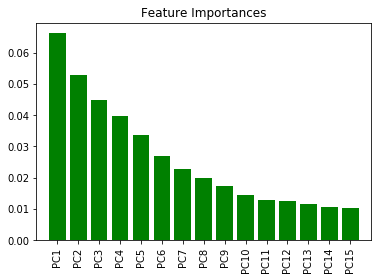

In [22]:
#plot
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]),importances[indices],color="g",align="center")
plt.xticks(range(X_train.shape[1]),X_train,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\DT\FLUXGENES\Correlation_FluxGenesDTPCA.pdf')
plt.show()

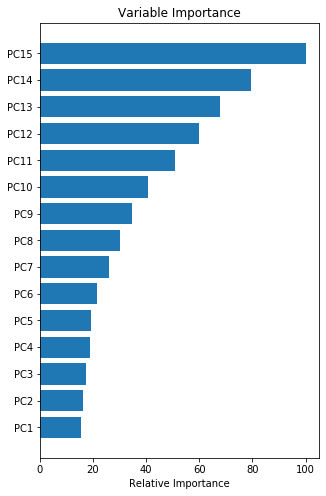

In [23]:
import matplotlib.pyplot as plt
# Plot feature importance
feature_importance = importances
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) 
plt.figure(figsize=(5, 8))
#plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\DT\FLUXGENES\Correlation_FluxGenesDTPCA1.pdf')
plt.show()

In [24]:
X_train = X_train.merge(z1_train,left_index=True,right_index=True)
X_val = X_val.merge(z1_val,left_index=True,right_index=True)
X_test = X_test.merge(z1_test,left_index=True,right_index=True)

In [25]:
# Fitting Random Forest Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [26]:
# KFOlD
estimator = regressor
kfold = KFold(n_splits=5, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results.mean(), results.std())

-1.3261566561172888 0.9908505634313513


In [27]:
#Predicting the Validation set results
y_predval = regressor.predict(X_val)
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

# Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
def rmse_metric(y_val, y_predval):
    sum_error = 0.0
    for i in range(len(y_val)):
        prediction_error = y_predval[i] - y_val[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(y_val))
    return sqrt(mean_error)

rmse = rmse_metric(y_val, y_predval)

def meanactual_metric(y_val):
    sum_error = 0.0
    for i in range(len(y_val)):
        prediction_error = y_val[i]
        sum_error += prediction_error
        mean_error = sum_error / float(len(y_val))
    return (mean_error)

mean = meanactual_metric(y_val)
rrmse = rmse/mean
print(rrmse)

23.81735959586377
1025.8483017304804
32.028866694444254
1.1161430094588791


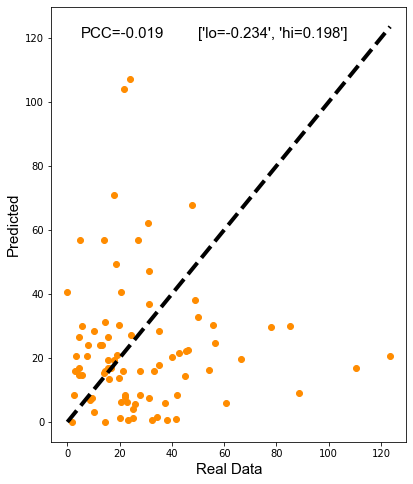

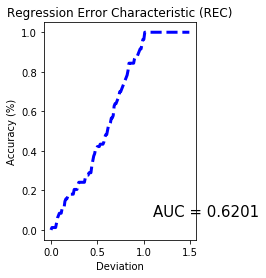

In [28]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
#RR = r2_score(y_val, y_predval)

def pearsonr_ci(y_val , y_predval, alpha=0.05):
    PCC, p = stats.pearsonr(y_val , y_predval)
    r_z = np.arctanh(PCC)
    se = 1/np.sqrt(len(y_val)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return ('PCC=%0.3f'%PCC, 'lo=%0.3f'%lo, 'hi=%0.3f'%hi,'p=%0.3f'%p)

PCC, lo, hi, pearson = pearsonr_ci(y_val , y_predval, alpha=0.05)
CI = [lo,hi]

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data", fontname="Arial", fontsize=15)
plt.ylabel("Predicted", fontname="Arial", fontsize=15)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.text(5, 120, PCC , fontname="Arial", fontsize=15)
plt.text(50, 120,CI, fontname="Arial", fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\DT\FLUXGENES\VALIDATION_PCC_FlUXGENESDTPCA.pdf')
plt.show()

#plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\DT\FLUXGENES\VALIDATION_AUC_FlUXGENESDTPCA.pdf')

plt.show()

In [29]:
y_val

array([  1.91,   4.96,  27.66,  10.09,  37.29,  25.  ,  24.97,  15.67,
        20.57,  47.77,  31.21,  25.99,  14.45,  13.44,  55.85,  35.18,
         9.36,  32.46,  18.63,  41.56,  77.79,  42.74,  27.14,  60.68,
        15.64,  21.45,  15.41,  23.78,  13.86,   4.37,  31.27,  49.8 ,
        33.28,  54.3 ,  45.3 ,   2.86,  88.57, 123.49,   2.43,  14.26,
        17.74,  35.22,  30.81,  19.74,  85.25,  24.21,   8.54,  20.57,
        27.76,  18.99,  22.01,  66.59,   3.19,  31.11,  38.01,   4.63,
        49.01,  19.58,  15.8 ,  22.14,  17.77,  12.32,   7.36,  41.79,
        14.29, 110.41,  13.99,   0.  ,  16.85,  44.91,   5.68,  20.27,
         5.72,  34.17,  10.18,  56.67,  45.99,  22.9 ,  39.91,   4.3 ,
        23.16,  21.81,   7.98])

In [30]:
y_predval

array([  0.        ,  56.77      ,  15.9       ,  28.38      ,
         5.98      ,   1.25      ,   3.98      ,  19.25      ,
        40.51      ,  67.84      ,  47.04      ,   5.62      ,
         0.        ,  23.98      ,  30.29      ,  28.35      ,
         7.56      ,   0.59      ,  49.31      ,   1.08      ,
        29.79915354,  21.42      ,  56.77      ,   5.88      ,
        16.92      ,  15.9       ,  26.45      , 107.13      ,
        56.77      ,  16.92      ,  36.99      ,  32.75      ,
        15.9       ,  16.16      ,  22.24      ,  15.9       ,
         9.        ,  20.66      ,   8.41      ,  15.9       ,
        70.99      ,  17.94      ,  62.19      ,  13.73      ,
        29.99      ,  27.23      ,   6.9       ,   6.11      ,
         8.44      ,  20.83      ,   8.54      ,  19.81      ,
        20.53      ,   7.56      ,   0.62      ,  26.54      ,
        38.07      ,  30.29      ,  13.44      ,   7.79      ,
        19.25      ,  24.01      ,  20.66      ,   8.41

In [ ]:
------------------------------------------------Testing Set---------------------------------------------------------------------

In [31]:
y_pred = regressor.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
def rmse_metric(y_test, y_pred):
    sum_error = 0.0
    for i in range(len(y_test)):
        prediction_error = y_pred[i] - y_test[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(y_test))
    return sqrt(mean_error)

rmse = rmse_metric(y_test, y_pred)

def meanactual_metric(y_test):
    sum_error = 0.0
    for i in range(len(y_test)):
        prediction_error = y_test[i]
        sum_error += prediction_error
        mean_error = sum_error / float(len(y_test))
    return (mean_error)

mean = meanactual_metric(y_test)
rrmse = rmse/mean
print(rrmse)

28.687099106602066
2308.8722966986647
48.050726286900854
1.4998238466553884


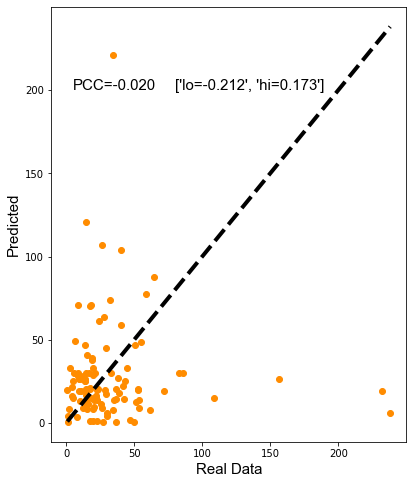

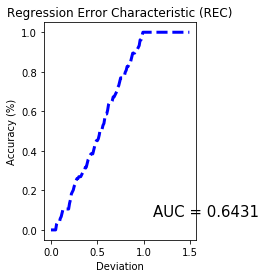

In [32]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_test , y_pred):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_test)):
            if np.linalg.norm(y_test[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_test[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_test))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_test, y_pred)

# Calculating R^2 of the true and predicted values
#RR = r2_score(y_val, y_predval)

def pearsonr_ci(y_test , y_pred, alpha=0.05):
    PCC, p = stats.pearsonr(y_test , y_pred)
    r_z = np.arctanh(PCC)
    se = 1/np.sqrt(len(y_test)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return ('PCC=%0.3f'%PCC, 'lo=%0.3f'%lo, 'hi=%0.3f'%hi,'p=%0.3f'%p)

PCC, lo, hi, pearson = pearsonr_ci(y_test , y_pred, alpha=0.05)
CI = [lo,hi]

# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred,color = "darkorange")
plt.xlabel("Real Data", fontname="Arial", fontsize=15)
plt.ylabel("Predicted", fontname="Arial", fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.text(5, 200, PCC , fontname="Arial", fontsize=15)
plt.text(80, 200,CI, fontname="Arial", fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\DT\FLUXGENES\TESTING_PCC_FLUXGENESDTPCA.pdf')
plt.show()
#plt.text(45, -5, r"$R^2 = %0.4f$" %RR , fontsize=15)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)
plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\DT\FLUXGENES\TESTING_AUC_FLUXGENESDTPCA.pdf')
plt.show()

In [33]:
y_test

array([  5.06      ,  27.27      ,  19.48      ,  17.71      ,
        15.24      ,   2.99      ,  38.7       ,  58.41      ,
         4.07      ,  28.55      ,  20.17      ,  51.22      ,
        35.45      ,  40.37      ,  34.36      ,  18.3       ,
        72.24      ,   5.49      ,  14.03      ,  14.29      ,
         8.67      ,  36.63      ,  12.22      ,  32.06      ,
        14.59      ,  23.06      ,  44.58      ,  24.34      ,
         9.23      ,  21.98      ,  14.72      ,  16.52      ,
        53.29      ,   5.29      ,   4.57      ,  17.61      ,
        14.26      ,  36.76      ,  13.67      ,  18.56      ,
        19.81      ,   8.8       ,  52.56      ,  55.29      ,
        26.28      ,  13.93      ,  17.44      , 156.54      ,
        34.26      ,   8.48      ,  32.69      ,  29.79915354,
         8.21      ,  29.79915354,  38.47      ,  50.03      ,
        16.43      ,  18.99      , 238.11      ,  29.17      ,
         9.43      ,  53.12      ,  29.43      ,  15.7 

In [34]:
y_pred

array([ 25.53      ,   0.59      ,  28.98      ,   1.08      ,
        40.57      ,  32.82      ,  17.9       ,  77.53      ,
        21.42      ,  20.04      ,  13.73      ,  12.39      ,
        13.73      ,  58.8       ,   8.02      ,  15.31      ,
        19.42      ,  30.29      ,  46.68      , 120.7       ,
        30.29      ,  14.59      ,   9.26      ,  73.85      ,
        29.79915354,  19.68      ,  32.75      ,  61.24      ,
        19.25      ,  16.39      ,  13.7       ,  30.29      ,
        13.99      ,  15.01      ,  16.16      ,  20.66      ,
        19.25      ,  20.5       ,  26.45      ,  70.99      ,
         8.44      ,  28.32      ,  20.17      ,  48.42      ,
       107.13      ,  25.39      ,  20.83      ,  26.48      ,
       221.16      ,  70.99      ,  29.79915354,   3.98      ,
         3.88      ,   5.78      ,  27.07      ,   0.59      ,
        11.17      ,  39.32      ,   6.11      ,  44.97      ,
        26.54      ,  19.94      ,  17.28      ,   8.41